# Downloading all packages

In [508]:
## All references to all previous studies used in this work are included in the master thesis: "100,000 years of global volcanism from ice cores". Felicia Carlborg 2023. University of Copenhagen, PICE. 

In [509]:
## Running methods that are needed for sulfate deposition. 
%matplotlib inline
import nbformat
with open("methods_sulfate_deposition.ipynb", "r") as file:
    nb = nbformat.reader.read(file)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scipy
import seaborn as sns
from tabulate import tabulate
from scipy.stats.stats import pearsonr
from matplotlib.widgets import Slider, RadioButtons
from sklearn.linear_model import LinearRegression
from scipy import interpolate
from matplotlib.offsetbox import AnchoredText
import matplotlib.ticker as ticker
from itertools import zip_longest
from itertools import chain
from tqdm.notebook import tqdm
from time import sleep
import math
from scipy.interpolate import interp1d
np.set_printoptions(threshold=np.inf)
sns.set_theme(context='paper', style='white', palette='colorblind',font='Helvetica')
from scipy.signal import savgol_filter
%run methods_sulfate_deposition.ipynb

/Users/feliciacarlborg/opt/anaconda3/lib/python3.8/site-packages/nbformat/__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


# Downloading data with Bipolar matchpoints

In [510]:
## Downloading file with bipolar match points ##
exc_sheet_bp_mp = pd.ExcelFile('Bipolar match points ver 2022-12-23.xls')
bp_mp = pd.read_excel(exc_sheet_bp_mp, 'Sheet1')
bp_mp = np.array(bp_mp)

## Empty arrays ## 
depth_bp_NGRIP = []
depth_bp_NEEM = []
depth_bp_GISP2 = []
depth_bp_EDML = []
depth_bp_EDC = []

## Loop to sort out eruption that are not bipolar ##
for i in range(len(bp_mp[:,1])):
    if (np.isfinite(bp_mp[i,0]) or np.isfinite(bp_mp[i,4]) or np.isfinite(bp_mp[i,6]) or np.isfinite(bp_mp[i,5])) and (np.isfinite(bp_mp[i,1]) or np.isfinite(bp_mp[i,2]) or np.isfinite(bp_mp[i,3])):
        depth_bp_NGRIP.append(bp_mp[i,0])
        depth_bp_NEEM.append(bp_mp[i,4])
        depth_bp_GISP2.append(bp_mp[i,6])
        depth_bp_EDML.append(bp_mp[i,1])
        depth_bp_EDC.append(bp_mp[i,2])
    else:
        continue
    
## arrays with the depths of the bibpolar eruptions ##
depth_bp_NGRIP = np.array(depth_bp_NGRIP)
depth_bp_NEEM = np.array(depth_bp_NEEM)
depth_bp_GISP2 = np.array(depth_bp_GISP2)
depth_bp_EDML = np.array(depth_bp_EDML)
depth_bp_EDC = np.array(depth_bp_EDC)

## Correcting depths that are a few centimeter off (peaks found in conductivity/ECM/DEP can differ from sulfate peak)

depth_bp_NGRIP[depth_bp_NGRIP == 2696.92] = 2696.926 #+0.6cm
depth_bp_NGRIP[depth_bp_NGRIP == 2018.5] = 2018.45 #-5cm
depth_bp_NGRIP[depth_bp_NGRIP == 1751] = 1751.02 #+2cm
depth_bp_NGRIP[depth_bp_NGRIP == 2495.082] = 2495.09 #+0.8 cm
depth_bp_NGRIP[depth_bp_NGRIP == 2775.074] = 2775.08 #+0.6cm-2.
depth_bp_NGRIP[depth_bp_NGRIP == 2540.98] = 2540.953 #-2.7cm
depth_bp_NGRIP[depth_bp_NGRIP == 1677.68] = 1677.721 #+4.1cm
depth_bp_NGRIP[depth_bp_NGRIP == 1788.75] = 1788.791#+4.1cm
depth_bp_NGRIP[depth_bp_NGRIP == 2579] = 2578.975 # -3.5 cm
depth_bp_NGRIP[depth_bp_NGRIP == 1675.23] = 1675.25 # +2cm

depth_bp_EDML[depth_bp_NGRIP==2493.957] = 1785.770 #-2cm
depth_bp_EDML[depth_bp_EDML == 1716.18] = 1716.16 #-2cm
depth_bp_EDML[depth_bp_EDML == 1897.6] = 1897.64 #+4cm
depth_bp_EDML[depth_bp_EDML == 2199.96] = 2199.98 #+2cm
depth_bp_EDML[depth_bp_EDML == 2215.23] = 2215.24 #+1cm
depth_bp_EDML[depth_bp_EDML == 1233.75] = 1233.78 #+3cm

depth_bp_EDC[depth_bp_EDC == ' '] = np.nan 
depth_bp_EDC[depth_bp_NGRIP == 1628.21] = 440.15 #-5cm
depth_bp_EDC[depth_bp_NGRIP == 1855] = 578.96 #3+cm
depth_bp_EDC[depth_bp_NGRIP == 2142.358] = 754.39 #+3.2cm
depth_bp_EDC[depth_bp_NGRIP == 2177.7]= 777.5 #+2cm
depth_bp_EDC[depth_bp_NGRIP == 2861.48] = 1368.02 #+2cm
depth_bp_EDC[depth_bp_NGRIP == 2863.2] = 1369.72 #+2cm
depth_bp_EDC[depth_bp_NGRIP ==1679.65] = 478.94 #-4cm
depth_bp_EDC[depth_bp_NGRIP == 2564.7] = 1092.33 #+3cm
depth_bp_EDC[35] = 526.5 #+5cm

depth_bp_NEEM[depth_bp_NEEM == 1969.] = 1968.95 #-5cm
depth_bp_NEEM[depth_bp_NEEM == 2015.44] = 2015.43 #-1cm
depth_bp_NEEM[depth_bp_NEEM == 2026.18] = 2026.14 #-4cm
depth_bp_NEEM[depth_bp_NEEM == 2037.43] = 2037.42 #-1cm

depth_bp_NEEM[depth_bp_NGRIP == 1902.84] = 1661.20 ##new match point that I have found 

#depth_bp_GISP2[depth_bp_NGRIP == 1827.205] = 2018.60 ## Taupo GISP2


depth_bp_EDC= np.array(depth_bp_EDC, dtype='float64') #was dtype object because of a string in array before

if len(depth_bp_EDC) == len(depth_bp_EDML) == len(depth_bp_GISP2) == len(depth_bp_NEEM) == len(depth_bp_NGRIP):
    print('Number of bipolar eruptions =', len(depth_bp_EDC)) #checking that arrays are same length

#storing arrays
%store depth_bp_NGRIP
%store depth_bp_NEEM    
%store depth_bp_GISP2
%store depth_bp_EDML
%store depth_bp_EDC

Number of bipolar eruptions = 253
Stored 'depth_bp_NGRIP' (ndarray)
Stored 'depth_bp_NEEM' (ndarray)
Stored 'depth_bp_GISP2' (ndarray)
Stored 'depth_bp_EDML' (ndarray)
Stored 'depth_bp_EDC' (ndarray)


## Downloading data with d18O arrays 

In [511]:
%store -r GISP2_d18O 
%store -r GISP2_d18O_age 
%store -r NEEM_d18O_depth
%store -r NEEM_d18O 
%store -r NEEM_d18O_age 
%store -r NGRIP_dO18_age
%store -r NGRIP_dO18_depth
%store -r NGRIP_dO18


## Excel file with Bipolar Match Points

In [512]:
data = {
    'depth NGRIP': depth_bp_NGRIP,
    'depth NEEM': depth_bp_NEEM,
    'depth GISP2': depth_bp_GISP2,
    'depth EDC': depth_bp_EDC,
    'depth EDML': depth_bp_EDML,
}

data = dict([ (k,pd.Series(v)) for k,v in data.items() ])

df = pd.DataFrame(data)

# Save the DataFrame as an Excel file
df.to_excel('bipolar_eruptions_list.xlsx', index=False)

## Downloading data with Glacials and Interstadials 

In [513]:
sheet = pd.ExcelFile('Glacial_periods.xlsx') ## From Rasmussen et al. 2014
GL = pd.read_excel(sheet, 'Sheet1')
GL = np.array(GL)
GL_periods = GL[:,0]
GL_onset = GL[:,1]
GL_end = GL[:,2]
GL_duration = GL[:,3]

In [514]:
## Do events from student thesis at PICE by Anna Klüssendorf

anna_DO= np.array([11702,14688, 23349, 27778, 28890, 30783, 32501, 33734, 35483, 38214, 40164, 41460, 43339, 46842, 49263, 54210, 54990, 55785, 58035, 58255, 59067, 59434, 64094, 69614, 72337, 76436, 84762, 85049, 90044, 104035, 104499, 106758, 108289, 115391])

## DO events from Carpron et al. (2021)

In [515]:
sheet = pd.ExcelFile('Capron_etal_NatCom2021 SupDat4 Tables of transition data.xls')
capron = pd.read_excel(sheet, 'd18O')

In [516]:
capron = np.array(capron)

capron_periods = capron[:24,0]
capron_DO = capron[:24,6]

# Downloading results from Steffen Kristiansen & Lin et al (2022)

In [517]:
## Results from Jiamei and Steffen. Jiamei wrote a paper which I cite below (Jiamei et al. (2022)), and Steffen Kristiansen wrote a thesis on similar supbject as me for PICE. This thesis
# can be found at: https://nbi.ku.dk/english/theses/masters-theses/steffen-kristiansen/. These results has been retrieved internally from my supervisor Anders Svensson (PICE). ## 
sheet = pd.ExcelFile('Bipolar_sulfate_20200516_AS.xlsx')
JL = pd.read_excel(sheet, 'JL' )
SK = pd.read_excel(sheet, 'SK')
JL_SK = pd.read_excel(sheet, 'All bipolar')
JL_SK = np.array(JL_SK)

## Picking out the correct arrays ## 
JL_SK_bp_depth_NGRIP = JL_SK[1:,1]
JL_SK_bp_age_NGRIP = JL_SK[1:,2]
SK_bp_s_NGRIP = JL_SK[1:,3] #s for sulfate
JL_bp_s_NGRIP = JL_SK[1:,4]
SK_bp_s_GISP2 = JL_SK[1:,7]
JL_bp_s_GISP2 = JL_SK[1:,8]
SK_bp_s_EDML = JL_SK[1:,9]
JL_bp_s_EDML = JL_SK[1:,10]
SK_bp_s_EDC = JL_SK[1:,11]
JL_bp_s_EDC = JL_SK[1:,12]
SK_bp_s_NEEM = JL_SK[1:,5]
JL_bp_s_NEEM = JL_SK[1:,6]

# Downloading Conductivity data NEEM 

In [518]:
## Downloading the Excel files 
excl_1 = pd.ExcelFile('NEEM_CFA_on_GICC05_A.xls')
NEEM_CFA_A = pd.read_excel(excl_1, 'Sheet1' )
excl_2 = pd.ExcelFile('NEEM_CFA_on_GICC05_B.xls')
NEEM_CFA_B = pd.read_excel(excl_2, 'Sheet1' )
excl_3 = pd.ExcelFile('NEEM_CFA_on_GICC05_C.xls')
NEEM_CFA_C = pd.read_excel(excl_3, 'Sheet1' )
excl_4 = pd.ExcelFile('NEEM_CFA_on_GICC05_D.xls')
NEEM_CFA_D = pd.read_excel(excl_4, 'Sheet1' )
excl_5 = pd.ExcelFile('NEEM_CFA_on_GICC05_E.xls')
NEEM_CFA_E = pd.read_excel(excl_5, 'Sheet1' )

## panda to arrays 
NEEM_CFA_A = np.array(NEEM_CFA_A)
NEEM_CFA_B = np.array(NEEM_CFA_B)
NEEM_CFA_C = np.array(NEEM_CFA_C)
NEEM_CFA_D = np.array(NEEM_CFA_D)
NEEM_CFA_E = np.array(NEEM_CFA_E)

## concentate the arrays to full array
NEEM_CFA_depth = np.concatenate( (NEEM_CFA_A[:,0],NEEM_CFA_B[:,0],NEEM_CFA_C[:,0],NEEM_CFA_D[:,0],NEEM_CFA_E[:,0]), axis=None ) 
NEEM_CFA_cond = np.concatenate( (NEEM_CFA_A[:,1],NEEM_CFA_B[:,1],NEEM_CFA_C[:,1],NEEM_CFA_D[:,1],NEEM_CFA_E[:,1]), axis=None )
NEEM_CFA_age = np.concatenate( (NEEM_CFA_A[:,9],NEEM_CFA_B[:,9],NEEM_CFA_C[:,9],NEEM_CFA_D[:,9],NEEM_CFA_E[:,9]), axis=None )

## Downloading DEP data EDC

In [519]:
## Downloading Excel file
excel = pd.ExcelFile('EDC_DEP_on_GICC05.xls')
EDC_DEP_arr = pd.read_excel(excel, 'Sheet1')
EDC_DEP_arr = np.array(EDC_DEP_arr)

## Picking out correct arrays
EDC_DEP_depth = EDC_DEP_arr[:,0]
EDC_DEP = EDC_DEP_arr[:,1]

# Downloading ECM records for GISP2 & NEEM

In [520]:
## Downloading Excel files 
excl_1 = pd.ExcelFile('GISP2_ECM_on_GICC05_C.xls')
GISP2_ECM_C = pd.read_excel(excl_1, 'Sheet1' )
excl_2 = pd.ExcelFile('GISP2_ECM_on_GICC05_D.xls')
GISP2_ECM_D = pd.read_excel(excl_2, 'Sheet1' )
excl_3 = pd.ExcelFile('GISP2_ECM_on_GICC05_E.xls')
GISP2_ECM_E = pd.read_excel(excl_3, 'Sheet1' )
excl_4 = pd.ExcelFile('NEEM_ECM_on_GICC05_C.xls')
NEEM_ECM_C = pd.read_excel(excl_4, 'Sheet1' )
excl_5 = pd.ExcelFile('NEEM_ECM_on_GICC05_D.xls')
NEEM_ECM_D = pd.read_excel(excl_5, 'Sheet1')

## pandas to array
GISP2_ECM_C = np.array(GISP2_ECM_C)
GISP2_ECM_D = np.array(GISP2_ECM_D)
GISP2_ECM_E = np.array(GISP2_ECM_E)
NEEM_ECM_C = np.array(NEEM_ECM_C)
NEEM_ECM_D = np.array(NEEM_ECM_D)

## Depth GISP2
GISP2_ECM_C_depth = GISP2_ECM_C[:,0]
GISP2_ECM_D_depth = GISP2_ECM_D[:,0]
GISP2_ECM_E_depth = GISP2_ECM_E[:,0]
GISP2_ECM_depth = np.concatenate((GISP2_ECM_C_depth,GISP2_ECM_D_depth,GISP2_ECM_E_depth), axis=None)

## Age GISP2
GISP2_ECM_age = np.concatenate( (GISP2_ECM_C[:,3], GISP2_ECM_D[:,3], GISP2_ECM_E[:,3]), axis=None ) 

## ECM GISP2
GISP2_ECM_C_ECM = GISP2_ECM_C[:,1]
GISP2_ECM_D_ECM = GISP2_ECM_D[:,1]
GISP2_ECM_E_ECM = GISP2_ECM_E[:,1]
GISP2_ECM = np.concatenate((GISP2_ECM_C_ECM,GISP2_ECM_D_ECM,GISP2_ECM_E_ECM), axis=None)

## Depth NEEM
NEEM_ECM_C_depth = NEEM_ECM_C[:,0]
NEEM_ECM_D_depth = NEEM_ECM_D[:,0]
NEEM_ECM_depth = np.concatenate((NEEM_ECM_C_depth,NEEM_ECM_D_depth), axis=None)

## ECM NEEM
NEEM_ECM_C_ECM = NEEM_ECM_C[:,1]
NEEM_ECM_D_ECM = NEEM_ECM_D[:,1]
NEEM_ECM = np.concatenate((NEEM_ECM_C_ECM,NEEM_ECM_D_ECM), axis=None)

## Storing arrays
%store NEEM_ECM_depth
%store NEEM_ECM

Stored 'NEEM_ECM_depth' (ndarray)
Stored 'NEEM_ECM' (ndarray)


# Downloading conductivity data for EDML

In [521]:
## Downloading Excel files with conductivity data for EDML ##
excl_1 = pd.ExcelFile('EDML_CFA_on_GICC05_A.xls')
EDML_A = pd.read_excel(excl_1, 'Sheet1')
EDML_A = np.array(EDML_A)
EDML_A_age = EDML_A[:,6]
EDML_A_depth = EDML_A[:,0]
EDML_A_cond = EDML_A[:,5]
excl_2 = pd.ExcelFile('EDML_CFA_on_GICC05_B.xls')
EDML_B = pd.read_excel(excl_2, 'Sheet1')
EDML_B = np.array(EDML_B)
EDML_B_age = EDML_B[:,6]
EDML_B_depth = EDML_B[:,0]
EDML_B_cond = EDML_B[:,5]
excl_3 = pd.ExcelFile('EDML_CFA_on_GICC05_C.xls')
EDML_C = pd.read_excel(excl_3, 'Sheet1')
EDML_C = np.array(EDML_C)
EDML_C_age = EDML_C[:,6]
EDML_C_depth = EDML_C[:,0]
EDML_C_cond = EDML_C[:,5]
## Final arrays 
EDML_cond_age = np.concatenate((EDML_A_age, EDML_B_age, EDML_C_age), axis=0)
EDML_cond_depth = np.concatenate((EDML_A_depth, EDML_B_depth, EDML_C_depth), axis=0)
EDML_cond = np.concatenate((EDML_A_cond, EDML_B_cond, EDML_C_cond), axis=0)

# Downloading data with convolved time and sample resolutions for EDC, EDML, GISP2 & NEEM (NGRIP has high enough resolution)

In [522]:
## These arrays are stored in Data_resolution(1).ipynb
%store -r EDC_convolved_t
%store -r EDC_convolved_a

%store -r EDML_convolved_t
%store -r EDML_convolved_a

%store -r GISP2_convolved_t
%store -r GISP2_convolved_a

%store -r NEEM_convolved_t
%store -r NEEM_convolved_a

## Method for changing dtype to 'float64' in an array

In [523]:
def dtype_float64(arr):
    return np.array(arr, dtype='float64')

## First Thinning function for NGRIP

In [524]:
sheet6 = pd.ExcelFile('AICC2012_official.xls')
thinning = pd.read_excel(sheet6, 'NGRIP')
thinning = np.array(thinning)
NGRIP_th_depth = thinning[1:,0]
NGRIP_th = thinning[1:,6]

## Second thinning function for NGRIP 

In [525]:
excl= pd.ExcelFile('jafna-ngrip-ss09sea06bm1.xls')
NGRIP_thinning = pd.read_excel(excl, 'jafna-ngrip-ss09sea06bm1')
NGRIP_thinning = dtype_float64(NGRIP_thinning)
NGRIP_th2_depth = NGRIP_thinning[:,0]
NGRIP_th2 = NGRIP_thinning[:,3]

# Downloading sulfate and thinning data

In [526]:

## All these arrays comes from various notebooks
%run methods_sulfate_deposition.ipynb

## Downloading NGRIP data ## filter = 51 years ##
%store -r NGRIP_RRM
%store -r NGRIP_RMAD
%store -r NGRIP_sulfate_annual
%store -r NGRIP_annual
%store -r NGRIP_annual_thickness
%store -r NGRIP_annual_thinning
%store -r NGRIP_depth_annual
%store -r NGRIP_depth_annual_top
%store -r NGRIP_depth_annual_bottom
%store -r NGRIP_age
%store -r NGRIP_depth
%store -r NGRIP_sulfate
%store -r NGRIP_cond
%store -r NGRIP_dO18_age
%store -r NGRIP_dO18_depth
%store -r NGRIP_dO18
%store -r NGRIP_thinning_depth
%store -r NGRIP_thinning

# Downloading the RMAD and RRM for different volcanic thresholds for all ice cores
%store -r all_RMAD_NGRIP
%store -r all_RRM_NGRIP
%store -r all_RMAD_NEEM
%store -r all_RRM_NEEM
%store -r all_RMAD_GISP2
%store -r all_RRM_GISP2
%store -r all_RMAD_EDML
%store -r all_RRM_EDML
%store -r all_RMAD_EDC
%store -r all_RRM_EDC

# Makings sure all NGRIP data are arrays and the correct length
NGRIP_depth_original = np.copy(NGRIP_depth_annual)[~np.isnan(NGRIP_sulfate_annual)]
lim_NGRIP = np.where( (NGRIP_depth_annual > 1500) & (NGRIP_depth_annual < 2930) )
NGRIP_RMAD = np.array(NGRIP_RMAD)[lim_NGRIP]
copy_NGRIP_sulfate_annual = np.copy(NGRIP_sulfate_annual)
NGRIP_sulfate_annual = NGRIP_sulfate_annual[lim_NGRIP] ##skipping first variable 

NGRIP_depth_annual_th = ((NGRIP_depth_annual[1:] + NGRIP_depth_annual[:-1])/2)[lim_NGRIP][~np.isnan(NGRIP_sulfate_annual)]
NGRIP_depth_annual_top = NGRIP_depth_annual[:-1][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual)]
NGRIP_depth_annual_bottom = NGRIP_depth_annual[1:][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual)]
NGRIP_depth_annual = np.copy(NGRIP_depth_annual_th)
NGRIP_annual_thickness = NGRIP_depth_annual_bottom - NGRIP_depth_annual_top
NGRIP_RRM = NGRIP_RRM[lim_NGRIP][~np.isnan(NGRIP_sulfate_annual)]
NGRIP_annual = NGRIP_annual[lim_NGRIP][~np.isnan(NGRIP_sulfate_annual)]
NGRIP_RMAD = NGRIP_RMAD[~np.isnan(NGRIP_sulfate_annual)]
NGRIP_annual_thinning = NGRIP_annual_thinning[lim_NGRIP][~np.isnan(NGRIP_sulfate_annual)]
NGRIP_sulfate_annual_long = np.copy(NGRIP_sulfate_annual)
NGRIP_sulfate_annual = NGRIP_sulfate_annual[~np.isnan(NGRIP_sulfate_annual)]
NGRIP_sulfate_annual = interp(NGRIP_sulfate_annual)


/Users/feliciacarlborg/opt/anaconda3/lib/python3.8/site-packages/nbformat/__init__.py:92: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


## Plotting difference between two thinning functions NGRIP

In [527]:
NGRIP_thinning_depth = dtype_float64(NGRIP_thinning_depth)
NGRIP_th_depth = dtype_float64(NGRIP_th_depth)
NGRIP_th = dtype_float64(NGRIP_th)
NGRIP_th2_interp = np.interp(NGRIP_thinning_depth, NGRIP_th2_depth, NGRIP_th2)
NGRIP_th_interp  = np.interp(NGRIP_thinning_depth, NGRIP_th_depth, NGRIP_th)

diff_thinning = NGRIP_th_interp - NGRIP_th2_interp
percent_thinning = (diff_thinning / NGRIP_th2_interp)*1e2

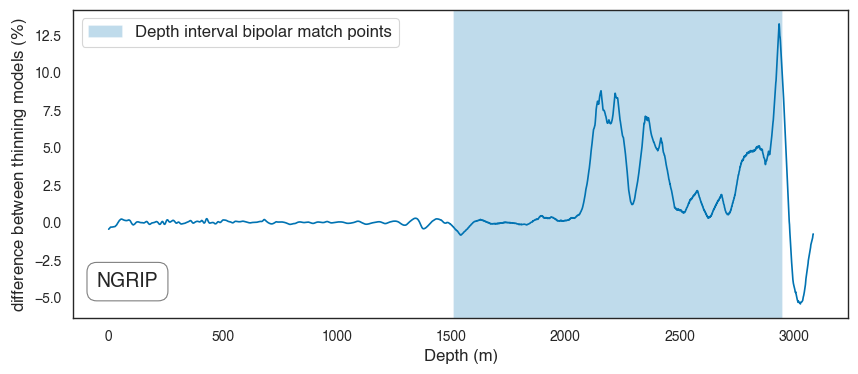

In [528]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
ax.plot(NGRIP_thinning_depth, percent_thinning)
ax.set_xlabel('Depth (m)', fontsize=12)
ax.set_ylabel(r'difference between thinning models ($\%$) ', fontsize=12)
ax.axvspan( depth_bp_NGRIP[0], depth_bp_NGRIP[-1], alpha=.25, label='Depth interval bipolar match points')
plt.text(0.03, 0.1, 'NGRIP',  transform=ax.transAxes, fontsize=14, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', pad=.5, alpha=1))
ax.legend(fontsize=12)
ax.tick_params(labelsize=10)

## Downloading more sulfate and thinning data

In [529]:
## Downloading NEEM data ## filter = 181 years ##
%store -r NEEM_RRM
%store -r NEEM_RMAD
%store -r NEEM_sulfate
%store -r NEEM_age
%store -r NEEM_thickness
%store -r NEEM_thinning
%store -r NEEM_thinning_depth
%store -r NEEM_depth
%store -r NEEM_RMAD
%store -r NEEM_depth_top
%store -r NEEM_depth_bottom
%store -r NEEM_age_new

# Makings sure all NEEM data are arrays and the correct length
NEEM_thinning = dtype_float64(NEEM_thinning)
NEEM_thinning_depth = dtype_float64(NEEM_thinning_depth)
# limit because the bipolar match points are within this interval
lim_NEEM = (NEEM_depth > 1428.2) & (NEEM_depth < 2206)
NEEM_depth_original = np.copy(NEEM_depth)
# correcting for suspected wrong shift in the data
NEEM_depth = np.copy(NEEM_depth[lim_NEEM])
NEEM_depth_top = NEEM_depth_top[lim_NEEM] - 0.1
NEEM_depth_bottom = NEEM_depth_bottom[lim_NEEM] - 0.1
NEEM_age = np.copy(NEEM_age_new)
NEEM_sulfate = np.copy(NEEM_sulfate[lim_NEEM])
NEEM_thinning_corr = np.interp(NEEM_depth, NEEM_thinning_depth, NEEM_thinning) # left=np.nan, right=np.nan
NEEM_sulfate = interp(NEEM_sulfate)

## Downloading EDC data ##
%store -r EDC_RRM
%store -r EDC_RMAD
%store -r EDC_depth
%store -r EDC_sulfate
%store -r EDC_age
%store -r EDC_thickness
%store -r EDC_depth_interp_th
%store -r EDC_age_new
%store -r EDC_thinning
%store -r EDC_thinning_depth

# Makings sure all EDC data are arrays and the correct length
EDC_thinning = dtype_float64(EDC_thinning)
EDC_thinning_depth = dtype_float64(EDC_thinning_depth)
# limit because the bipolar match points are within this interval
lim_EDC = np.where((EDC_depth > 369) & (EDC_depth < 1470)) #1456, 
EDC_sulfate = EDC_sulfate[lim_EDC]
EDC_age = np.copy(EDC_age_new)
EDC_depth_middle = (EDC_depth[:-1] + EDC_depth[1:])/2
EDC_depth_top = EDC_depth[:-1][lim_EDC]
EDC_depth_bottom = EDC_depth[1:][lim_EDC]
EDC_depth = np.copy(EDC_depth_middle)[lim_EDC]
EDC_thinning_corr = np.interp(EDC_depth, EDC_thinning_depth, EDC_thinning)
EDC_sulfate = interp(EDC_sulfate)

## Downloading GISP2 data ## filter = 181 years ##
%store -r GISP2_RRM
%store -r GISP2_RMAD
%store -r GISP2_sulfate
%store -r GISP2_age
%store -r GISP2_depth_bottom
%store -r GISP2_depth_top
%store -r GISP2_thickness
%store -r GISP2_depth
%store -r GISP2_thinning
%store -r GISP2_depth_thinning
%store -r GISP2_age_new

# Makings sure all GISP2 data are arrays and the correct length
GISP2_thinning = dtype_float64(GISP2_thinning)
GISP2_depth_thinning = dtype_float64(GISP2_depth_thinning)
# limit because the bipolar match points are within this interval
lim_GISP2 = np.where((GISP2_depth > 1691) & (GISP2_depth < 2758))
GISP2_age = np.copy(GISP2_age_new)
GISP2_sulfate = GISP2_sulfate[lim_GISP2]
GISP2_depth = GISP2_depth[lim_GISP2]
GISP2_depth_top = GISP2_depth_top[lim_GISP2]
GISP2_depth_bottom = GISP2_depth_bottom[lim_GISP2]
GISP2_thinning_corr = np.interp(
    GISP2_depth, GISP2_depth_thinning, GISP2_thinning)
GISP2_sulfate = interp(GISP2_sulfate)

## Downloading EDML data ##
%store -r EDML_RRM
%store -r EDML_RRMAD
%store -r EDML_sulfate_all
%store -r EDML_age_all
%store -r EDML_depth_all
%store -r EDML_thickness
%store -r EDML_thinning
%store -r EDML_thinning_depth
%store -r EDML_depth_th
%store -r EDML_age_new

# Makings sure all EDML data are arrays and the correct length
EDML_thinning = np.array(EDML_thinning, dtype='float64')
EDML_thinning_depth = np.array(EDML_thinning_depth, dtype='float64')
# limit because the bipolar match points are within this interval
lim_EDML = np.where((EDML_depth_all > 700) & (EDML_depth_all < 2232))
EDML_age = EDML_age_new[np.isfinite(EDML_age_new)]
EDML_depth = EDML_depth_all[lim_EDML]
EDML_sulfate = EDML_sulfate_all[lim_EDML]
EDML_depth_middle = (EDML_depth_all[1:] + EDML_depth_all[:-1])/2
EDML_depth_top = EDML_depth_all[:-1][lim_EDML]
EDML_depth_bottom = EDML_depth_all[1:][lim_EDML]
EDML_depth = np.copy(EDML_depth_middle)[lim_EDML]
EDML_RRM = np.array(EDML_RRM)
EDML_thinning_corr = np.interp(EDML_depth, EDML_thinning_depth, EDML_thinning)
EDML_sulfate = interp(EDML_sulfate)


# Downloading data from:

Lin, J. et al. (2022). “Magnitude, frequency and climate forcing of global volcanism during the
last glacial period as seen in Greenland and Antarctic ice cores (60–9 ka)”. In: Climate of the
Past 18.3, pp. 485–506. doi: 10.5194/cp-18-485-2022. url: https://cp.copernicus.org/
articles/18/485/2022/

In [530]:
## Results from Jiamei's paper 
JL_excel =  pd.ExcelFile('Supplementary tables.xls')
JL_excel_bipolar = pd.read_excel(JL_excel, 'Table S5')
JL_excel_bipolar = np.array(JL_excel_bipolar)
JL_excel_G = pd.read_excel(JL_excel, 'Table S3')
JL_excel_A = pd.read_excel(JL_excel, 'Table S4')
JL_excel_G = np.array(JL_excel_G)
JL_excel_A = np.array(JL_excel_A)
JL_excel_historical = pd.read_excel(JL_excel, 'Table S6')
JL_excel_historical = np.array(JL_excel_historical)

#sulfate deposition 
JL_paper_s_NGRIP = JL_excel_G[1:,0] #s for sulfate
JL_paper_s_NEEM = JL_excel_G[1:,8]
JL_paper_s_GISP2 = JL_excel_G[1:,4]
JL_paper_s_EDC = JL_excel_A[1:,4]
JL_paper_s_EDML = JL_excel_A[1:,8]

#depth for sulfate deposition
JL_paper_d_NGRIP = JL_excel_G[1:,2] #d for depth 
JL_paper_d_NEEM = JL_excel_G[1:,10]
JL_paper_d_GISP2 = JL_excel_G[1:,6]
JL_paper_d_EDC = JL_excel_A[1:,6]
JL_paper_d_EDML = JL_excel_A[1:,10]

#Data with historical eruptions from known sources. Sources are included in the supplementary tables of the article written by Lin et al. (2022).
JL_G_dep_glacial = np.array(JL_excel_historical[3:7,10], dtype='float64')
JL_A_dep_glacial = np.array(JL_excel_historical[3:7,11], dtype='float64')
JL_G_dep_hist = np.array(JL_excel_historical[17:34,10], dtype='float64')
JL_A_dep_hist = np.array(JL_excel_historical[17:34,11], dtype='float64')

JL_lat_glacial = np.array(JL_excel_historical[3:7,5])
JL_lat_glacial[2] = "38°48'S"
JL_lat_hist = np.array(JL_excel_historical[17:34,5])

# corrections made for the NEEM and GISP2 ice core
JL_NEEM_corr = JL_excel_G[1:,16]
JL_GISP2_corr = JL_excel_G[1:,17]

JL_NEEM_corr[JL_NEEM_corr == '-'] = np.nan
JL_GISP2_corr[JL_GISP2_corr == '-'] = np.nan

JL_NEEM_corr = np.array(JL_NEEM_corr, dtype='float64')
JL_GISP2_corr = np.array(JL_GISP2_corr, dtype='float64')

JL_paper_s_age = np.array(JL_excel_bipolar[1:,1], dtype='float64')

JL_age_bipolar =  np.array(JL_excel_bipolar[1:,1], dtype='float64')
JL_aer_bipolar = np.array(JL_excel_bipolar[1:, 26], dtype='float64')
JL_orig_bipolar = np.array(JL_excel_bipolar[1:, 31])
JL_std_NGRIP = np.array(JL_excel_bipolar[1:,5], dtype='float64')
JL_std_NEEM = np.array(JL_excel_bipolar[1:,9], dtype='float64')
JL_std_GISP2 = np.array(JL_excel_bipolar[1:,12], dtype='float64')
JL_std_EDC = np.array(JL_excel_bipolar[1:,15], dtype='float64')
JL_std_EDML = np.array(JL_excel_bipolar[1:,18], dtype='float64')
JL_std_WDC = np.array(JL_excel_bipolar[1:,21], dtype='float64')


# Creating age arrays for the bipolar eruptions

In [531]:
## ages that the depths corresponds to ## 
depth_bp_NGRIP = np.array(depth_bp_NGRIP, dtype='float64')
interp = interpolate.Akima1DInterpolator(NGRIP_depth[np.isfinite(NGRIP_depth) & np.isfinite(NGRIP_age)], NGRIP_age[np.isfinite(NGRIP_depth) & np.isfinite(NGRIP_age)])
age_bp_NGRIP = interp(depth_bp_NGRIP)

depth_bp_NEEM = np.array(depth_bp_NEEM, dtype='float64')
interp = interpolate.Akima1DInterpolator(NEEM_depth[np.isfinite(NEEM_depth) & np.isfinite(NEEM_age)], NEEM_age[np.isfinite(NEEM_depth) & np.isfinite(NEEM_age)])
age_bp_NEEM =  interp(depth_bp_NEEM)

depth_bp_GISP2 = np.array(depth_bp_GISP2, dtype='float64')
interp = interpolate.Akima1DInterpolator(GISP2_depth[np.isfinite(GISP2_depth) & np.isfinite(GISP2_age)], GISP2_age[np.isfinite(GISP2_depth) & np.isfinite(GISP2_age)])
age_bp_GISP2=  interp(depth_bp_GISP2)

depth_bp_EDC = np.array(depth_bp_EDC, dtype='float64')
interp = interpolate.Akima1DInterpolator(EDC_depth[np.isfinite(EDC_depth) & np.isfinite(EDC_age)], EDC_age[np.isfinite(EDC_depth) & np.isfinite(EDC_age)])
age_bp_EDC =  interp(depth_bp_EDC)

depth_bp_EDML = np.array(depth_bp_EDML, dtype='float64')
interp = interpolate.Akima1DInterpolator(EDML_depth[np.isfinite(EDML_depth) & np.isfinite(EDML_age)], EDML_age[np.isfinite(EDML_depth) & np.isfinite(EDML_age)])
age_bp_EDML =  interp(depth_bp_EDML)

## List of depths with the largest eruptions found further down in the script

In [532]:
## creating array with the largest eruptions (the depth for NGRIP) which we calculate further down 

%store -r largest_age
largest_depth = []

for i in range(len(largest_age)):
    idx_largest = np.where(age_bp_NGRIP == largest_age[i])
    largest_depth.append( depth_bp_NGRIP[idx_largest] )

largest_depth = np.array(largest_depth)


# Mean year and sample resolution for all cores

In [533]:
## visualizing how many years the thickness of a sample represents ## 
mean_thickness_NEEM = np.nanmean(NEEM_thickness)
mean_year_NEEM = np.nanmean(NEEM_age[1:] - NEEM_age[:-1])
mean_thickness_GISP2 = np.nanmean(GISP2_thickness)
mean_year_GISP2 = np.nanmean(GISP2_age[1:] - GISP2_age[:-1])
mean_thickness_EDC = np.nanmean(EDC_thickness)
mean_year_EDC = np.nanmean(EDC_age[1:] - EDC_age[:-1])
mean_thickness_EDML = np.nanmean(EDML_thickness)
mean_year_EDML = np.nanmean(EDML_age[1:] - EDML_age[:-1])
mean_thickness_NGRIP = np.nanmean(NGRIP_annual_thickness)
mean_year_NGRIP = np.nanmean(NGRIP_annual[1:] - NGRIP_annual[:-1])

## th = thickness resolution, y = year resolution
header = ['th NEEM', 'y NEEM', 'th GISP2', 'y GISP2', 'th NGRIP', 'y NGRIP', 'th EDC', 'y EDC', 'th EDML',' y EDML']
table = [mean_thickness_NEEM, mean_year_NEEM, mean_thickness_GISP2, mean_year_GISP2, mean_thickness_NGRIP, mean_year_NGRIP, mean_thickness_EDC, mean_year_EDC, mean_thickness_EDML, mean_year_EDML]
t = [header, table]
print(tabulate(t))

------------------  ------------------  -------------------  ------------------  --------------------  ------------------  --------------------  ----------------  --------------------  ------------------
th NEEM             y NEEM              th GISP2             y GISP2             th NGRIP              y NGRIP             th EDC                y EDC             th EDML               y EDML
0.0997505460899956  10.072027952242758  0.23269297669839162  16.989089705999756  0.015609537575857646  1.1917009345794392  0.024021578331567345  2.22670175449597  0.014747271282232424  0.9712513468150586
------------------  ------------------  -------------------  ------------------  --------------------  ------------------  --------------------  ----------------  --------------------  ------------------


# Functions to find the sulfate deposition for a certain depth

In [534]:
## Function that interpolates the depth to the corresponding age ##
def corr_age(depth_xp, depth, age):
    '''
    Function that calculates linear interpolation to get an age for a certain depth. 
    input: 
        depth_xp = array (m,)  , xp where to evaluate our interpolation. Represents depth (m). 
        depth = array (n,), x-coordinate where to perform our interpolation. Represents depth (m).
        age = array (n,), y-coordinate where to perform our interpolation. Represents age (years).
        
    output:
        age_xp = array (m,), yp where the interplation was evaluated. Represents age (years)
    '''
    return np.interp(depth_xp, depth, age)

## Function to return the name of array ## 
def namestring(array, name):
    '''
    Function that returns a namestring of an array. 
    input:
        array = array (n,)
        name = a function. Here we use the function globals(), that helps you acces the name of the array.
    output:
        str = string for name of an array
    '''
    return [n for n in name if name[n] is array]

## function to find peak of eruption ## 
def peak_eruption(age,depth_bp,core_depth,sulfate, RRM, RRMAD, depth, depth_b, depth_t, thinning,limit1, limit2):
    '''
    Function that calculates the sulfate deposition for a given bipolar depth. 
    input:
        age = array (n,). Array with age values.
        depth_bp = array(k,). Array with all bipolar match points for given ice core. 
        core_depth = float. Value for which bipolar depth we want the sulfate deposition for. 
        sulfate = array (n,). Array with sulfate values. 
        RRM = array (n,). Array with the reduced running median of the sulfate values. 
        RRMAD = array (n,). Array with the reduced mean of absolute deviation of the sulfate values. 
        depth = array (n,). Array with the depth values. 
        depth_b = array(n,). Array with bottom of depth values.
        depth_t = array(n,). Array with top of depth values.
        thinning = array (n,). Array with the thinning for the given depths. 
        limit1 = float. A value of the limit of depth left of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
        limit2 = float. A value of the limit of depth right of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
    output:
        peak = float. The sulfate deposition of the eruption.
        eruption_start= float/empty array. Age of start of eruption.
        eruption_end = float/empty array. Age of end of eruption.
        sulfate_dep_s = array. Values with the sulfate values included to calculate sulfate deposition.
        sulfate_dep_d = array. Values with the depth values included to calculate sulfate deposition.
        sulfate_dep_RRM = array. Values with the RRM values included to calculate sulfate deposition. 
        sulfate_dep_a = array. Values with the age values included to calculate sulfate deposition.
    '''
    
    idx = np.where(depth_bp == core_depth) #index for bipolar eruption
    
    #calculating peak for any core # 
    
    if len(depth_bp[idx]) == 0: #if an eruption is not identified for this depth
        print('The depth does not exist for', namestring(depth_bp, globals()))
        return 0, 0, 0, np.array([]), np.array([]), np.array([]), np.array([]), np.array([]), np.array([])
    
    else:
        idx_left = np.where((depth <= core_depth) & (depth > core_depth - limit1)) #Indices left of the given depth. 
        idx_right = np.where((depth > core_depth) & (depth < core_depth  + limit2)) #Indices right of the given depth. 

        ## empty arrays 
        sulfate_dep = [] #sulfate deposition
        sulfate_dep_a = [] #age 
        sulfate_dep_s = [] #sulfate
        sulfate_dep_d = [] #depth
        sulfate_dep_dt = [] #depth_top
        sulfate_dep_db = [] #depth_bottom
        sulfate_dep_r = [] #rrm
        sulfate_dep_th = [] #thinning
        
        ## Here we limit the indices left and right of the depth because of e.g. poor resolution in the ice core. 
        if (core_depth == 1564.5) or (core_depth == 1758.52) or (core_depth == 1784.44) or (core_depth == 1987.25): #KLAR
            idx_left = np.copy(idx_left[0][-2:])
            
        if (core_depth == 2134.9) or (core_depth == 2162.12) or (core_depth == 2188.66): #KLAR
            idx_left = np.copy(idx_left[0][-1:])
            
        if (core_depth == 1677.721) or (core_depth == 2396.69): #KLAR
            idx_left = []
        
        if (core_depth == 1797.64) or (core_depth == 2576.369) or (core_depth == 2578.57) or (core_depth ==1812.88) or (core_depth == 2188.48) : #KLAR
            idx_left = np.copy(idx_left[0][-1:])
            
        if (core_depth == 2160.07) or (core_depth == 1829.657): #KLAR
            idx_right = np.copy(idx_right[0][:2])
        
        if core_depth == 2010.98: #KLAR
            idx_right = np.copy(idx_right[0][:4])
            
        if (core_depth == 2202.73)  or (core_depth == 2022.73): #KLAR
            idx_left = np.copy(idx_left[0][-1:])
            idx_right = np.copy(idx_right[0][:1])
        
        if core_depth == 1740.25: #KLAR
            idx_left = np.copy(idx_left[0][-1:])
            idx_right = np.copy(idx_right[0][:2])
            
        if core_depth == 1462.987: #KLAR
            idx_right = np.copy(idx_right[0][:7])
            
        if core_depth == 798.503: #KLAE
            idx_right = np.copy(idx_right[0][:6])
            
        if core_depth == 1968.95: #depth also altered (NEEM) #KLAR
            idx_right =  np.copy(idx_right[0][:3])
            idx_left = []
            
        if core_depth == 2057.05: #KLAE
            idx_right =  np.copy(idx_right[0][:4])
            idx_left = []

        if core_depth == 2037.42: #KLAE
            idx_left = np.copy(idx_left[0][-2:])
            idx_right = np.copy(idx_right[0][:1])
        
        if (core_depth == 2719.85) or (core_depth == 2728.1) or (core_depth == 2186.52) or (core_depth==371.943) or (core_depth == 2738.6) or (core_depth == 2756.88) or (core_depth == 2197.575) or (core_depth == 2362.94) or (core_depth == 2454.187) or (core_depth==785.82): #KLAR
            idx_left = []
            idx_right = []
            
        if (core_depth == 2015.14) or (core_depth == 2015.44) or (core_depth == 2016.979): #for the toba eruption
            depth = depth + 0.1
            idx_left = np.where((depth <= core_depth) & (depth > core_depth - limit1)) #Indices left of the given depth. 
            idx_right = np.where((depth >= core_depth) & (depth < core_depth  + limit2))
      
        
        RRMAD = np.array(RRMAD) #in case RRMAD is not an array but a list. 
        
        for i in reversed(range(len(depth[idx_left]))): #iterating over the indices left of the bipolar depth. 

            if sulfate[idx_left][i] < RRMAD[idx_left][i]: #if sulfate is less than the volcanic threshold we break. 
                break
     
            sulfate_dep_s.append(sulfate[idx_left][i])
            sulfate_dep_a.append(age[idx_left][i])
            sulfate_dep_d.append(depth[idx_left][i])
            sulfate_dep_r.append(RRM[idx_left][i])
            sulfate_dep_th.append(thinning[idx_left][i])
            sulfate_dep_dt.append(depth_t[idx_left][i])
            sulfate_dep_db.append(depth_b[idx_left][i])

        ## reversing the arrays 
        sulfate_dep_s.reverse()
        sulfate_dep_a.reverse()
        sulfate_dep_d.reverse()
        sulfate_dep_r.reverse()
        sulfate_dep_th.reverse()
        sulfate_dep_dt.reverse()
        sulfate_dep_db.reverse()
        
        #print( 'age1=', sulfate_dep_a)
   
        for i in range(len(depth[idx_right])): #iterating over the indices right of the bipolar depth. 
            if (len(depth[idx_right]) == 1) and ((sulfate[idx_right][i] > RRMAD[idx_right][i])): #special case if len(idx_right) = 1
                sulfate_dep_s.append(sulfate[idx_right][i])
                sulfate_dep_a.append(age[idx_right][i])
                sulfate_dep_d.append(depth[idx_right][i])
                sulfate_dep_r.append(RRM[idx_right][i])
                sulfate_dep_th.append(thinning[idx_right][i])
                sulfate_dep_dt.append(depth_t[idx_right][i])
                sulfate_dep_db.append(depth_b[idx_right][i])
                
                #print( 'age2=', sulfate_dep_a)
              
                
                if np.shape(idx_right) == (1,): ##special case 
                    sulfate_dep_d.append(depth[idx_right[0] + 1])
                
                else: # normal case (the indices look a bit different in the different cases.)
                    if (idx_right[0][0] + 1) >= len(sulfate_dep_d):
                        break
                    else:
                        sulfate_dep_d.append(depth[idx_right[0][0] + 1])
                break ## break because only need one interation 
            
            if (sulfate[idx_right][i] < RRMAD[idx_right][i]) or (i == len(depth[idx_right]) - 1 ) or (np.isnan(sulfate[idx_right][i])): #this is the last depth point for EDC, peak is not complete so we add an extra depth variable here
                sulfate_dep_d.append(depth[idx_right][i]) ## we are always adding an extra depth value so we  can get the thickness of the sample fot the calculcation. 
                break ## break when sulfate is less than the volcanic threshold
        
            sulfate_dep_s.append(sulfate[idx_right][i])
            sulfate_dep_a.append(age[idx_right][i])
            sulfate_dep_d.append(depth[idx_right][i])
            sulfate_dep_r.append(RRM[idx_right][i])
            sulfate_dep_th.append(thinning[idx_right][i])
            sulfate_dep_dt.append(depth_t[idx_right][i])
            sulfate_dep_db.append(depth_b[idx_right][i])
            #print( 'age3=', sulfate_dep_a)
   

        sulfate_dep_s = np.array(sulfate_dep_s)
        sulfate_dep_a = np.array(sulfate_dep_a)
        sulfate_dep_d = np.array(sulfate_dep_d)
        sulfate_dep_r = np.array(sulfate_dep_r) #RRM
        sulfate_dep_th = np.array(sulfate_dep_th)
        sulfate_dep_dt = np.array(sulfate_dep_dt)
        sulfate_dep_db = np.array(sulfate_dep_db)
        
        #print( 'age4=', sulfate_dep_a)
     
        
        if len(sulfate_dep_a) == 0: #special case when there is only one data point 
            sulfate_dep_t = sulfate_dep_db[:] - sulfate_dep_dt[:] #thickness
            sulfate_dep_d = sulfate_dep_d[:-1] #depth
            eruption_start = sulfate_dep_a
            eruption_end = sulfate_dep_a
        else: # creating start and end floats. 
            sulfate_dep_t = sulfate_dep_db[:] - sulfate_dep_dt[:] #thickness
            sulfate_dep_d = sulfate_dep_d[:-1] #depth
            eruption_start = sulfate_dep_a[0]
            eruption_end =  sulfate_dep_a[-1]
            
        if len(sulfate_dep_d) != len(sulfate_dep_s): #if this happens there is sulfate data missing. 
            print('Sulfate data is missing for', namestring(depth_bp, globals()))
            return 0, 0, 0, sulfate_dep_s, sulfate_dep_d, sulfate_dep_r, sulfate_dep_a, sulfate_dep_th, sulfate_dep_t
        
        elif len(sulfate_dep_s) == 0: #if this happends there is no sulfate deposition. 
            print('Peak does not exist for', namestring(depth_bp, globals()))
            return 0, 0, 0, np.array([]), np.array([]), np.array([]), np.array([]),np.array([]),np.array([])
        
        elif (core_depth == 2374) or (core_depth == 819.25) or (core_depth == 2367.04): ##for these special cases the sulfate_deposition == 0 (there might be too many nan values that makes the sulfate higher than the volcanic threshold even though there is no eruption, e.g.)
            return 0, 0, 0, np.array([]), np.array([]), np.array([]), np.array([]),np.array([]),np.array([])
        
        else: # if there is a sulfate deposition peak. 
            
            sulfate_dep.append( (  (sulfate_dep_s - sulfate_dep_r) * sulfate_dep_t / sulfate_dep_th ) * 0.917 )

            peak = np.nansum(sulfate_dep)

            return peak, eruption_start, eruption_end , sulfate_dep_s[np.where(~np.isnan(sulfate_dep_s))], sulfate_dep_d[np.where(~np.isnan(sulfate_dep_s))], sulfate_dep_r[np.where(~np.isnan(sulfate_dep_s))], sulfate_dep_a[np.where(~np.isnan(sulfate_dep_s))], sulfate_dep_th[np.where(~np.isnan(sulfate_dep_s))], sulfate_dep_t[np.where(~np.isnan(sulfate_dep_s))]

# Function that automatically shows sulfate deposition for all eruptions for certain depth


In [535]:
## Function to automatically show sulfate deposition with peak for all cores ##
def quantify_bp_eruptions(core, depth, NGRIP_RRM, NGRIP_RMAD, NEEM_RRM, NEEM_RMAD, GISP2_RRM, GISP2_RMAD, EDC_RRM, EDC_RMAD, EDML_RRM, EDML_RMAD, limit1, limit2):
    '''
    Function that calculates the sulfate deposition for a given bipolar depth and visualises the integration for all cores. 
    input:
        core = str. Name of the eruption for which we pick out a bipolar depth. 
        depth = float. At what depth we want to find the sulfate depostions. Must correspond to chosen core. 
        NGRIP_RRM = array (n,). Array with RRM values for NGRIP. 
        NGRIP_RMAD = array (n,). Array with RMAD values for NGRIP.
        NEEM_RRM = array (m,). Array with RRM values for NEEM. 
        NEEM_RMAD = array (m,). Array with RMAD values for NEEM.
        GISP2_RRM = array (k,). Array with RRM values for GISP2. 
        GISP2_RMAD = array (k,). Array with RMAD values for GISP2.
        EDC_RRM = array (l,). Array with RRM values for EDC. 
        EDC_RMAD = array (l,). Array with RMAD values for EDC.
        EDML_RRM = array (v,). Array with RRM values for EDML. 
        EDML_RMAD = array (v,). Array with RMAD values for EDML.
        limit1 = float. A value of the limit of depth left of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
        limit2 = float. A value of the limit of depth right of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
        
    output:
        figure visualising the sulfate deposition for all five ice cores for a given depth. 
    '''
    ## Picking out the core we are looking at ## 
    if core == 'NGRIP':
        depth_bp = depth_bp_NGRIP
        
    if core == 'NEEM':
        depth_bp = depth_bp_NEEM
        
    if core == 'GISP2':
        depth_bp = depth_bp_GISP2
     
    if core == 'EDML':
        depth_bp = depth_bp_EDML
        
    if core == 'EDC':
        depth_bp = depth_bp_EDC
        
    idx = np.where(depth_bp == depth) #index for the bipolar depth 
    
    NGRIP_depth_var = depth_bp_NGRIP[idx] #bipolar depth for NGRIP 
    
    #chaning name of the limits. 
    lim_erup1 = limit1
    lim_erup2 = limit2
    
    #caclulating the sulfate deposition and other variables for the given eruption. 
    EDML_peak, erup_start_EDML, erup_end_EDML, EDML_s, EDML_d, EDML_R, EDML_a, EDML_th, EDML_t= peak_eruption(EDML_age,depth_bp_EDML,depth_bp_EDML[idx],EDML_sulfate, EDML_RRM, EDML_RMAD, EDML_depth, EDML_depth_bottom, EDML_depth_top, EDML_thinning_corr,lim_erup1,lim_erup2)
    NGRIP_peak, erup_start_NGRIP,erup_end_NGRIP, NGRIP_s, NGRIP_d, NGRIP_R, NGRIP_a, NGRIP_th, NGRIP_t = peak_eruption(NGRIP_annual,depth_bp_NGRIP,depth_bp_NGRIP[idx],NGRIP_sulfate_annual, NGRIP_RRM, NGRIP_RMAD, NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top, NGRIP_annual_thinning,lim_erup1,lim_erup2)
    NEEM_peak, erup_start_NEEM, erup_end_NEEM, NEEM_s, NEEM_d, NEEM_R, NEEM_a, NEEM_th, NEEM_t = peak_eruption(NEEM_age,depth_bp_NEEM,depth_bp_NEEM[idx],NEEM_sulfate, NEEM_RRM,NEEM_RMAD, NEEM_depth, NEEM_depth_bottom, NEEM_depth_top, NEEM_thinning_corr, lim_erup1, lim_erup2)
    GISP2_peak, erup_start_GISP2, erup_end_GISP2, GISP2_s, GISP2_d, GISP2_R, GISP2_a, GISP2_th, GISP2_t = peak_eruption(GISP2_age,depth_bp_GISP2,depth_bp_GISP2[idx],GISP2_sulfate, GISP2_RRM, GISP2_RMAD, GISP2_depth, GISP2_depth_bottom, GISP2_depth_top, GISP2_thinning_corr, lim_erup1, lim_erup2)
    EDC_peak, erup_start_EDC, erup_end_EDC, EDC_s, EDC_d, EDC_R, EDC_a, EDC_th, EDC_t = peak_eruption(EDC_age[np.isfinite(EDC_age)],depth_bp_EDC,depth_bp_EDC[idx],EDC_sulfate[np.isfinite(EDC_age)], EDC_RRM, EDC_RMAD, EDC_depth[np.isfinite(EDC_age)], EDC_depth_bottom[np.isfinite(EDC_age)], EDC_depth_top[np.isfinite(EDC_age)], EDC_thinning_corr[np.isfinite(EDC_age)],lim_erup1, lim_erup2)

        
    #eruption length before and after eruption for NGRIP
    erup_len_NGRIP_before = age_bp_NGRIP[idx]- erup_start_NGRIP
    erup_len_NGRIP_after = erup_end_NGRIP - age_bp_NGRIP[idx]
    
    interval = 80 #time interval/2 for plotting the sulfate peaks. 
    
    ## xmin and xmax for EDML
    
    age_bp_EDML_single = age_bp_EDML[idx][0]
        
    xmin_EDML_t = age_bp_EDML_single - interval
    xmax_EDML_t = age_bp_EDML_single + interval
    
    xmin_EDML = np.interp(xmin_EDML_t, EDML_age[np.isfinite(EDML_age)], EDML_depth[np.isfinite(EDML_age)])
    xmax_EDML = np.interp(xmax_EDML_t, EDML_age[np.isfinite(EDML_age)], EDML_depth[np.isfinite(EDML_age)])
    
    if np.isnan(xmin_EDML):
        if idx[0][0] == 0: #special case 
            xmin_EDML = 699.9
            xmax_EDML = 700.3
        else:
            xmin_EDML = 0
            xmax_EDML = 1
        
    ## xmin and xmax for NGRIP
        
    xmin_NGRIP_t = float(age_bp_NGRIP[idx][0]) - interval
    xmax_NGRIP_t = float(age_bp_NGRIP[idx][0]) + interval
    
    xmin_NGRIP = np.interp(xmin_NGRIP_t, NGRIP_annual, NGRIP_depth_annual)
    xmax_NGRIP = np.interp(xmax_NGRIP_t, NGRIP_annual, NGRIP_depth_annual)
    
    if np.isnan(xmin_NGRIP):
        xmin_NGRIP = 0
        xmax_NGRIP = 1
        
    ## xmin and xmax for EDC

    if idx[0][0] == 1:
        xmin_EDC_t = age_bp_EDC[idx][0] - 20
        xmax_EDC_t = age_bp_EDC[idx][0] + interval
        
    else:
        xmin_EDC_t = age_bp_EDC[idx][0] - interval
        xmax_EDC_t = age_bp_EDC[idx][0] + interval
    
    xmin_EDC = np.interp(xmin_EDC_t, EDC_age[~np.isnan(EDC_age)], EDC_depth[~np.isnan(EDC_age)])
    xmax_EDC = np.interp(xmax_EDC_t, EDC_age[~np.isnan(EDC_age)], EDC_depth[~np.isnan(EDC_age)])
    
    if np.isnan(xmin_EDC):
        if idx[0][0] == 0: 
            xmin_EDC = 369.8
            xmax_EDC = 370.2
        else:
            xmin_EDC = 0
            xmax_EDC = 1
        
    ## xmin and xmax for GISP2
        
    if depth_bp_GISP2[idx] == 2758.63: #can't interpolate at this point, age data does not exist for GISP2 here
        xmin_GISP2 = 2757
        xmax_GISP2 = 2760
        
        xmin_GISP2_t = np.interp(xmin_GISP2, GISP2_depth[~np.isnan(GISP2_age)], GISP2_age[~np.isnan(GISP2_age)])
        xmax_GISP2_t = xmin_GISP2_t + interval*2
    
    else:       
        xmin_GISP2_t = age_bp_GISP2[idx][0] - interval
        xmax_GISP2_t = age_bp_GISP2[idx][0] + interval
        
        xmin_GISP2 = np.interp(xmin_GISP2_t, GISP2_age[~np.isnan(GISP2_age)], GISP2_depth[~np.isnan(GISP2_age)])
        xmax_GISP2 = np.interp(xmax_GISP2_t, GISP2_age[~np.isnan(GISP2_age)], GISP2_depth[~np.isnan(GISP2_age)])
    
    if np.isnan(xmin_GISP2):
        xmin_GISP2 = 0
        xmax_GISP2 = 1
    
    ## xmin and xmax for NEEM

    age_bp_NEEM_single = np.interp(depth_bp_NEEM[idx][0], NEEM_depth, NEEM_age)
        
    xmin_NEEM_t = age_bp_NEEM_single - interval
    xmax_NEEM_t = age_bp_NEEM_single + interval

    xmin_NEEM = np.interp(xmin_NEEM_t, NEEM_age[np.isfinite(NEEM_age)], NEEM_depth[np.isfinite(NEEM_age)])
    xmax_NEEM = np.interp(xmax_NEEM_t, NEEM_age[np.isfinite(NEEM_age)], NEEM_depth[np.isfinite(NEEM_age)])
    
    
    if np.isnan(xmin_NEEM):
        if idx[0][0] == 0: #special case 
            xmin_NEEM = 1428
            xmax_NEEM = 1430
        else:
            xmin_NEEM = 0
            xmax_NEEM = 1
            
    ## Indices for comparing the results to Jiamei Lin (2022) and Steffen Kristiansen (2020) 
    idx_SK = np.where(np.abs(JL_SK_bp_depth_NGRIP - depth_bp_NGRIP[idx]) < 0.1)
    idx_JL = np.where(np.abs(JL_paper_d_NGRIP - depth_bp_NGRIP[idx]) < 0.04)
    
    if len(idx_SK) > 1:
        idx_SK = idx_SK[0]
        
    if len(idx_JL) > 1:
        idx_JL = idx_JL[0]
    
    fcolor = 'orchid' #color for the integration part of the plots. 
    
    ######### Figure ##########

    fig = plt.figure(figsize=(15, 15))
    

    rows = 5
    columns = 1

    grid = plt.GridSpec(rows, columns, wspace = 1, hspace = .8)

    idx_NGRIP = np.where( (NGRIP_depth_annual > xmin_NGRIP) & (NGRIP_depth_annual < xmax_NGRIP) )
    
    ## xticks NGRIP ## 
    idx_NGRIP = np.where((NGRIP_depth_annual > xmin_NGRIP) & (NGRIP_depth_annual < xmax_NGRIP))
    xticks_depth_NGRIP = NGRIP_depth_annual[idx_NGRIP][::10]
    xticks_depth_NGRIP_labels = np.round(xticks_depth_NGRIP,3)
    xticks_annual_NGRIP = NGRIP_annual[idx_NGRIP][::10]  
    
    ## Plotting NGRIP ## 
    ax1 = fig.add_subplot(grid[0])
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()
    ax1.plot(NGRIP_depth_annual , NGRIP_sulfate_annual, 'b-', label='NGRIP')
    ax1.plot(NGRIP_depth_annual , NGRIP_RRM, 'orange')
    ax1.plot(NGRIP_depth_annual, NGRIP_RMAD, 'r')
    ax3.plot(NGRIP_depth_annual , NGRIP_sulfate_annual, 'm.', alpha=0)
    ax2.plot(NGRIP_depth, NGRIP_cond, 'c')
    ax1.axvline(x=depth_bp_NGRIP[idx], ymin=0, ymax=1, color='k', alpha=.7, ls='-', lw=.5, label = f'Depth =  {np.round(depth_bp_NGRIP[idx][0],2)} m, \n age =  {np.round(age_bp_NGRIP[idx][0])}')
    if erup_start_NGRIP  != 0:
        ax1.axvline(x= NGRIP_depth_annual[NGRIP_annual==erup_start_NGRIP], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
        ax1.axvline(x=NGRIP_depth_annual[NGRIP_annual==erup_end_NGRIP], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    #ax1.set_title('Greenland', fontsize=20)
    ax1.set_ylim(0,np.nanmax(NGRIP_sulfate_annual[(NGRIP_depth_annual > xmin_NGRIP) & (NGRIP_depth_annual < xmax_NGRIP)], initial=0.0) + 400)
    if (np.abs(JL_SK_bp_depth_NGRIP[idx_SK] - NGRIP_depth_var) < .1) or (np.abs(JL_paper_d_NGRIP[idx_JL] - NGRIP_depth_var) < .1):
        if (len(SK_bp_s_NGRIP[idx_SK]) == 0) or (len(JL_bp_s_NGRIP[idx_SK]) == 0): 
            ax1.fill_between(NGRIP_d,NGRIP_R, NGRIP_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(NGRIP_peak)} kg/m2 \n SK = {np.round(SK_bp_s_NGRIP[idx_SK])} kg/m2 \n JL = {np.round(JL_bp_s_NGRIP[idx_SK])} kg/m2')
        else:
            ax1.fill_between(NGRIP_d,NGRIP_R, NGRIP_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(NGRIP_peak)} kg/m2 \n SK = {np.round(SK_bp_s_NGRIP[idx_SK][0])} kg/m2 \n JL = {np.round(JL_bp_s_NGRIP[idx_SK][0])} kg/m2')
    else:

        ax1.fill_between(NGRIP_d,NGRIP_R, NGRIP_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(NGRIP_peak)} kg/m2 \n SK = nan kg/m2 \n JL = nan kg/m2')
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('Sulfate (ppb)')
    ax2.set_ylabel('Conductivity (microS/cm)')
    ax1.legend(loc=2)
    ax3.set_xticks(xticks_depth_NGRIP)
    ax3.set_xticklabels(xticks_annual_NGRIP)
    ax1.set_xticks(xticks_depth_NGRIP)
    ax1.set_xticklabels(xticks_depth_NGRIP_labels)
    ax1.set_xlim(xmin_NGRIP, xmax_NGRIP)
    ax3.set_xlim(xmin_NGRIP, xmax_NGRIP)
    ax2.set_ylim(0,np.nanmax(NGRIP_cond[np.where((NGRIP_depth > xmin_NGRIP) & (NGRIP_depth  < xmax_NGRIP))], initial=0.0))
    ax1.tick_params(axis='y', colors='b') 
    ax2.tick_params(axis='y', colors='c') 
    ax3.grid(False)
    ax3.set_xlabel('Age (years)')
    
    ## xticks EDC ##
    idx_EDC= np.where((EDC_depth > xmin_EDC) & (EDC_depth < xmax_EDC))
    xticks_depth_EDC = EDC_depth[idx_EDC][::10]
    xticks_depth_EDC_labels = np.round(xticks_depth_EDC,2)
    xticks_age_EDC = EDC_age[idx_EDC][::10]   
    xticks_age_EDC_labels = np.round(xticks_age_EDC,2)
    
    ## Plotting EDC ## 
    ax1 = fig.add_subplot(grid[4])
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()
    ax1.plot(EDC_depth[~np.isnan(EDC_age)], EDC_sulfate[~np.isnan(EDC_age)], '-', label='EDC')
    ax1.plot(EDC_depth[~np.isnan(EDC_age)], EDC_RRM)
    ax1.plot(EDC_depth[~np.isnan(EDC_age)], EDC_RMAD, 'r')
    ax3.plot(EDC_depth[~np.isnan(EDC_age)] , EDC_sulfate[~np.isnan(EDC_age)], 'm.', alpha=0)
    ax2.plot(EDC_DEP_depth, EDC_DEP, c = 'g')
    ax1.axvline(x=depth_bp_EDC[idx], ymin=0, ymax=1, color='k', alpha=.7, ls='-', lw=.5, label = f'Depth =  {np.round(depth_bp_EDC[idx][0],2)} m, \n age =  {np.round(age_bp_EDC[idx][0])}')
    if erup_start_EDC  != 0:
        ax3.axvline(x=EDC_depth[EDC_age==erup_start_EDC], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
        ax3.axvline(x=EDC_depth[EDC_age==erup_end_EDC], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    #ax1.set_title('Antarctica', fontsize=20)
    ax1.set_ylim(0, np.nanmax(EDC_sulfate[(EDC_depth > xmin_EDC) & (EDC_depth < xmax_EDC)], initial=0.0) + 400)
    if (np.abs(JL_SK_bp_depth_NGRIP[idx_SK] - NGRIP_depth_var) < .1) or (np.abs(JL_paper_d_NGRIP[idx_JL] - NGRIP_depth_var) < .1):
        if (len(SK_bp_s_EDC[idx_SK]) == 0) or (len(JL_bp_s_EDC[idx_SK]) == 0): 
            ax1.fill_between(EDC_d,EDC_R, EDC_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(EDC_peak)} kg/m2 \n SK = {np.round(SK_bp_s_EDC[idx_SK])} kg/m2 \n JL = {np.round(JL_bp_s_EDC[idx_SK])} kg/m2')
        else:
            ax1.fill_between(EDC_d,EDC_R, EDC_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(EDC_peak)} kg/m2 \n SK = {np.round(SK_bp_s_EDC[idx_SK][0])} kg/m2 \n JL = {np.round(JL_bp_s_EDC[idx_SK][0])} kg/m2 ')
    else:
        ax1.fill_between(EDC_d,EDC_R, EDC_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(EDC_peak)} kg/m2 \n SK = nan kg/m2 \n JL = nan kg/m2')
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('Sulfate (ppb)')
    ax1.legend(loc=2)
    ax3.set_xticks(xticks_depth_EDC)
    ax3.set_xticklabels(xticks_age_EDC_labels)
    ax1.set_xticks(xticks_depth_EDC)
    ax1.set_xticklabels(xticks_depth_EDC_labels)
    ax2.set_ylim(0,np.nanmax(EDC_DEP[np.where((EDC_DEP_depth > xmin_EDC) & (EDC_DEP_depth < xmax_EDC))], initial=0.0) )
    ax1.tick_params(axis='y', colors='b') 
    ax2.tick_params(axis='y', colors='g') 
    ax2.set_ylabel('DEP')
    ax1.set_xlim(xmin_EDC, xmax_EDC)
    ax3.set_xlim(xmin_EDC, xmax_EDC)
    ax3.grid(False)
    ax3.set_xlabel('Age (years)')
    
    ## xticks GISP2 ## 
    idx_GISP2= np.where((GISP2_depth > xmin_GISP2) & (GISP2_depth < xmax_GISP2))
    xticks_depth_GISP2 = GISP2_depth[idx_GISP2][::]   
    xticks_depth_GISP2_labels = np.round(xticks_depth_GISP2,1)
    xticks_age_GISP2 = GISP2_age[idx_GISP2][::]   
    xticks_age_GISP2_labels = np.round(xticks_age_GISP2,1)
    
    ## Plotting GISP2 ## 
    ax1 = fig.add_subplot(grid[2])
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()
    ax1.plot(GISP2_depth, GISP2_sulfate,'-', label='GISP2')
    ax1.plot(GISP2_depth, GISP2_RRM)
    ax1.plot(GISP2_depth, GISP2_RMAD, 'r')
    ax3.plot(GISP2_depth, GISP2_sulfate, alpha=0)
    ax1.axvline(x=depth_bp_GISP2[idx], ymin=0, ymax=1, color='k', alpha=.7, ls='-', lw=.5, label = f'Depth =  {np.round(depth_bp_GISP2[idx][0],2)} m, \n age =  {np.round(age_bp_GISP2[idx][0])}')
    if (erup_start_NGRIP != 0) and (erup_start_GISP2 == 0):
        GISP2_age_start = age_bp_GISP2[idx] - erup_len_NGRIP_before
        GISP2_age_end = age_bp_GISP2[idx] + erup_len_NGRIP_after
        GISP2_depth_start = np.interp(GISP2_age_start, GISP2_age, GISP2_depth)
        GISP2_depth_end = np.interp(GISP2_age_end, GISP2_age, GISP2_depth)
        ax3.axvline(x=GISP2_depth_start , ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
        ax3.axvline(x=GISP2_depth_end, ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    if np.isnan(erup_start_GISP2):
        ax3.axvline(x=GISP2_depth[GISP2_age==erup_end_GISP2], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
        ax3.axvline(x=GISP2_depth[GISP2_age==erup_end_GISP2], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    elif erup_start_GISP2  != 0:
        ax3.axvline(x=GISP2_depth[GISP2_age==erup_start_GISP2], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
        ax3.axvline(x=GISP2_depth[GISP2_age==erup_end_GISP2], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    ax1.set_xlim(xmin_GISP2, xmax_GISP2)
    ax1.set_ylim(0, np.nanmax(GISP2_sulfate[(GISP2_depth > xmin_GISP2) & (GISP2_depth  < xmax_GISP2)], initial=0.0) + 400)
    if (np.abs(JL_SK_bp_depth_NGRIP[idx_SK] - NGRIP_depth_var) < .1) or (np.abs(JL_paper_d_NGRIP[idx_JL] - NGRIP_depth_var) < .1):
        if (len(SK_bp_s_GISP2[idx_SK]) == 0) or (len(JL_bp_s_GISP2[idx_SK]) == 0): 
            ax1.fill_between(GISP2_d,GISP2_R, GISP2_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(GISP2_peak)} kg/m2 \n SK = {np.round(SK_bp_s_GISP2[idx_SK])} kg/m2 \n JL = {np.round(JL_bp_s_GISP2[idx_SK])} kg/m2')
        else:
            ax1.fill_between(GISP2_d,GISP2_R, GISP2_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(GISP2_peak)} kg/m2 \n SK = {np.round(SK_bp_s_GISP2[idx_SK][0])} kg/m2 \n JL = {np.round(JL_bp_s_GISP2[idx_SK][0])} kg/m2 ')
    else:
        ax1.fill_between(GISP2_d,GISP2_R, GISP2_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(GISP2_peak)} kg/m2 \n SK = nan kg/m2 \n JL = nan kg/m2')
    if np.isnan(JL_GISP2_corr[idx_JL]) == False:
        ax1.annotate(f'Corr = {np.round(JL_GISP2_corr[idx_JL][0],2)}', xy=(0.05, 0.95), xycoords='axes fraction')
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('Sulfate (ppb)')
    ax1.legend()
    ax2.plot(GISP2_ECM_depth, GISP2_ECM, color = 'm')
    ax2.set_ylim(0,np.nanmax(GISP2_ECM[np.where((GISP2_ECM_depth > xmin_GISP2) & (GISP2_ECM_depth  < xmax_GISP2))], initial=0.0))
    ax2.set_ylabel('ECM')
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('Sulfate (ppb)')
    ax1.legend(loc='best')
    ax3.set_xticks(xticks_depth_GISP2)
    ax3.set_xticklabels(xticks_age_GISP2_labels)
    ax1.set_xticks(xticks_depth_GISP2)
    ax1.set_xticklabels(xticks_depth_GISP2_labels)
    ax1.set_xlim(xmin_GISP2, xmax_GISP2)
    ax3.set_xlim(xmin_GISP2, xmax_GISP2)   
    ax3.grid(False)
    ax3.set_xlabel('Age (years)')
    ax1.tick_params(axis='y', colors='b') 
    ax2.tick_params(axis='y', colors='m') 

    ## xticks EDML ## 
    idx_EDML= np.where((EDML_depth > xmin_EDML) & (EDML_depth < xmax_EDML))
    xticks_depth_EDML = EDML_depth[idx_EDML][::10]
    xticks_depth_EDML_labels = np.round(xticks_depth_EDML,2)
    xticks_age_EDML = EDML_age[idx_EDML][::10]   
    xticks_age_EDML_labels = np.round(xticks_age_EDML,2)
    
    ## Plotting EDML ##
    ax1 = fig.add_subplot(grid[3])
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()
    ax1.plot(EDML_depth, EDML_sulfate,'-' ,label='EDML')
    ax1.plot(EDML_depth[np.isfinite(EDML_age)], EDML_RRM)
    ax1.plot(EDML_depth[np.isfinite(EDML_age)], EDML_RMAD, 'r')
    ax3.plot(EDML_depth, EDML_sulfate, alpha=0)
    ax1.axvline(x=depth_bp_EDML[idx], ymin=0, ymax=1, color='k', alpha=.7, ls='-', lw=.5, label = f'Depth =  {np.round(depth_bp_EDML[idx][0],2)} m, \n age =  {np.round(age_bp_EDML[idx][0])}')
    if erup_start_EDML  != 0:
        ax3.axvline(x=EDML_depth[EDML_age==erup_start_EDML], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
        ax3.axvline(x=EDML_depth[EDML_age==erup_end_EDML], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    ax2.plot(EDML_cond_depth, EDML_cond, 'c')
    ax2.set_ylabel('Conductivity (microS/cm)')
    ax1.tick_params(axis='y', colors='b') 
    ax2.tick_params(axis='y', colors='c') 
    ax1.set_ylim(0, np.nanmax(EDML_sulfate[(EDML_depth > xmin_EDML) & (EDML_depth < xmax_EDML)], initial=0.0) + 400)
    if (np.abs(JL_SK_bp_depth_NGRIP[idx_SK] - NGRIP_depth_var) < .1) or (np.abs(JL_paper_d_NGRIP[idx_JL] - NGRIP_depth_var) < .1):
        if (len(SK_bp_s_EDML[idx_SK]) == 0) or (len(JL_bp_s_EDML[idx_SK]) == 0): 
            ax1.fill_between(EDML_d,EDML_R, EDML_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(EDML_peak)} kg/m2 \n SK = {np.round(SK_bp_s_EDML[idx_SK])} kg/m2 \n JL = {np.round(JL_bp_s_EDML[idx_SK])} kg/m2')
        else:
            ax1.fill_between(EDML_d,EDML_R, EDML_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(EDML_peak)} kg/m2 \n SK = {np.round(SK_bp_s_EDML[idx_SK][0])} kg/m2 \n JL = {np.round(JL_bp_s_EDML[idx_SK][0])} kg/m2 ')
    else:
        ax1.fill_between(EDML_d,EDML_R, EDML_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(EDML_peak)} kg/m2 \n SK = nan kg/m2 \n JL = nan kg/m2')
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('Sulfate (ppb)')
    ax1.legend()
    ax3.set_xticks(xticks_depth_EDML)
    ax3.set_xticklabels(xticks_age_EDML_labels)
    ax1.set_xticks(xticks_depth_EDML)
    ax1.set_xticklabels(xticks_depth_EDML_labels)
    ax1.set_xlim(xmin_EDML, xmax_EDML)
    ax3.set_xlim(xmin_EDML, xmax_EDML)
    ax3.grid(False)
    ax3.set_xlabel('Age (years)')
    
    ## xticks NEEM ## 
    if (depth_bp_NEEM[idx] == 2015.14) or (depth_bp_NEEM[idx] == 2015.44) or (depth_bp_NEEM[idx] == 2016.979):
        idx_NEEM= np.where((NEEM_depth+0.1 > xmin_NEEM) & (NEEM_depth+0.1 < xmax_NEEM))
        xticks_depth_NEEM = (NEEM_depth+0.1)[idx_NEEM]
        xticks_depth_NEEM_labels = np.round(xticks_depth_NEEM,1)
        xticks_age_NEEM = NEEM_age[idx_NEEM]   
        xticks_age_NEEM_labels = np.round(xticks_age_NEEM,1)
    else:
        idx_NEEM= np.where((NEEM_depth > xmin_NEEM) & (NEEM_depth < xmax_NEEM))
        xticks_depth_NEEM = NEEM_depth[idx_NEEM]
        xticks_depth_NEEM_labels = np.round(xticks_depth_NEEM,1)
        xticks_age_NEEM = NEEM_age[idx_NEEM]   
        xticks_age_NEEM_labels = np.round(xticks_age_NEEM,1)
    
    ## Plotting NEEM ## 
    ax1 = fig.add_subplot(grid[1])
    ax2 = ax1.twinx()
    ax3 = ax1.twiny()
    if (depth_bp_NEEM[idx] == 2015.14) or (depth_bp_NEEM[idx] == 2015.44) or (depth_bp_NEEM[idx] == 2016.979):
        ax1.plot(NEEM_depth+.1, NEEM_sulfate,'-', label='NEEM')
        ax1.plot(NEEM_depth+0.1, NEEM_RRM,'-')
        ax1.plot(NEEM_depth+0.1, NEEM_RMAD, 'r')
        ax1.plot(NEEM_depth+0.1, NEEM_sulfate, alpha=0)
        ax1.axvline(x=depth_bp_NEEM[idx], ymin=0, ymax=1, color='k', alpha=.7, ls='-', lw=.5, label = f'Depth =  {np.round(depth_bp_NEEM[idx][0],2)} m, \n age = {np.round(age_bp_NEEM[idx][0])}')
    else:
        ax1.plot(NEEM_depth, NEEM_sulfate,'-', label='NEEM')
        ax1.plot(NEEM_depth, NEEM_RRM,'-')
        ax1.plot(NEEM_depth, NEEM_RMAD, 'r')
        ax1.plot(NEEM_depth, NEEM_sulfate, alpha=0)
        ax1.axvline(x=depth_bp_NEEM[idx], ymin=0, ymax=1, color='k', alpha=.7, ls='-', lw=.5, label = f'Depth =  {np.round(depth_bp_NEEM[idx][0],2)} m, \n age = {np.round(age_bp_NEEM[idx][0])}')
    ax1.set_ylim(0, np.nanmax(NEEM_sulfate[(NEEM_depth > xmin_NEEM) & (NEEM_depth  < xmax_NEEM)], initial=0.0) + 400)
  
    if (erup_start_NGRIP != 0) and (erup_start_NEEM == 0):
        NEEM_age_start = age_bp_NEEM_single - erup_len_NGRIP_before
        NEEM_age_end = age_bp_NEEM_single + erup_len_NGRIP_after
        NEEM_depth_start = np.interp(NEEM_age_start, NEEM_age, NEEM_depth)
        NEEM_depth_end = np.interp(NEEM_age_end, NEEM_age, NEEM_depth)
        ax3.axvline(x=NEEM_depth_start , ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
        ax3.axvline(x=NEEM_depth_end, ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    
    if erup_start_NEEM  != 0:
        if np.isfinite(erup_start_NEEM) & np.isfinite(erup_end_NEEM):
            ax3.axvline(x=NEEM_depth[NEEM_age==erup_start_NEEM], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
            ax3.axvline(x=NEEM_depth[NEEM_age==erup_end_NEEM], ymin=0, ymax=1, color='k', alpha=.7, ls='--', lw=.5)
    
    if (np.abs(JL_SK_bp_depth_NGRIP[idx_SK] - NGRIP_depth_var) < .1) or (np.abs(JL_paper_d_NGRIP[idx_JL] - NGRIP_depth_var) < .1):
        if (len(SK_bp_s_NEEM[idx_SK]) == 0) or (len(JL_bp_s_NEEM[idx_SK]) == 0): 
            ax1.fill_between(NEEM_d,NEEM_R, NEEM_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(NEEM_peak)} kg/m2 \n SK = {np.round(SK_bp_s_NEEM[idx_SK])} kg/m2 \n JL = {np.round(JL_bp_s_NEEM[idx_SK])} kg/m2')
        else:
            ax1.fill_between(NEEM_d,NEEM_R, NEEM_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(NEEM_peak)} kg/m2 \n SK = {np.round(SK_bp_s_NEEM[idx_SK][0])} kg/m2 \n JL = {np.round(JL_bp_s_NEEM[idx_SK][0])} kg/m2')
 
    else:
        ax1.fill_between(NEEM_d,NEEM_R, NEEM_s, hatch='\\\\\\\\', facecolor=fcolor, alpha=.4, label = f'S_dep= {np.round(NEEM_peak)} kg/m2 \n SK = nan kg/m2 \n JL = nan kg/m2')

    if np.isnan(JL_NEEM_corr[idx_JL]) == False:
        ax1.annotate(f'Corr = {np.round(JL_NEEM_corr[idx_JL][0],2)}', xy=(0.05, 0.85), xycoords='axes fraction')

    ax2.plot(NEEM_CFA_depth, NEEM_CFA_cond, color = 'c')
    #ax2.plot(NEEM_ECM_depth, NEEM_ECM)
    #ax2.set_ylim(0,np.nanmax(NEEM_CFA_cond[np.where((NEEM_CFA_depth > xmin_NEEM) & (NEEM_CFA_depth  < xmax_NEEM))], initial=0.0) )
    ax1.set_xlabel('Depth (m)')
    ax1.set_ylabel('Sulfate (ppb)')
    ax2.set_ylabel('Conductivity (microS/cm)')
    ax1.legend()

    ax3.set_xticks(xticks_depth_NEEM)
    ax3.set_xticklabels(xticks_age_NEEM_labels)
    ax1.set_xticks(xticks_depth_NEEM)
    ax1.set_xticklabels(xticks_depth_NEEM_labels)

    ax1.set_xlim(xmin_NEEM, xmax_NEEM)
    ax3.set_xlim(xmin_NEEM, xmax_NEEM)
    
    ax3.grid(False)
    ax3.set_xlabel('Age (years)')
    ax1.tick_params(axis='y', colors='b') 
    ax2.tick_params(axis='y', colors='c')
  
    
    fig.savefig('all_test/'+str(depth)+'m_NGRIP.png', dpi=1000, bbox_inches='tight')
    
    return


The depth does not exist for ['depth_bp_GISP2']


/var/folders/st/s794rfks0m1cxyggxfnyq21r0000gn/T/ipykernel_8089/2828113163.py:310: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax2.set_ylim(0,np.nanmax(GISP2_ECM[np.where((GISP2_ECM_depth > xmin_GISP2) & (GISP2_ECM_depth  < xmax_GISP2))], initial=0.0))


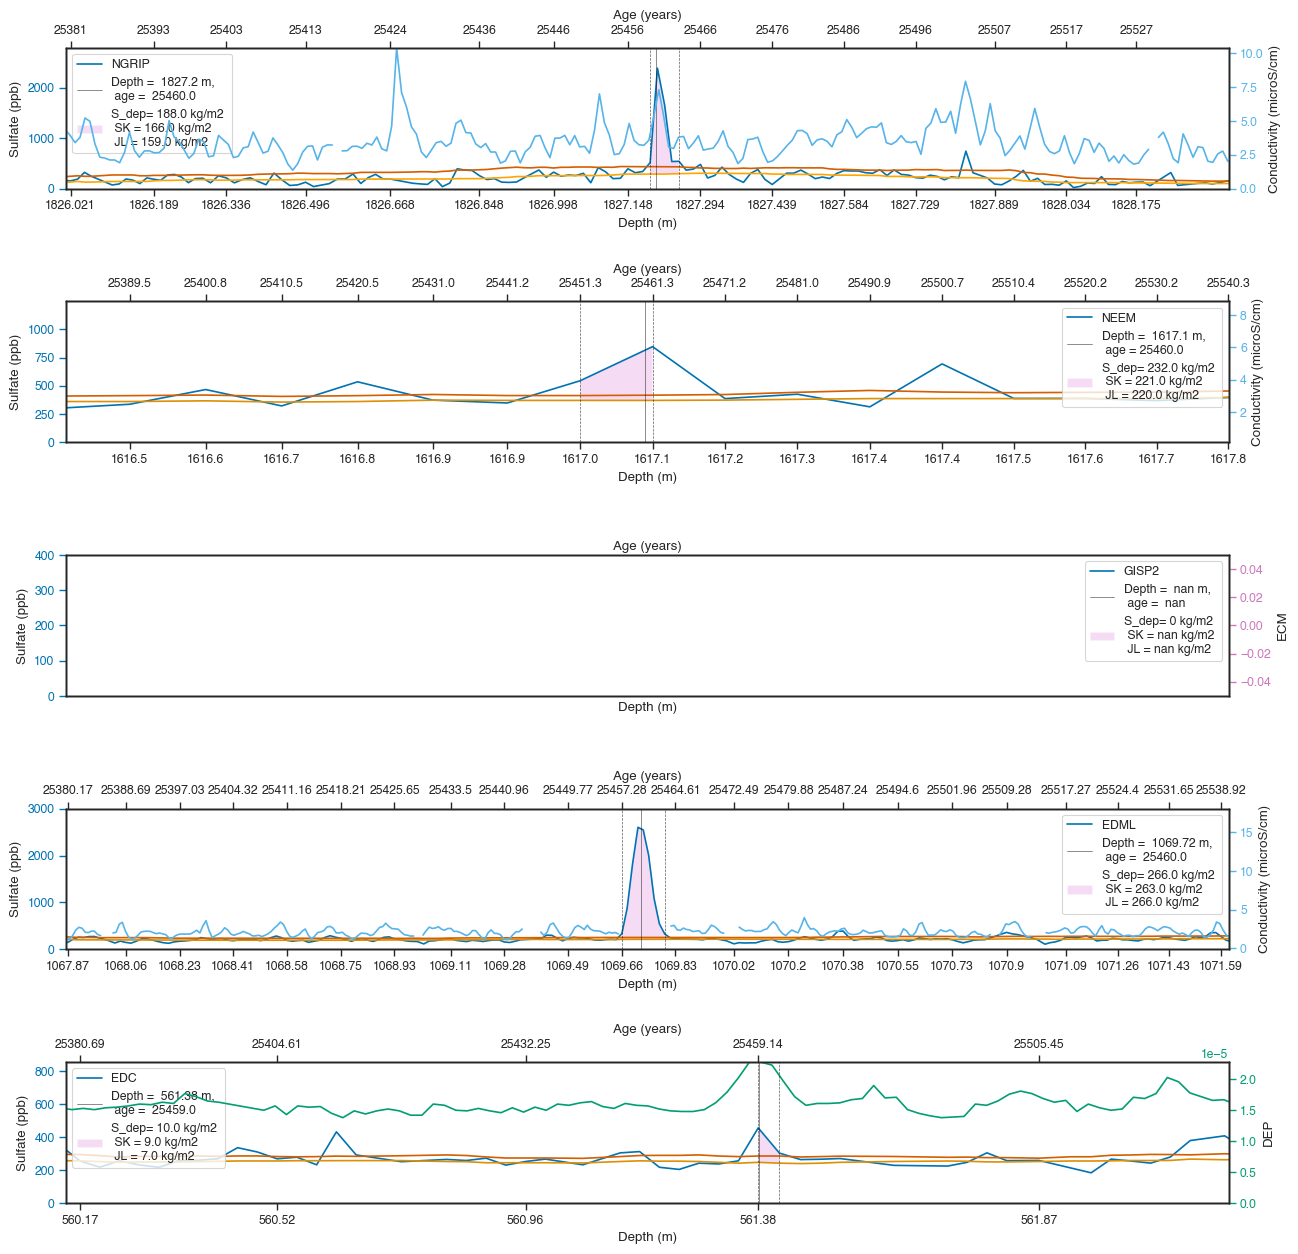

In [536]:
## EXAMPLE
no = 3 # volcanic threshold = RRM + 2*RMAD
quantify_bp_eruptions('NGRIP',1827.205, all_RRM_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], all_RMAD_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)],  all_RRM_NEEM[:,no],  all_RMAD_NEEM[:,no],  all_RRM_GISP2[:,no],  all_RMAD_GISP2[:,no],  all_RRM_EDC[:,no],  all_RMAD_EDC[:,no],  all_RRM_EDML[:,no],  all_RMAD_EDML[:,no], 100,100)

## Error propagation

In [537]:
%%capture
rho = .917
def der_sulfate(sulf, th, rrm, t):
    dfdx = rho * (1/th)  * t
    return dfdx
    
def der_thinning(sulf, th, rrm, t):
    dfdy = (sulf - rrm) * rho  * t
    return dfdy

def std_sulfate(sulf,rrm):
    sx = 0.2 * (sulf -rrm)
    return sx

def std_thinning(th):
    sy = 0.1 * (1/th)
    return sy

def error_propagation(sulf, th, rrm, t):
    dfdy = der_sulfate(sulf, th, rrm ,t )
    dfdx = der_thinning(sulf, th, rrm ,t)
    sx = std_sulfate(sulf, rrm)
    sy = std_thinning(th)
    sf = np.sqrt( (( np.abs(dfdy)**2 ) * (sx**2)) + ((np.abs(dfdx) **2) * (sy**2) )      )
    
    return np.nansum(sf)


std_EDML = np.zeros(len(depth_bp_EDML))
peaks_EDML = np.zeros(len(depth_bp_EDML))
std_NGRIP = np.copy(std_EDML)
peaks_NGRIP = np.copy(std_EDML)
std_NEEM = np.copy(std_EDML)
peaks_NEEM = np.copy(std_EDML)
std_GISP2 = np.copy(std_EDML)
peaks_GISP2 = np.copy(std_EDML)
std_EDC = np.copy(std_EDML)
peaks_EDC = np.copy(std_EDML)
sum_EDML = []

no = 3

EDML_s_std = []

for i in range(len(depth_bp_EDML)):
    EDML_peak, erup_start_EDML, erup_end_EDML, EDML_s, EDML_d, EDML_R, EDML_a, EDML_th, EDML_t= peak_eruption(EDML_age,depth_bp_EDML,depth_bp_EDML[i],EDML_sulfate, all_RRM_EDML[:,no],  all_RMAD_EDML[:,no], EDML_depth, EDML_depth_bottom, EDML_depth_top, EDML_thinning_corr, 100, 100)
    NGRIP_peak, erup_start_NGRIP,erup_end_NGRIP, NGRIP_s, NGRIP_d, NGRIP_R, NGRIP_a, NGRIP_th, NGRIP_t = peak_eruption(NGRIP_annual,depth_bp_NGRIP,depth_bp_NGRIP[i],NGRIP_sulfate_annual,all_RRM_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], all_RMAD_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top, NGRIP_annual_thinning, 100, 100)
    NEEM_peak, erup_start_NEEM, erup_end_NEEM, NEEM_s, NEEM_d, NEEM_R, NEEM_a, NEEM_th, NEEM_t = peak_eruption(NEEM_age,depth_bp_NEEM,depth_bp_NEEM[i],NEEM_sulfate, all_RRM_NEEM[:,no],all_RMAD_NEEM[:,no], NEEM_depth, NEEM_depth_bottom, NEEM_depth_top, NEEM_thinning_corr,  100, 100)
    GISP2_peak, erup_start_GISP2, erup_end_GISP2, GISP2_s, GISP2_d, GISP2_R, GISP2_a, GISP2_th, GISP2_t = peak_eruption(GISP2_age,depth_bp_GISP2,depth_bp_GISP2[i],GISP2_sulfate, all_RRM_GISP2[:,no], all_RMAD_GISP2[:,no] , GISP2_depth, GISP2_depth_bottom, GISP2_depth_top, GISP2_thinning_corr, 100, 100)
    EDC_peak, erup_start_EDC, erup_end_EDC, EDC_s, EDC_d, EDC_R, EDC_a, EDC_th, EDC_t = peak_eruption(EDC_age[np.isfinite(EDC_age)],depth_bp_EDC,depth_bp_EDC[i],EDC_sulfate[np.isfinite(EDC_age)], all_RRM_EDC[:,no], all_RMAD_EDC[:,no], EDC_depth[np.isfinite(EDC_age)], EDC_depth_bottom[np.isfinite(EDC_age)], EDC_depth_top[np.isfinite(EDC_age)], EDC_thinning_corr[np.isfinite(EDC_age)], 100, 100)
    sum_EDML.append( np.nansum(EDML_s - EDML_R))
    std_EDML[i] = error_propagation(EDML_s, EDML_th, EDML_R, EDML_t)
    peaks_EDML[i] = EDML_peak
    std_NGRIP[i] = error_propagation(NGRIP_s, NGRIP_th, NGRIP_R, NGRIP_t) 
    peaks_NGRIP[i] = NGRIP_peak
    std_NEEM[i] = error_propagation(NEEM_s, NEEM_th, NEEM_R, NEEM_t)
    peaks_NEEM[i] = NEEM_peak
    std_GISP2[i] = error_propagation(GISP2_s, GISP2_th, GISP2_R, GISP2_t)
    peaks_GISP2[i] = GISP2_peak
    std_EDC[i] = error_propagation(EDC_s, EDC_th, EDC_R, EDC_t)
    peaks_EDC[i] = EDC_peak
    if i  == len(depth_bp_EDML)-1: 
        print(EDC_s, EDC_th, EDC_R, EDC_t, std_EDC[i], EDC_peak, EDC_d)
    
    ## std sulfate EDML
    
    EDML_s_std.append(np.nansum(std_sulfate(EDML_s, EDML_R)))

## Plots of thinning functions

2205.9915

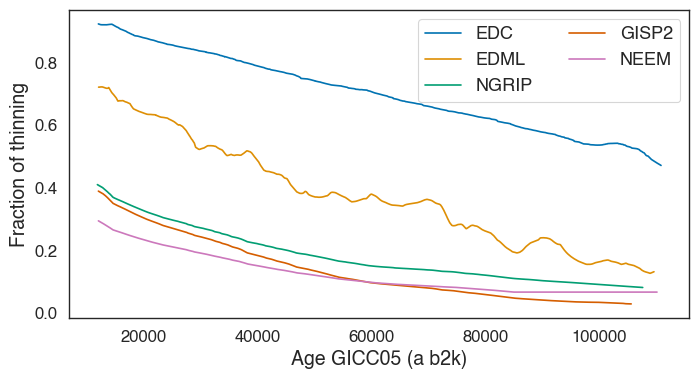

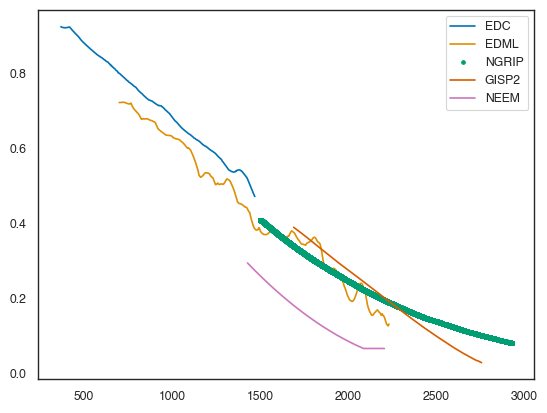

In [538]:
plt.figure(figsize=(8,4))
plt.plot(EDC_age, EDC_thinning_corr, label='EDC')
plt.plot(EDML_age, EDML_thinning_corr, label = 'EDML')
plt.plot(NGRIP_annual, NGRIP_annual_thinning, label ='NGRIP')
plt.plot(GISP2_age, GISP2_thinning_corr, label='GISP2')
plt.plot(NEEM_age, NEEM_thinning_corr, label='NEEM')
plt.legend(fontsize=13, ncol=2)
plt.xlabel('Age GICC05 (a b2k)', fontsize=14)
plt.ylabel('Fraction of thinning', fontsize=14)
plt.tick_params(labelsize=12)

plt.figure()
plt.plot(EDC_depth, EDC_thinning_corr, label='EDC')
plt.plot(EDML_depth, EDML_thinning_corr, label = 'EDML')
plt.plot(NGRIP_depth_annual, NGRIP_annual_thinning, label ='NGRIP', marker='.', linestyle='')
plt.plot(GISP2_depth, GISP2_thinning_corr, label='GISP2')
plt.plot(NEEM_depth, NEEM_thinning_corr, label='NEEM')
plt.legend()


NEEM_depth[-1]

## Error thinning

In [539]:
EDML_err_th = std_thinning(EDML_thinning_corr)
EDC_err_th = std_thinning(EDC_thinning_corr)
GISP2_err_th = std_thinning(GISP2_thinning_corr)
NEEM_err_th = std_thinning(NEEM_thinning_corr)
NGRIP_err_th = std_thinning(NGRIP_annual_thinning)
EDML_err_s = std_sulfate(EDML_sulfate, all_RRM_EDML[:,3])
EDML_s_std = np.array(EDML_s_std)
sort_sulfate_EDML = np.argsort(EDML_sulfate)
x_axis_EDML = np.arange(1,len(EDML_sulfate)+1,1)

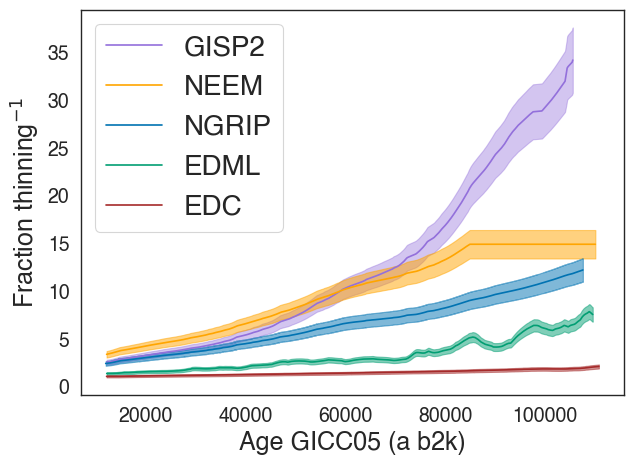

In [540]:
%matplotlib inline
fig, ax1 = plt.subplots(1,1, figsize=(7,5))
ax1.plot(GISP2_age, 1/GISP2_thinning_corr,label='GISP2', color='mediumpurple')
ax1.fill_between(GISP2_age, 1/GISP2_thinning_corr -GISP2_err_th, 1/GISP2_thinning_corr +GISP2_err_th, alpha=.4, color='mediumpurple' )
ax1.plot(NEEM_age, 1/NEEM_thinning_corr,label='NEEM', color='orange')
ax1.fill_between(NEEM_age, 1/NEEM_thinning_corr -NEEM_err_th, 1/NEEM_thinning_corr +NEEM_err_th, alpha=.5, color='orange' )
ax1.plot(NGRIP_annual, 1/NGRIP_annual_thinning,label='NGRIP', color='b')
ax1.fill_between(NGRIP_annual, 1/NGRIP_annual_thinning -NGRIP_err_th, 1/NGRIP_annual_thinning +NGRIP_err_th, alpha=.5, color='b' )
ax1.plot(EDML_age, 1/EDML_thinning_corr, label='EDML', color='g')
ax1.fill_between(EDML_age, 1/EDML_thinning_corr -EDML_err_th, 1/EDML_thinning_corr +EDML_err_th, alpha=.5 ,color='g')
ax1.plot(EDC_age, 1/EDC_thinning_corr,label='EDC', color='brown')
ax1.fill_between(EDC_age, 1/EDC_thinning_corr -EDC_err_th, 1/EDC_thinning_corr +EDC_err_th, alpha=.5, color='brown' )
ax1.set_xlabel('Age GICC05 (a b2k)', fontsize=18)
ax1.set_ylabel(r'Fraction thinning$^{-1}$', fontsize=18)
plt.yscale('linear')
ax1.legend(loc = 'upper left', fontsize=20)
ax1.tick_params(labelsize=14)

## Plots of error propagation for sulfate deposition

Text(0.5, 1.0, 'EDC')

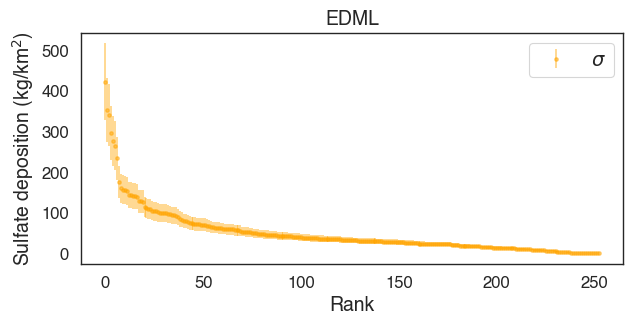

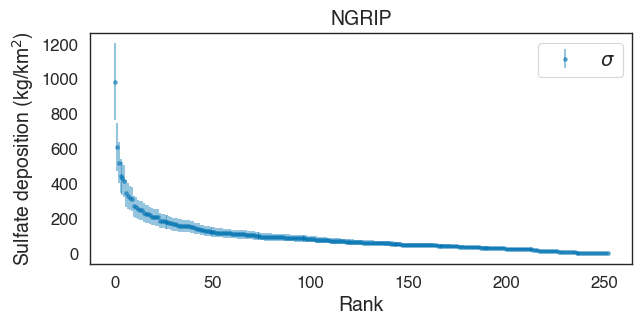

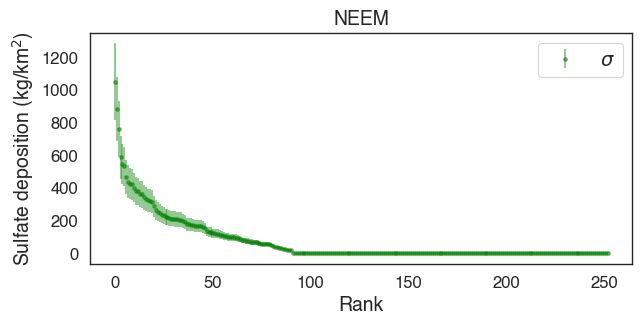

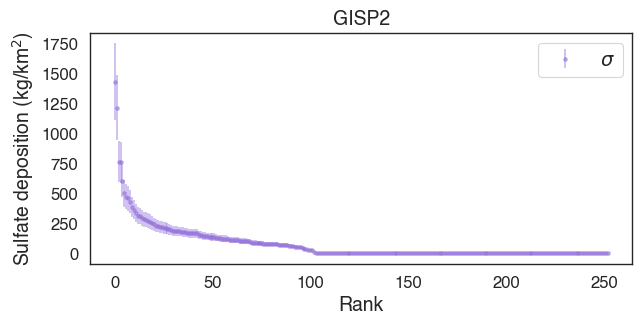

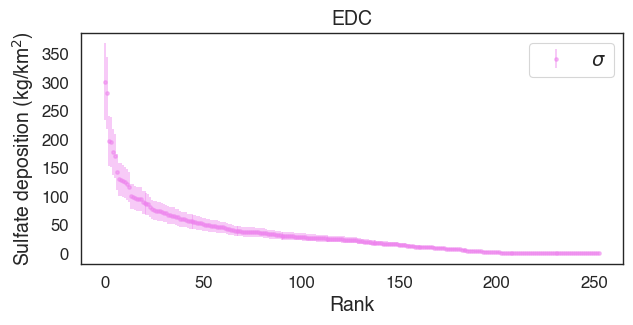

In [541]:
%matplotlib inline
arg_EDML = np.argsort(peaks_EDML)#
arg_NGRIP = np.argsort(peaks_NGRIP)
arg_NEEM = np.argsort(peaks_NEEM)
arg_GISP2 = np.argsort(peaks_GISP2)
arg_EDC = np.argsort(peaks_EDC)

fst = 12
fs = 14

y = np.arange(0,len(depth_bp_EDML), 1)[::-1]

plt.figure(figsize=(7,3))
plt.errorbar(y, peaks_EDML[arg_EDML], yerr=std_EDML[arg_EDML], fmt='.', alpha=.5, c='orange',label = r'$\sigma$')
plt.ylabel(r'Sulfate deposition (kg/km$^2$)', fontsize = fs)
plt.xlabel('Rank', fontsize = fs)
plt.legend(loc='upper right', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.title('EDML', fontsize=fs)
''
plt.figure(figsize=(7,3))
plt.errorbar(y, peaks_NGRIP[arg_NGRIP], yerr=std_NGRIP[arg_NGRIP], fmt='.', alpha=.5, c='b',label = r'$\sigma$')
plt.ylabel(r'Sulfate deposition (kg/km$^2$)', fontsize = fs)
plt.xlabel('Rank', fontsize = fs)
plt.legend(loc='upper right', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.title('NGRIP', fontsize=fs)

plt.figure(figsize=(7,3))
plt.errorbar(y, peaks_NEEM[arg_NEEM], yerr=std_NEEM[arg_NEEM], fmt='.', alpha=.5, c='green',label = r'$\sigma$')
plt.ylabel(r'Sulfate deposition (kg/km$^2$)', fontsize = fs)
plt.xlabel('Rank', fontsize = fs)
plt.legend(loc='upper right', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.title('NEEM', fontsize=fs)

plt.figure(figsize=(7,3))
plt.errorbar(y, peaks_GISP2[arg_GISP2], yerr=std_GISP2[arg_GISP2], fmt='.', alpha=.5, c='mediumpurple',label = r'$\sigma$')
plt.ylabel(r'Sulfate deposition (kg/km$^2$)', fontsize = fs)
plt.xlabel('Rank', fontsize = fs)
plt.legend(loc='upper right', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.title('GISP2', fontsize = fs)

plt.figure(figsize=(7,3))
plt.errorbar(y, peaks_EDC[arg_EDC], yerr=std_EDC[arg_EDC], fmt='.', alpha=.5, c='violet',label = r'$\sigma$')
plt.ylabel(r'Sulfate deposition (kg/km$^2$)', fontsize = fs)
plt.xlabel('Rank', fontsize = fs)
plt.legend(loc='upper right', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.title('EDC', fontsize = fs)


## Plotting some of the largest eruptions 

In [542]:
plt.rc('hatch', color='m', linewidth=1)
def visualise_eruption(t1, depth_NGRIP): 
    
    idx_taupo = np.where(depth_bp_NGRIP == depth_NGRIP)
    
    EDML_peak, erup_start_EDML, erup_end_EDML, EDML_s, EDML_d, EDML_R, EDML_a, EDML_th, EDML_t= peak_eruption(EDML_age,depth_bp_EDML,depth_bp_EDML[idx_taupo],EDML_sulfate, all_RRM_EDML[:,no],  all_RMAD_EDML[:,no], EDML_depth, EDML_depth_bottom, EDML_depth_top, EDML_thinning_corr, 100, 100)
    NGRIP_peak, erup_start_NGRIP,erup_end_NGRIP, NGRIP_s, NGRIP_d, NGRIP_R, NGRIP_a, NGRIP_th, NGRIP_t = peak_eruption(NGRIP_annual,depth_bp_NGRIP,depth_bp_NGRIP[idx_taupo],NGRIP_sulfate_annual,all_RRM_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], all_RMAD_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top, NGRIP_annual_thinning, 100, 100)
    NEEM_peak, erup_start_NEEM, erup_end_NEEM, NEEM_s, NEEM_d, NEEM_R, NEEM_a, NEEM_th, NEEM_t = peak_eruption(NEEM_age,depth_bp_NEEM,depth_bp_NEEM[idx_taupo],NEEM_sulfate, all_RRM_NEEM[:,no],all_RMAD_NEEM[:,no], NEEM_depth, NEEM_depth_bottom, NEEM_depth_top, NEEM_thinning_corr,  100, 100)
    GISP2_peak, erup_start_GISP2, erup_end_GISP2, GISP2_s, GISP2_d, GISP2_R, GISP2_a, GISP2_th, GISP2_t = peak_eruption(GISP2_age,depth_bp_GISP2,depth_bp_GISP2[idx_taupo],GISP2_sulfate, all_RRM_GISP2[:,no], all_RMAD_GISP2[:,no] , GISP2_depth, GISP2_depth_bottom, GISP2_depth_top, GISP2_thinning_corr, 100, 100)
    EDC_peak, erup_start_EDC, erup_end_EDC, EDC_s, EDC_d, EDC_R, EDC_a, EDC_th, EDC_t = peak_eruption(EDC_age[np.isfinite(EDC_age)],depth_bp_EDC,depth_bp_EDC[idx_taupo],EDC_sulfate[np.isfinite(EDC_age)], all_RRM_EDC[:,no], all_RMAD_EDC[:,no], EDC_depth[np.isfinite(EDC_age)], EDC_depth_bottom[np.isfinite(EDC_age)], EDC_depth_top[np.isfinite(EDC_age)], EDC_thinning_corr[np.isfinite(EDC_age)], 100, 100)
        
    ## NEEM
    idx_1 = np.where(np.isin(NEEM_age, NEEM_a))

    if len(idx_1[0]) !=0:
        
        depth_b = np.interp(NEEM_depth_bottom[idx_1], NEEM_depth, NEEM_age)
        depth_t = np.interp(NEEM_depth_top[idx_1], NEEM_depth, NEEM_age)
        x_NEEM= np.append(depth_t , depth_b[-1])
        y_NEEM = np.append(NEEM_s, NEEM_s[-1])
        y2_NEEM = np.append(NEEM_R, NEEM_R[-1])
        
    else:
        depth_b = []
        depth_t = []
        x_NEEM = []
        y_NEEM = []
        y2_NEEM = []
        
    
    ## EDC
    idx_1 = np.where(np.isin(EDC_age, EDC_a))
    
    if len(idx_1[0]) !=0:

        depth_b = np.interp(EDC_depth_bottom[idx_1], EDC_depth, EDC_age)
        depth_t = np.interp(EDC_depth_top[idx_1], EDC_depth, EDC_age)
        x_EDC = np.append(depth_t , depth_b[-1])
        y_EDC = np.append(EDC_s, EDC_s[-1])
        y2_EDC = np.append(EDC_R, EDC_R[-1])
        
    else:
        depth_b = []
        depth_t = []
        x_EDC = []
        y_EDC = []
        y2_EDC = []
        
    ## EDML
    idx_1 = np.where(np.isin(EDML_age, EDML_a))

    if len(idx_1[0]) !=0:
        
        depth_b = np.interp(EDML_depth_bottom[idx_1], EDML_depth, EDML_age)
        depth_t = np.interp(EDML_depth_top[idx_1], EDML_depth, EDML_age)
        x_EDML = np.append(depth_t , depth_b[-1])
        y_EDML = np.append(EDML_s, EDML_s[-1])
        y2_EDML = np.append(EDML_R, EDML_R[-1])

    else:
        
        depth_b = []
        depth_t = []
        x_EDML = []
        y_EDML = []
        y2_EDML = []
        
    ## NGRIP
    idx_1 = np.where(np.isin(NGRIP_annual, NGRIP_a))
    
    if len(idx_1[0]) !=0:

        depth_b = np.interp(NGRIP_depth_annual_bottom[idx_1], NGRIP_depth_annual, NGRIP_annual)
        depth_t = np.interp(NGRIP_depth_annual_top[idx_1], NGRIP_depth_annual, NGRIP_annual)
        x_NGRIP = np.append(depth_t , depth_b[-1])
        y_NGRIP = np.append(NGRIP_s, NGRIP_s[-1])
        y2_NGRIP = np.append(NGRIP_R, NGRIP_R[-1])
        
    else:
        
        depth_b = []
        depth_t = []
        x_NGRIP =[]
        y_NGRIP = []
        y2_NGRIP = []
        
        
    ## GISP2
    idx_1 = np.where(np.isin(GISP2_age, GISP2_a))
    
    if len(idx_1[0]) !=0:

        depth_b = np.interp(GISP2_depth_bottom[idx_1], GISP2_depth, GISP2_age)
        depth_t = np.interp(GISP2_depth_top[idx_1], GISP2_depth, GISP2_age)
        x_GISP2 = np.append(depth_t , depth_b[-1])
        y_GISP2 = np.append(GISP2_s, GISP2_s[-1])
        y2_GISP2 = np.append(GISP2_R, GISP2_R[-1])
        
    else:
        depth_b = []
        depth_t = []
        x_GISP2 = []
        y_GISP2 = []
        y2_GISP2 = []
        
    
    ## Plot
    
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(6,5), sharex=True)
    fig.tight_layout(pad=-1)

    c1 = 'blue'
    c2 = 'm'
    c3 = 'g'
    c4 = 'k'
    c5 = 'orange'

    lw = 1.2
    
    xlim1 = t1 - 80
    xlim2 = t1 + 80
    
    lim_y = 200
    per = 0.3

    ax1.plot(NGRIP_annual, NGRIP_sulfate_annual, label='sulfate', linewidth= lw, color='b')
    ax1.plot(NGRIP_annual, all_RRM_NGRIP[:,3][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], label='RRM', linewidth= lw, color='r', linestyle='--')
    ax1.plot(NGRIP_annual, all_RMAD_NGRIP[:,3][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], label='volc.thres.', color='r', linewidth= lw)
    ax1.set_ylim(0,500)
    if len(x_NGRIP) !=0:
        ax1.fill_between(x_NGRIP, y2_NGRIP, y_NGRIP, facecolor='violet', hatch='/////', step='post', alpha=0.5, label='sulfate dep.')
    #ax1.set_ylim(0,np.nanmax(NGRIP_sulfate_annual[np.where((NGRIP_annual > xlim1) & (NGRIP_annual < xlim2))]) + per*np.nanmax(NGRIP_sulfate_annual[np.where((NGRIP_annual > xlim1) & (NGRIP_annual < xlim2))]))
    plt.text(0.03, 0.75, 'NGRIP',  transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round', pad=.5))
    ax1.set_ylabel('Sulfate (ppb)', fontsize=12)

    ax22 = ax2.twinx()
    if (depth_bp_NGRIP[idx_taupo] == 2547.974) or (depth_bp_NEEM[idx_taupo] == 2015.44) or (depth_bp_NEEM[idx_taupo] == 2016.979):
        print('HEJ')
        ax22.plot(NEEM_age+25, NEEM_sulfate, label='sulfate', linewidth= lw, color='b')
        ax22.plot(NEEM_age+25, all_RRM_NEEM[:,3], label='RRM', linewidth= lw, color='r', linestyle='--')
        ax22.plot(NEEM_age+25, all_RMAD_NEEM[:,3], label='volc.thres.', color='r', linewidth= lw)
        ax22.set_xlim(xlim1, xlim2)
        ax22.set_ylim(0,500)
        if len(x_NEEM) != 0:
            ax22.fill_between(x_NEEM+25, y2_NEEM, y_NEEM, facecolor='violet', hatch='/////', step='post', alpha=0.5, label='sulfate dep.')
        plt.text(0.03, 0.75, 'NEEM',  transform=ax22.transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round', pad=.5))
        ax2.set_yticks([])
        ax22.set_ylabel('Sulfate (ppb)', fontsize=12)
    else:
        ax22.plot(NEEM_age, NEEM_sulfate, label='sulfate', linewidth= lw, color='b', linestyle='-')
        ax22.plot(NEEM_age, all_RRM_NEEM[:,3], label='RRM', linewidth= lw, color='r', linestyle='--')
        ax22.plot(NEEM_age, all_RMAD_NEEM[:,3], label='volc.thres.', color='r', linewidth= lw)
        ax22.set_xlim(xlim1, xlim2)
        ax22.set_ylim(0,500)
        if len(x_NEEM) != 0:
            ax22.fill_between(x_NEEM, y2_NEEM, y_NEEM, facecolor='violet', hatch='/////', step='post', alpha=0.5, label='sulfate dep.')
        plt.text(0.03, 0.75, 'NEEM',  transform=ax22.transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round', pad=.5))
        ax2.set_yticks([])
        ax22.set_ylabel('Sulfate (ppb)', fontsize=12)

    ax3.plot(GISP2_age, GISP2_sulfate, label='sulfate', linewidth= lw, color='b', linestyle='-')
    ax3.plot(GISP2_age, all_RRM_GISP2[:,3], label='RRM', linewidth= lw, color='r', linestyle='--')
    ax3.plot(GISP2_age, all_RMAD_GISP2[:,3], label='volc.thres.', color='r', linewidth= lw)
    ax3.set_xlim(xlim1, xlim2)
    ax3.set_ylabel('Sulfate (ppb)', fontsize=12)
    ax3.set_ylim(0,500)
    if len(x_GISP2) != 0:
        ax3.fill_between(x_GISP2, y2_GISP2, y_GISP2, facecolor='violet', hatch='/////', step='post', alpha=0.5, label='sulfate dep.')

    plt.text(0.03, 0.75, 'GISP2',  transform=ax3.transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round', pad=.5))

    ax44  = ax4.twinx()
    ax44.plot(EDC_age, EDC_sulfate, label='sulfate', linewidth= lw, color='b')
    ax44.plot(EDC_age, all_RRM_EDC[:,3], label='RRM', linewidth= lw, color='r', linestyle='--')
    ax44.plot(EDC_age, all_RMAD_EDC[:,3], label='volc.thres.', color='r', linewidth= lw)
    ax44.set_xlim(xlim1, xlim2)
    ax44.set_ylim(0,np.nanmax(EDC_sulfate[np.where((EDC_age > xlim1) & (EDC_age < xlim2))]) + per*np.nanmax(EDC_sulfate[np.where((EDC_age > xlim1) & (EDC_age < xlim2))]))
    if len(x_EDC) != 0:
        ax44.fill_between(x_EDC, y2_EDC, y_EDC, facecolor='violet', hatch='/////', step='post', alpha=0.5, label='sulfate dep.')
    plt.text(0.03, 0.75, 'EDC',  transform=ax44.transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round', pad=.5))
    ax4.set_yticks([])
    ax44.set_ylabel('Sulfate (ppb)', fontsize=12)

    ax5.plot(EDML_age, EDML_sulfate, label='sulfate', linewidth= lw, color='b')
    ax5.plot(EDML_age, all_RRM_EDML[:,3], label='RRM', linewidth= lw, color='r', linestyle='--')
    ax5.plot(EDML_age, all_RMAD_EDML[:,3], label='volc.thres.', color='r', linewidth= lw) 
    ax5.set_xlim(xlim1, xlim2)
    if len(x_EDML) !=0:
        ax5.fill_between(x_EDML, y2_EDML, y_EDML, facecolor='violet', hatch='/////', step='post', alpha=0.5, label='sulfate dep.')
    ax5.set_ylim(0,2000)
    ax5.set_ylabel('Sulfate (ppb)', fontsize=12)
    plt.text(0.03, 0.75, 'EDML',  transform=ax5.transAxes, fontsize=12, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round', pad=.5))
    ax5.tick_params(labelsize=10)
    ax44.tick_params(labelsize=10)
    ax3.tick_params(labelsize=10)
    ax22.tick_params(labelsize=10)
    ax1.tick_params(labelsize=10)
    ax1.legend(loc='upper right', ncol=2, fontsize=10)
    ax5.set_xlabel('Age GICC05 (a b2k)', fontsize=12)


    ax2.spines['top'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax22.spines['top'].set_visible(False)
    ax22.spines['bottom'].set_visible(False)
    ax3.spines['bottom'].set_visible(False)
    ax3.spines['top'].set_visible(False)
    ax4.spines['top'].set_visible(False)
    ax4.spines['bottom'].set_visible(False)
    ax44.spines['top'].set_visible(False)
    ax44.spines['bottom'].set_visible(False)
    #ax5.spines['bottom'].set_visible(False)
    ax5.spines['top'].set_visible(False)
    return 

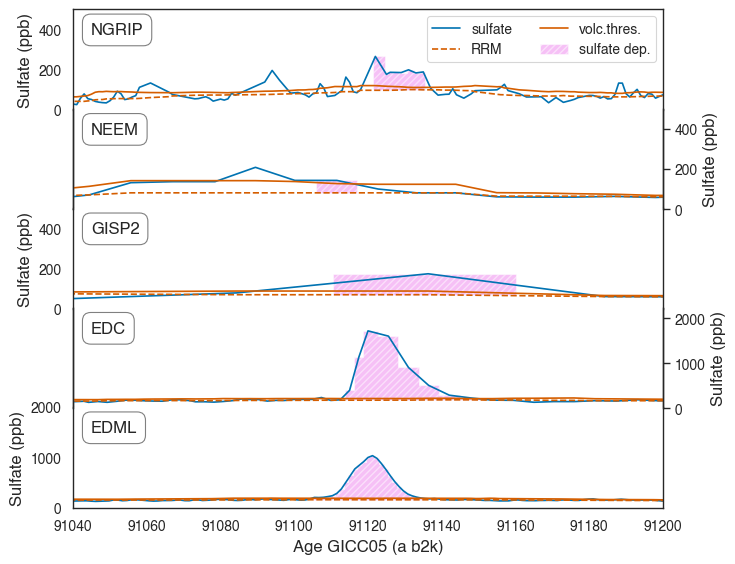

In [543]:
%matplotlib inline
#visualise_eruption(15682, 1628.21) # Towada
#(25460,1827.205 ) #Taupo
#visualise_eruption(29678, 1902.84) #unknown 
#visualise_eruption(55383, 2359.45 ) #NAAZ II
#visualise_eruption(74160, 2547.974) #Toba t2
#visualise_eruption(105435, 2905)
#visualise_eruption(67060, 2487.409)
#visualise_eruption(80077, 2619.143) #Los Chocoyos
#visualise_eruption(85068, 2691.24)
visualise_eruption(91120,2756.84)

## Making sure the shifted NEEM peaks have the same frequency as the other peaks for the possible Toba peaks

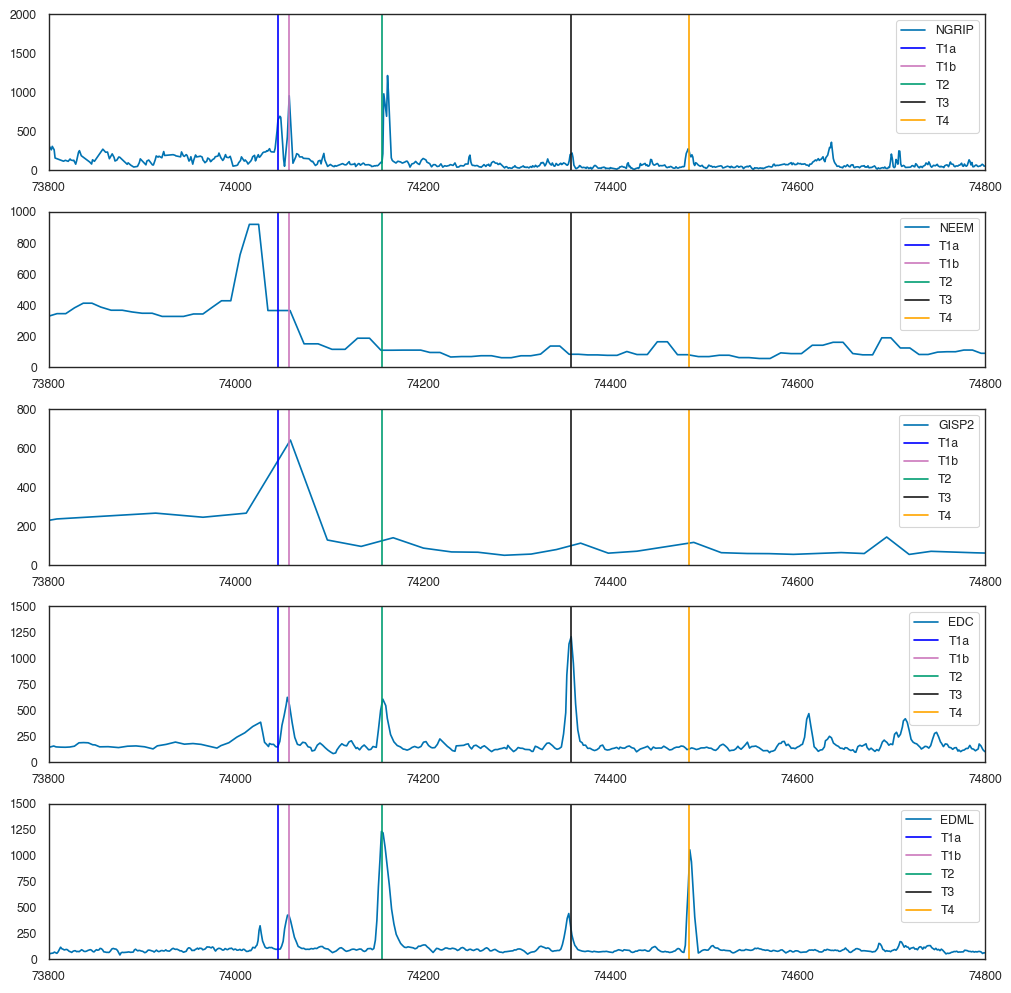

In [544]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(10,10))
fig.tight_layout(pad=1)

c1 = 'blue'
c2 = 'm'
c3 = 'g'
c4 = 'k'
c5 = 'orange'

ax1.plot(NGRIP_annual, NGRIP_sulfate_annual, label='NGRIP')
ax1.set_xlim(73800, 74800)
ax1.set_ylim(0,2000)
ax1.axvline(74045, label='T1a', c = c1)
ax1.axvline(74057, label ='T1b', c = c2)
ax1.axvline(74156, label='T2', c = c3)
ax1.axvline(74358, label='T3', c = c4)
ax1.axvline(74484, label='T4', c = c5)
ax1.legend()


ax2.plot(NEEM_age, NEEM_sulfate, label='NEEM')
ax2.set_xlim(73800, 74800)
ax2.set_ylim(0,1000)
ax2.axvline(74045, label='T1a', c = c1)
ax2.axvline(74057, label ='T1b', c=c2)
ax2.axvline(74156, label='T2', c=c3)
ax2.axvline(74358, label='T3', c=c4)
ax2.axvline(74484, label='T4', c=c5)
ax2.legend()

ax3.plot(GISP2_age, GISP2_sulfate, label='GISP2')
ax3.set_xlim(73800, 74800)
ax3.set_ylim(0,800)
ax3.axvline(74045, label='T1a', c=c1)
ax3.axvline(74057, label ='T1b', c=c2)
ax3.axvline(74156, label='T2',c=c3)
ax3.axvline(74358, label='T3', c=c4)
ax3.axvline(74484, label='T4', c=c5)
ax3.legend()

ax4.plot(EDC_age, EDC_sulfate, label='EDC')
ax4.set_xlim(73800, 74800)
ax4.set_ylim(0,1500)
ax4.axvline(74045, label='T1a', c=c1)
ax4.axvline(74057, label ='T1b', c=c2)
ax4.axvline(74156, label='T2',c=c3)
ax4.axvline(74358, label='T3', c=c4)
ax4.axvline(74484, label='T4', c=c5)
ax4.legend()

ax5.plot(EDML_age, EDML_sulfate, label='EDML')
ax5.set_xlim(73800, 74800)
ax5.set_ylim(0,1500)
ax5.axvline(74045, label='T1a', c=c1)
ax5.axvline(74057, label ='T1b', c=c2)
ax5.axvline(74156, label='T2', c=c3)
ax5.axvline(74358, label='T3', c=c4)
ax5.axvline(74484, label='T4', c=c5)

ax5.legend()

## Example of the Katla eruption

In [545]:
NGRIP_peak, erup_start_NGRIP,erup_end_NGRIP, NGRIP_s, NGRIP_d, NGRIP_R, NGRIP_a, NGRIP_th, NGRIP_t = peak_eruption(NGRIP_annual,depth_bp_NGRIP,depth_bp_NGRIP[0],NGRIP_sulfate_annual,all_RRM_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], all_RMAD_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top, NGRIP_annual_thinning, 100, 100)
idx_1 = np.where(np.isin(NGRIP_annual, NGRIP_a))

depth_b = np.interp(NGRIP_depth_annual_bottom[idx_1], NGRIP_depth_annual, NGRIP_annual)
depth_t = np.interp(NGRIP_depth_annual_top[idx_1], NGRIP_depth_annual, NGRIP_annual)
x_NGRIP = np.append(depth_t , depth_b[-1])
y_NGRIP = np.append(NGRIP_s, NGRIP_s[-1])
y2_NGRIP = np.append(NGRIP_R, NGRIP_R[-1])

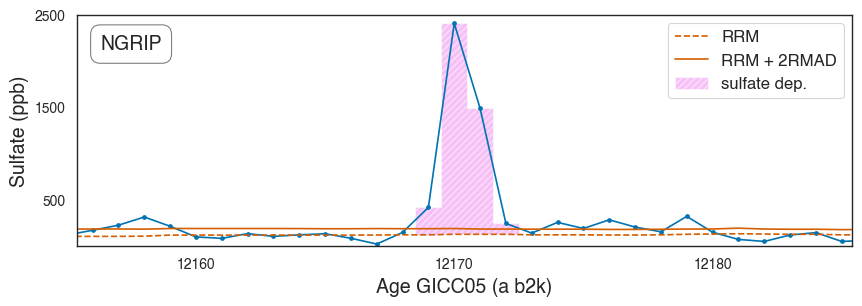

In [546]:
lim_fig = 15
idx_lim = np.where((NGRIP_annual > 12167) & (NGRIP_annual < 12173))
fig, ax = plt.subplots(1,1,figsize=(10,3))
plt.plot(NGRIP_annual, NGRIP_sulfate_annual, linestyle='-', marker='.')
plt.plot(NGRIP_annual, all_RRM_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], label = 'RRM', color='r', linestyle='--')
plt.plot(NGRIP_annual, all_RMAD_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], label = r'RRM + 2RMAD', color='r', linestyle='-')
plt.fill_between(x_NGRIP, y2_NGRIP, y_NGRIP, facecolor='violet', hatch='/////', step='post', alpha=0.5, label='sulfate dep.')
plt.xlim(12170.4 - lim_fig, 12170.4 + lim_fig)
plt.xlabel('Age GICC05 (a b2k)',fontsize=14)
plt.ylabel('Sulfate (ppb)', fontsize=14)
plt.yticks([500,1500,2500,3500],np.array([500,1500,2500,3500]).astype(int), fontsize=10)
plt.xticks([12160, 12170, 12180], np.array([12160, 12170, 12180]).astype(int), fontsize=10)
plt.ylim(0,2500)
plt.legend(fontsize=12)
plt.text(0.03, 0.85, 'NGRIP',  transform=ax.transAxes, fontsize=14, bbox=dict(facecolor='none', edgecolor='grey', boxstyle='round', pad=.5))
plt.savefig('Results/Vedde_NGRIP_example.png', dpi=1000, bbox_inches='tight')

## Example of the natural background and volcanic threshold for NGRIP

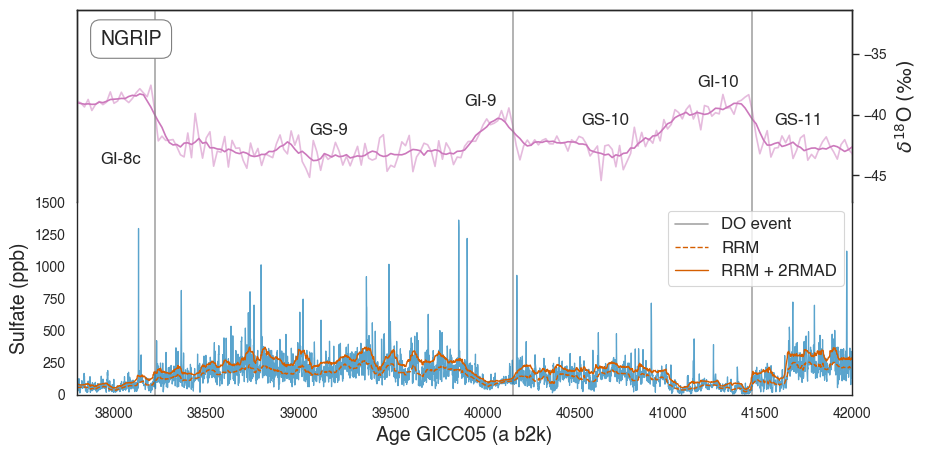

In [547]:
%matplotlib inline
NGRIP_d18O_smooth = savgol_filter(NGRIP_dO18, 7, 1)
lim_fig = 2100

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(10,5), sharex=True)
fig.subplots_adjust(hspace=0)
ax11 = ax1.twinx()
ax11.plot(NGRIP_dO18_age, NGRIP_dO18, color='m', alpha=0.5)
ax11.plot(NGRIP_dO18_age, NGRIP_d18O_smooth, color='m')
ax11.set_xlim(39900 - lim_fig, 39900 + lim_fig)
ax1.set_yticks([])
ax11.set_ylabel(r'$\delta^{18}$O $(‰)$', fontsize=14)

ax11.axvline(GL_onset[9], c='grey', alpha=.7)
ax2.axvline(GL_onset[9], c='grey', alpha=.7)
ax11.axvline(GL_onset[10], c='grey', alpha=.7)
ax2.axvline(GL_onset[10], c='grey', alpha=.7, label='DO event')
ax11.axvline(GL_onset[11], c='grey', alpha=.7)
ax2.axvline(GL_onset[11], c='grey', alpha=.7)

ax2.spines['top'].set_visible(False)
ax11.spines['bottom'].set_visible(False)
ax1.spines['bottom'].set_visible(False)


ax2.plot(NGRIP_annual, NGRIP_sulfate_annual, linestyle='-', linewidth=.9, alpha=.65)
ax2.plot(NGRIP_annual, all_RRM_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], label = 'RRM', color='r', linestyle='--', linewidth=1)
ax2.plot(NGRIP_annual, all_RMAD_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], label = r'RRM + 2RMAD', color='r', linestyle='-', linewidth=1)
ax2.set_xlim(39900 - lim_fig, 39900 + lim_fig)
ax2.set_xlabel('Age GICC05 (a b2k)',fontsize=14)
ax2.set_ylabel('Sulfate (ppb)', fontsize=14)
ax2.set_ylim(0,1500)
ax2.legend(fontsize=12)
plt.text(0.03, 0.82, 'NGRIP',  transform=ax1.transAxes, fontsize=14, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', pad=.5, alpha=1))
plt.text(0.03, 0.2, 'GI-8c',  transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='None', pad=.5, alpha=1, edgecolor='None'))
plt.text(0.3, 0.35, 'GS-9',  transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='None', pad=.5, alpha=1, edgecolor='None'))
plt.text(0.5, 0.5, 'GI-9',  transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='None', pad=.5, alpha=1, edgecolor='None'))
plt.text(0.65, 0.4, 'GS-10',  transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='None', pad=.5, alpha=1, edgecolor='None'))
plt.text(0.8, 0.6, 'GI-10',  transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='None', pad=.5, alpha=1, edgecolor='None'))
plt.text(0.9, 0.4, 'GS-11',  transform=ax1.transAxes, fontsize=12, bbox=dict(facecolor='None', pad=.5, alpha=1, edgecolor='None'))
ax1.tick_params(axis='both', labelsize=10)
ax11.tick_params(axis='both', labelsize=10)
ax2.tick_params(axis='both', labelsize=10)

## Checks that the ages for the bipolar eruptions are (almost) the same. (Some are not but this is due to many nan points, that means that there is also no sulfate deposition at this point so it is okay.)

In [548]:
## empty arrays 
age_off_NGRIP = []
age_off_EDML = []
age_off_EDC = []
age_off_NEEM = []
age_off_GISP2 = []
depth_off_NGRIP = []
depth_off_EDML = []
depth_off_EDC = []
depth_off_NEEM = []
depth_off_GISP2 = []

## loop to see if any bipolar ages differ more than 10 years. 
for i in range(len(age_bp_NGRIP)):
    
    if (np.abs(age_bp_NGRIP[i] - age_bp_EDML[i]) > 10) or (np.abs(age_bp_NGRIP[i] - age_bp_EDC[i]) > 10) or (np.abs(age_bp_NGRIP[i] - age_bp_NEEM[i]) > 10) or (np.abs(age_bp_NGRIP[i] - age_bp_GISP2[i]) > 10) or (np.abs(age_bp_EDML[i] - age_bp_EDC[i]) > 10 ) or (np.abs(age_bp_EDML[i] - age_bp_NEEM[i]) > 10 ) or (np.abs(age_bp_EDML[i] - age_bp_GISP2[i]) > 10) or (np.abs(age_bp_EDC[i] - age_bp_NEEM[i]) > 10) or (np.abs(age_bp_EDC[i] - age_bp_GISP2[i]) > 10) or (np.abs(age_bp_NEEM[i] - age_bp_GISP2[i]) > 10): 
        age_off_NGRIP.append(age_bp_NGRIP[i])
        age_off_EDML.append(age_bp_EDML[i])
        age_off_EDC.append(age_bp_EDC[i])
        age_off_NEEM.append(age_bp_NEEM[i])
        age_off_GISP2.append(age_bp_GISP2[i])
        depth_off_NGRIP.append(depth_bp_NGRIP[i])
        depth_off_EDML.append(depth_bp_EDML[i])
        depth_off_EDC.append(depth_bp_EDC[i])
        depth_off_NEEM.append(depth_bp_NEEM[i])
        depth_off_GISP2.append(depth_bp_GISP2[i])
 
#table with results (ages that differ more than 10 years)    
table = zip_longest( age_off_NGRIP, age_off_EDML, age_off_EDC,  age_off_NEEM, age_off_GISP2, depth_off_NGRIP, depth_off_EDML, depth_off_EDC,  depth_off_NEEM, depth_off_GISP2 )

print(tabulate(table, headers=['NGRIP age', 'EDML age', 'EDC age', 'NEEM age', 'GISP2 age', 'NGRIP depth', 'EDML depth', 'EDC depth', 'NEEM depth', 'GISP2 depth']))

#saving results in an excel file 
data = {
    'age NGRIP': age_off_NGRIP,
    'age NEEM': age_off_NEEM,
    'age GISP2': age_off_GISP2,
    'age EDC': age_off_EDC,
    'age EDML': age_off_EDML,
    
    'depth NGRIP': depth_off_NGRIP,
    'depth NEEM': depth_off_NEEM,
    'depth GISP2': depth_off_GISP2,
    'depth EDC': depth_off_EDC,
    'depth EDML': depth_off_EDML
    }

data = dict([ (k,pd.Series(v)) for k,v in data.items() ])

df = pd.DataFrame(data)

# Save the DataFrame as an Excel file
df.to_excel('ages_off_all_v2.xlsx', index=False)

  NGRIP age    EDML age    EDC age    NEEM age    GISP2 age    NGRIP depth    EDML depth    EDC depth    NEEM depth    GISP2 depth
-----------  ----------  ---------  ----------  -----------  -------------  ------------  -----------  ------------  -------------
    18832.6     18832.2    18813.3       nan        18832.6        1699.82        930.49       488.97        nan           1894.73
    22243.8     22198.6    22246.9     22243.9      22243.6        1770.81        997.8        526.5        1585.4         1963.65
    48440.8     48440.3    48366.5       nan        48440.7        2242.2        1494.11       819.25        nan           2374
    62680       62678.7    62678.9     62669.1      62680          2451.8        1725          982.1        1968.95        2526.51
      nan      108959     108988      108789          nan           nan          2227.58      1451.03       2204.56         nan


# This part is evaluating the eruptions when using a threshold of RRM + 3*RMAD.

## Function that calculates depostion for all depths for all peaks (threshold=3)

In [549]:
%%capture

## this function is not used for end results, more to compare with when calculating the sulfate deposition for different thresholds. 
def all_peaks(lim_eruption1,lim_eruption2):
    '''function that calculates the sulfate deposition for all eruptions for all ice cores
    This function uses the threshold threshold = RRM + 3*RMAD.
    input:
        limit1 = float. A value of the limit of depth left of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
        limit2 = float. A value of the limit of depth right of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
    output:
        NGRIP_peaks = array (n,). Array with all sulfate depositions for NGRIP. 
        EDC_peaks = array (n,). Array with all sulfate depositions for EDC. 
        EDML_peaks = array (n,). Array with all sulfate depositions for EDML. 
        NEEM_peaks = array (n,). Array with all sulfate depositions for NEEM. 
        GISP2_peaks = array (n,). Array with all sulfate depositions for GISP2. 
    '''
    ## Empty arrays
    NGRIP_peaks = []
    EDC_peaks = []
    EDML_peaks = []
    NEEM_peaks = []
    GISP2_peaks = []

    ## Loop to calculate all sulfate depositions. 
    for i in range(len(depth_bp_NGRIP)):
        NGRIP_peak, erup_start_NGRIP, erup_end_NGRIP, NGRIP_s, NGRIP_d, NGRIP_R, NGRIP_a, NGRIP_th , NGRIP_t= peak_eruption(NGRIP_annual,depth_bp_NGRIP,depth_bp_NGRIP[i],NGRIP_sulfate_annual, NGRIP_RRM, NGRIP_RMAD, NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top,  NGRIP_annual_thinning,lim_eruption1, lim_eruption2 )
        NGRIP_peaks.append(NGRIP_peak)
        
        age_bp_NGRIP = np.interp(depth_bp_NGRIP[i], NGRIP_depth_annual, NGRIP_annual)
        erup_len_NGRIP_before = age_bp_NGRIP - erup_start_NGRIP
        erup_len_NGRIP_after = erup_end_NGRIP - age_bp_NGRIP
        
        EDC_peak, erup_start_EDC, erup_end_EDC, EDC_s, EDC_d, EDC_R, EDC_a, EDC_th , EDC_t= peak_eruption(EDC_age[np.isfinite(EDC_age)],depth_bp_EDC,depth_bp_EDC[i],EDC_sulfate[np.isfinite(EDC_age)], EDC_RRM[np.isfinite(EDC_age)], EDC_RMAD[np.isfinite(EDC_age)], EDC_depth[np.isfinite(EDC_age)], EDC_depth_bottom[np.isfinite(EDC_age)], EDC_depth_top[np.isfinite(EDC_age)], EDC_thinning_corr[np.isfinite(EDC_age)],lim_eruption1, lim_eruption2)
        EDC_peaks.append(EDC_peak)
    
        EDML_peak, erup_start_EDML, erup_end_EDML, EDML_s, EDML_d, EDML_R, EDML_a, EDML_th , EDML_t= peak_eruption(EDML_age,depth_bp_EDML,depth_bp_EDML[i],EDML_sulfate, EDML_RRM, EDML_RRMAD, EDML_depth, EDML_depth_bottom, EDML_depth_top, EDML_thinning_corr,lim_eruption1, lim_eruption2 )
        EDML_peaks.append(EDML_peak)
        
        NEEM_peak, erup_start_NEEM,erup_end_NEEM, NEEM_s, NEEM_d, NEEM_R, NEEM_a, NEEM_th, NEEM_t = peak_eruption(NEEM_age,depth_bp_NEEM,depth_bp_NEEM[i],NEEM_sulfate, NEEM_RRM, NEEM_RMAD, NEEM_depth, NEEM_depth_bottom, NEEM_depth_top, NEEM_thinning_corr, lim_eruption1, lim_eruption2 )
        NEEM_peaks.append(NEEM_peak)
        
        GISP2_peak, erup_start_GISP2,erup_end_GISP2,GISP2_s, GISP2_d, GISP2_R, GISP2_a, GISP2_th, GISP2_t= peak_eruption(GISP2_age,depth_bp_GISP2,depth_bp_GISP2[i],GISP2_sulfate, GISP2_RRM, GISP2_RMAD, GISP2_depth, GISP2_depth_bottom, GISP2_depth_top, GISP2_thinning_corr,lim_eruption1, lim_eruption2  )
        GISP2_peaks.append(GISP2_peak)
    
    return np.array(NGRIP_peaks), np.array(EDC_peaks), np.array(EDML_peaks), np.array(NEEM_peaks), np.array(GISP2_peaks)

NGRIP_erup, EDC_erup, EDML_erup, NEEM_erup, GISP2_erup = all_peaks(100,100) ## Test

## Putting the sulfate deposition (with threshold=3) in an excel file 

In [550]:
import pandas as pd

# Create a sample table as a pandas DataFrame
## saving the results in an excel file ##

data = {
    'depth NGRIP': depth_bp_NGRIP,
    'sul dep NGRIP': NGRIP_erup,
    'depth EDC': depth_bp_EDC,
    'sul dep EDC': EDC_erup,
    'depth EDML': depth_bp_EDML,
    'sul dep EDML': EDML_erup,
    'depth NEEM': depth_bp_NEEM,
    'sul dep NEEM': NEEM_erup,
    'depth GISP2': depth_bp_GISP2,
    'sul dep GISP2': GISP2_erup
}

df = pd.DataFrame(data)

# Save the DataFrame as an Excel file
df.to_excel('bipolar_sulfate_deposition_v3.xlsx', index=False)

# Function that calculates the lenghts of the eruptions 

In [551]:
%%capture

def eruption_length(NGRIP_RRM, NGRIP_RMAD, NEEM_RRM, NEEM_RMAD, GISP2_RRM, GISP2_RMAD, EDC_RRM, EDC_RMAD, EDML_RRM, EDML_RMAD, lim_eruption1, lim_eruption2):
    '''
    Function that calculates the length of the eruptions in years for all ice cores. 
    input: 
        NGRIP_RRM = array (n,). Array with RRM values for NGRIP. 
        NGRIP_RMAD = array (n,). Array with RMAD values for NGRIP.
        NEEM_RRM = array (m,). Array with RRM values for NEEM. 
        NEEM_RMAD = array (m,). Array with RMAD values for NEEM.
        GISP2_RRM = array (k,). Array with RRM values for GISP2. 
        GISP2_RMAD = array (k,). Array with RMAD values for GISP2.
        EDC_RRM = array (l,). Array with RRM values for EDC. 
        EDC_RMAD = array (l,). Array with RMAD values for EDC.
        EDML_RRM = array (v,). Array with RRM values for EDML. 
        EDML_RMAD = array (v,). Array with RMAD values for EDML.
        lim_eruption1 = float. A value of the limit of depth left of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
        lim_eruption2 = float. A value of the limit of depth right of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
    output:
        erup_len_NGRIP = array (len(depth_bp_NGRIP),). Array with the eruptions lengths for NGRIP. 
        erup_len_EDC = array (len(depth_bp_NGRIP),). Array with the eruptions lengths for EDC. 
        erup_len_EDML = array (len(depth_bp_NGRIP),). Array with the eruptions lengths for EDML. 
        erup_len_NEEM = array (len(depth_bp_NGRIP),). Array with the eruptions lengths for NEEM. 
        erup_len_GISP2 = array (len(depth_bp_NGRIP),). Array with the eruptions lengths for GISP2. 
    '''
    ## Empty arrays 
    erup_len_NGRIP = []
    erup_len_EDC = []
    erup_len_EDML = []
    erup_len_NEEM = []
    erup_len_GISP2 = []
    
    ## loop to calculate all eruption lengths 
    for i in range(len(depth_bp_NGRIP)):
        ## finding the start and end of the eruptions 
        EDML_peak, erup_start_EDML, erup_end_EDML, EDML_s, EDML_d, EDML_R, EDML_a, EDML_th, EDML_t = peak_eruption(EDML_age,depth_bp_EDML,depth_bp_EDML[i],EDML_sulfate, EDML_RRM, EDML_RMAD, EDML_depth, EDML_depth_bottom, EDML_depth_top, EDML_thinning_corr,lim_eruption1,lim_eruption2)
        NGRIP_peak, erup_start_NGRIP,erup_end_NGRIP, NGRIP_s, NGRIP_d, NGRIP_R, NGRIP_a, NGRIP_th, NGRIP_t = peak_eruption(NGRIP_annual,depth_bp_NGRIP,depth_bp_NGRIP[i],NGRIP_sulfate_annual, NGRIP_RRM, NGRIP_RMAD, NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top, NGRIP_annual_thinning,lim_eruption1,lim_eruption2)
        NEEM_peak, erup_start_NEEM, erup_end_NEEM, NEEM_s, NEEM_d, NEEM_R, NEEM_a, NEEM_th, NEEM_t = peak_eruption(NEEM_age,depth_bp_NEEM,depth_bp_NEEM[i],NEEM_sulfate, NEEM_RRM,NEEM_RMAD, NEEM_depth, NEEM_depth_bottom, NEEM_depth_top, NEEM_thinning_corr, lim_eruption1,lim_eruption2)
        GISP2_peak, erup_start_GISP2, erup_end_GISP2, GISP2_s, GISP2_d, GISP2_R, GISP2_a, GISP2_th , GISP2_t= peak_eruption(GISP2_age,depth_bp_GISP2,depth_bp_GISP2[i],GISP2_sulfate, GISP2_RRM, GISP2_RMAD, GISP2_depth, GISP2_depth_bottom, GISP2_depth_top, GISP2_thinning_corr, lim_eruption1,lim_eruption2)
        EDC_peak, erup_start_EDC, erup_end_EDC, EDC_s, EDC_d, EDC_R, EDC_a, EDC_th, EDC_t = peak_eruption(EDC_age[np.isfinite(EDC_age)],depth_bp_EDC,depth_bp_EDC[i],EDC_sulfate[np.isfinite(EDC_age)], EDC_RRM, EDC_RMAD, EDC_depth[np.isfinite(EDC_age)], EDC_depth_bottom[np.isfinite(EDC_age)], EDC_depth_top[np.isfinite(EDC_age)], EDC_thinning_corr[np.isfinite(EDC_age)],lim_eruption1,lim_eruption2)
        
        ## If statements to make sure peaks with only one data point counts as 1 year of eruption length, and also setting the length to nan if deposition is zero. 
        #EDML
        if (EDML_peak > 0) and ( ( erup_end_EDML == erup_start_EDML)): 
            erup_len_EDML.append(1)
        elif (EDML_peak == 0):
            erup_len_EDML.append(np.nan)
        else: 
            erup_len_EDML.append(erup_end_EDML - erup_start_EDML)
        #NGRIP
        if (NGRIP_peak > 0) and ( ( erup_end_NGRIP == erup_start_NGRIP)): 
            erup_len_NGRIP.append(1)
        elif (NGRIP_peak == 0):
            erup_len_NGRIP.append(np.nan)
        else: 
            erup_len_NGRIP.append(erup_end_NGRIP - erup_start_NGRIP)
        #EDC
        if (EDC_peak > 0) and ( ( erup_end_EDC == erup_start_EDC)): 
            erup_len_EDC.append(1)
        elif (EDC_peak == 0):
            erup_len_EDC.append(np.nan)
        else: 
            erup_len_EDC.append(erup_end_EDC - erup_start_EDC)
        #NEEM 
        if (NEEM_peak > 0) and ( ( erup_end_NEEM == erup_start_NEEM)): 
            erup_len_NEEM.append(1)
        elif (NEEM_peak == 0):
            erup_len_NEEM.append(np.nan)
        else: 
            erup_len_NEEM.append(erup_end_NEEM - erup_start_NEEM)
        #GISP2
        if (GISP2_peak > 0) and ( ( erup_end_GISP2 == erup_start_GISP2)): 
            erup_len_GISP2.append(1)
        elif (GISP2_peak == 0):
            erup_len_GISP2.append(np.nan)
        else: 
            erup_len_GISP2.append(erup_end_GISP2 - erup_start_GISP2)
 
    return np.array(erup_len_NGRIP), np.array(erup_len_EDC), np.array(erup_len_EDML), np.array(erup_len_NEEM), np.array(erup_len_GISP2)

no = 3 #which threshold we choose for RMAD. 
erup_len_NGRIP, erup_len_EDC, erup_len_EDML, erup_len_NEEM, erup_len_GISP2 = eruption_length(all_RRM_NGRIP[:,no][:][~np.isnan(copy_NGRIP_sulfate_annual[:])], 
                      all_RMAD_NGRIP[:,no][:][~np.isnan(copy_NGRIP_sulfate_annual[:])],  all_RRM_NEEM[:,no],  
                      all_RMAD_NEEM[:,no],  all_RRM_GISP2[:,no],  all_RMAD_GISP2[:,no],  all_RRM_EDC[:,no],  
                      all_RMAD_EDC[:,no],  all_RRM_EDML[:,no],  all_RMAD_EDML[:,no], 100,100)

# Function that finds the eruptions that cannot be found by the algorithm

In [552]:
%%capture
def missing_eruptions(NGRIP_eruptions, EDC_eruptions, EDML_eruptions, NEEM_eruptions, GISP2_eruptions):
    '''
    Function that returns arrays with eruptions that cannot be found by algorithm. 
    input: 
        NGRIP_eruptions = array (len(depth_bp_NGRIP),). array with list of sulfate deposition for NGRIP.
        EDC_eruptions = array (len(depth_bp_EDC),). array with list of sulfate deposition for EDC.
        EDML_eruptions = array (len(depth_bp_EDML),). array with list of sulfate deposition for EDML.
        NEEM_eruptions = array (len(depth_bp_NEEM),). array with list of sulfate deposition for NEEM.
        GISP2_eruptions = array (len(depth_bp_GISP2),). array with list of sulfate deposition for GISP2. 
    output:
        NGRIP_missing_depth = array (any,). array with list of depths that the algorithm cannot find for NGRIP.
        NGRIP_missing_sul = array (any,). array with list of sulfate deposition that the algorithm cannot find for NGRIP.
        EDC_missing_depth = array (any,). array with list of depths that the algorithm cannot find for EDC.
        EDC_missing_sul = array (any,). array with list of sulfate deposition that the algorithm cannot find for EDC.
        EDML_missing_depth = array (any,). array with list of depths that the algorithm cannot find for EDML.
        EDML_missing_sul = array (any,). array with list of sulfate deposition that the algorithm cannot find for EDML.
        NEEM_missing_depth = array (any,). array with list of depths that the algorithm cannot find for NEEM.
        NEEM_missing_sul = array (any,). array with list of sulfate deposition that the algorithm cannot find for NEEM.
        GISP2_missing_depth = array (any,). array with list of depths that the algorithm cannot find for GISP2.
        GISP2_missing_sul = array (any,). array with list of sulfate deposition that the algorithm cannot find for GISP2. 
    '''
    
    #empty arrays 
    NGRIP_missing_sul = []
    NGRIP_missing_depth = []

    EDC_missing_sul = []
    EDC_missing_depth = []

    EDML_missing_sul = []
    EDML_missing_depth = []

    NEEM_missing_sul = []
    NEEM_missing_depth = []

    GISP2_missing_sul = []
    GISP2_missing_depth = []

    ## loop to find 'missing' eruptions 
    for i in range(len(depth_bp_NGRIP)):
        if (np.isfinite(depth_bp_NGRIP[i])) & (NGRIP_eruptions[i] == 0):
            NGRIP_missing_depth.append(depth_bp_NGRIP[i])
            NGRIP_missing_sul.append(NGRIP_eruptions[i])
            
        if (np.isfinite(depth_bp_EDC[i])) & (EDC_eruptions[i] == 0):
            EDC_missing_depth.append(depth_bp_EDC[i])
            EDC_missing_sul.append(EDC_eruptions[i])
        
        if (np.isfinite(depth_bp_EDML[i])) & (EDML_eruptions[i] == 0):
            EDML_missing_depth.append(depth_bp_EDML[i])
            EDML_missing_sul.append(EDML_eruptions[i])
        
        if (np.isfinite(depth_bp_NEEM[i])) & (NEEM_eruptions[i] == 0):
            NEEM_missing_depth.append(depth_bp_NEEM[i])
            NEEM_missing_sul.append(NEEM_eruptions[i])
        
        if (np.isfinite(depth_bp_GISP2[i])) & (GISP2_eruptions[i] == 0):
            GISP2_missing_depth.append(depth_bp_GISP2[i])
            GISP2_missing_sul.append(GISP2_eruptions[i])
            
    return  np.array(NGRIP_missing_depth), np.array(NGRIP_missing_sul), np.array(EDC_missing_depth), np.array(EDC_missing_sul), np.array(EDML_missing_depth), np.array(EDML_missing_sul) , np.array(NEEM_missing_depth), np.array(NEEM_missing_sul), np.array(GISP2_missing_depth), np.array(GISP2_missing_sul)

##finding the 'missing' depths and corresponding sulfate peaks with threshold =3. 
NGRIP_missing_depth, NGRIP_missing_sul, EDC_missing_depth, EDC_missing_sul, EDML_missing_depth, EDML_missing_sul , NEEM_missing_depth, NEEM_missing_sul, GISP2_missing_depth, GISP2_missing_sul = missing_eruptions(NGRIP_erup, EDC_erup, EDML_erup, NEEM_erup, GISP2_erup)

# Function that calculates the percantage of missing peaks (threshold ==3)

In [553]:
%%capture
def percent_missing_peaks(limit1, limit2):
    '''
    Function that calculates the percentage of peaks that the algorithm cannot find for each core. 
    input:
        limit1 = float. A value of the limit of depth left of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
        limit2 = float. A value of the limit of depth right of the bipolar depth. (set to be hundred in my calculations since this approach was scratched.)
    output: 
        perc_miss_NGRIP = float. Value of % of missing peaks by the algorithm for NGRIP.
        perc_miss_EDC = float. Value of % of missing peaks by the algorithm for EDC.
        perc_miss_EDML = float. Value of % of missing peaks by the algorithm for EDML.
        perc_miss_NEEM = float. Value of % of missing peaks by the algorithm for NEEM.
        perc_miss_GISP2 = float. Value of % of missing peaks by the algorithm for GISP2. 

    '''
    NGRIP_erup, EDC_erup, EDML_erup, NEEM_erup, GISP2_erup = all_peaks(limit1,limit2)
    NGRIP_missing_depth, NGRIP_missing_sul, EDC_missing_depth, EDC_missing_sul, EDML_missing_depth, EDML_missing_sul , NEEM_missing_depth, NEEM_missing_sul, GISP2_missing_depth, GISP2_missing_sul = missing_eruptions(NGRIP_erup, EDC_erup, EDML_erup, NEEM_erup, GISP2_erup)
    perc_miss_NGRIP = (len(NGRIP_missing_sul)/len(NGRIP_erup[~np.isnan(depth_bp_NGRIP)])) * 1e2
    perc_miss_EDC = (len(EDC_missing_sul)/len(EDC_erup[~np.isnan(depth_bp_EDC)])) * 1e2
    perc_miss_EDML = (len(EDML_missing_sul)/len(EDML_erup[~np.isnan(depth_bp_EDML)])) * 1e2
    perc_miss_NEEM = (len(NEEM_missing_sul)/len(NEEM_erup[~np.isnan(depth_bp_NEEM)])) * 1e2
    perc_miss_GISP2 = (len(GISP2_missing_sul)/len(GISP2_erup[~np.isnan(depth_bp_GISP2)])) * 1e2
    return perc_miss_NGRIP, perc_miss_EDC, perc_miss_EDML, perc_miss_NEEM, perc_miss_GISP2

#calculating % of 'missing' peaks when using a threshold of 3. 
perc_miss_NGRIP, perc_miss_EDC, perc_miss_EDML, perc_miss_NEEM, perc_miss_GISP2 = percent_missing_peaks(100,100)

In [554]:
## Showing in a table the amount of eruptions cannot be found with the algorithm when using a threshold of 3. 
len_NGRIP_miss = len(NGRIP_missing_depth)
len_NGRIP_erup = len(depth_bp_NGRIP[~np.isnan(depth_bp_NGRIP)])

first_column = ['Core', 'No. missing', 'No. total', '% missing']
NGRIP_column = ['NGRIP', len(NGRIP_missing_depth), len(depth_bp_NGRIP[~np.isnan(depth_bp_NGRIP)]), perc_miss_NGRIP]
NEEM_column = ['NEEM', len(NEEM_missing_depth), len(depth_bp_NEEM[~np.isnan(depth_bp_NEEM)]), perc_miss_NEEM]
GISP2_column = ['GISP2', len(GISP2_missing_depth), len(depth_bp_GISP2[~np.isnan(depth_bp_GISP2)]), perc_miss_GISP2]
EDC_column = ['EDC', len(EDC_missing_depth), len(depth_bp_EDC[~np.isnan(depth_bp_EDC)]), perc_miss_EDC]
EDML_column = ['EDML', len(EDML_missing_depth), len(depth_bp_EDML[~np.isnan(depth_bp_EDML)]), perc_miss_EDML]

table = [first_column, NGRIP_column, NEEM_column, GISP2_column, EDC_column, EDML_column]

print(tabulate(table))

## storing the missing depths for NEEM 
%store NEEM_missing_depth

-----  -----------  ---------  ------------------
Core   No. missing  No. total  % missing
NGRIP  27           252        10.714285714285714
NEEM   60           133        45.11278195488722
GISP2  31           122        25.40983606557377
EDC    35           228        15.350877192982457
EDML   26           252        10.317460317460316
-----  -----------  ---------  ------------------
Stored 'NEEM_missing_depth' (ndarray)


In [555]:
## making similar table as above but separating eruptions before 60k and after 60k. 
NGRIP_missing_age = np.interp(NGRIP_missing_depth, NGRIP_depth, NGRIP_age)
NEEM_missing_age = np.interp(NEEM_missing_depth, NEEM_depth, NEEM_age)
GISP2_missing_age = np.interp(GISP2_missing_depth, GISP2_depth, GISP2_age)
EDC_missing_age = np.interp(EDC_missing_depth, EDC_depth, EDC_age)
EDML_missing_age = np.interp(EDML_missing_depth, EDML_depth, EDML_age)

first_column = ['Core', 'missing before 60k', 'missing after 60k', 'all before 60k', 'all after 60k', '% missing before 60k', '%missing after 60k']
NGRIP_row = ['NGRIP', len(NGRIP_missing_age[NGRIP_missing_age < 60*1e3]), len(NGRIP_missing_age[NGRIP_missing_age > 60*1e3]), len(age_bp_NGRIP[age_bp_NGRIP < 60*1e3]), len(age_bp_NGRIP[age_bp_NGRIP > 60*1e3]), len(NGRIP_missing_age[NGRIP_missing_age < 60*1e3])/len(age_bp_NGRIP[age_bp_NGRIP < 60*1e3])*1e2, len(NGRIP_missing_age[NGRIP_missing_age > 60*1e3])/len(age_bp_NGRIP[age_bp_NGRIP > 60*1e3])*1e2]
NEEM_row = ['NEEM', len(NEEM_missing_age[NEEM_missing_age < 60*1e3]), len(NEEM_missing_age[NEEM_missing_age > 60*1e3]),  len(age_bp_NEEM[age_bp_NEEM < 60*1e3]), len(age_bp_NEEM[age_bp_NEEM > 60*1e3]), len(NEEM_missing_age[NEEM_missing_age < 60*1e3])/len(age_bp_NEEM[age_bp_NEEM < 60*1e3])*1e2, len(NEEM_missing_age[NEEM_missing_age > 60*1e3])/len(age_bp_NEEM[age_bp_NEEM > 60*1e3])*1e2]
GISP2_row = ['GISP2', len(GISP2_missing_age[GISP2_missing_age < 60*1e3]), len(GISP2_missing_age[GISP2_missing_age > 60*1e3]),   len(age_bp_GISP2[age_bp_GISP2 < 60*1e3]), len(age_bp_GISP2[age_bp_GISP2 > 60*1e3]), len(GISP2_missing_age[GISP2_missing_age < 60*1e3])/len(age_bp_GISP2[age_bp_GISP2 < 60*1e3])*1e2, len(GISP2_missing_age[GISP2_missing_age > 60*1e3])/len(age_bp_GISP2[age_bp_GISP2 > 60*1e3])*1e2]
EDC_row = ['EDC', len(EDC_missing_age[EDC_missing_age < 60*1e3]), len(EDC_missing_age[EDC_missing_age > 60*1e3]),  len(age_bp_EDC[age_bp_EDC < 60*1e3]), len(age_bp_EDC[age_bp_EDC > 60*1e3]), len(EDC_missing_age[EDC_missing_age < 60*1e3])/len(age_bp_EDC[age_bp_EDC < 60*1e3])*1e2, len(EDC_missing_age[EDC_missing_age > 60*1e3])/len(age_bp_EDC[age_bp_EDC > 60*1e3])*1e2]
EDML_row = ['EDML', len(EDML_missing_age[EDML_missing_age < 60*1e3]), len(EDML_missing_age[EDML_missing_age > 60*1e3]),  len(age_bp_EDML[age_bp_EDML < 60*1e3]), len(age_bp_EDML[age_bp_EDML > 60*1e3]), len(EDML_missing_age[EDML_missing_age < 60*1e3])/len(age_bp_EDML[age_bp_EDML < 60*1e3])*1e2, len(EDML_missing_age[EDML_missing_age > 60*1e3])/len(age_bp_EDML[age_bp_EDML > 60*1e3])*1e2]

table = [first_column, NGRIP_row, NEEM_row, GISP2_row, EDC_row, EDML_row]

print(tabulate(table))

-----  ------------------  -----------------  --------------  -------------  --------------------  ------------------
Core   missing before 60k  missing after 60k  all before 60k  all after 60k  % missing before 60k  %missing after 60k
NGRIP  15                  12                 152             98             9.868421052631579     12.244897959183673
NEEM   37                  23                 84              49             44.047619047619044    46.93877551020408
GISP2  17                  14                 86              36             19.767441860465116    38.88888888888889
EDC    29                  6                  130             98             22.30769230769231     6.122448979591836
EDML   12                  14                 152             100            7.894736842105263     14.000000000000002
-----  ------------------  -----------------  --------------  -------------  --------------------  ------------------


# Testing different thresholds for RMAD 

## Functions to find the sulfate depositions and number of 'missing' eruptions. 

In [556]:
%%capture
def peaks_one_core(age,depth_bp,sulfate, RRM, RRMAD, depth, depth_bottom, depth_top, thinning):
    '''
    Function that finds the sulfate depositions for one core.
    input:
        age = array (m,), array with age values.
        depth_bp = array (len(depth_bp_NGRIP),). array with bipolar match points.
        sulfate = array (m,). array with sulfate values. 
        RRM = array (m,). array with RRM values. 
        RMAD = array (m,). array with RMAD values.
    output:
        peaks = array (len(depth_bp_NGRIP),). array with sulfate depositions for the bipolar match points. 
    '''
    peaks = np.zeros((len(depth_bp)))
    for i in range(len(depth_bp)):
        peak, erup_start, erup_end, sul, dep, running_median, years, th, t = peak_eruption(age,depth_bp,depth_bp[i],sulfate, RRM, RRMAD, depth, depth_bottom, depth_top, thinning,100, 100)
        peaks[i] = peak
    return peaks

## Finds the sulfate deposition for all cores. 
NGRIP_peak = peaks_one_core(NGRIP_annual,depth_bp_NGRIP,NGRIP_sulfate_annual, NGRIP_RRM, NGRIP_RMAD, NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top, NGRIP_annual_thinning)
NEEM_peak = peaks_one_core(NEEM_age,depth_bp_NEEM,NEEM_sulfate, NEEM_RRM, NEEM_RMAD, NEEM_depth, NEEM_depth_bottom, NEEM_depth_top, NEEM_thinning_corr)
GISP2_peak = peaks_one_core(GISP2_age,depth_bp_GISP2,GISP2_sulfate, GISP2_RRM, GISP2_RMAD, GISP2_depth, GISP2_depth_bottom, GISP2_depth_top, GISP2_thinning_corr)
EDML_peak = peaks_one_core(EDML_age,depth_bp_EDML,EDML_sulfate, EDML_RRM, EDML_RRMAD, EDML_depth, EDML_depth_bottom, EDML_depth_top, EDML_thinning_corr)
EDC_peak = peaks_one_core(EDC_age,depth_bp_EDC,EDC_sulfate, EDC_RRM, EDC_RMAD, EDC_depth, EDC_depth_bottom, EDC_depth_top, EDC_thinning_corr)

def missing_eruptions_one_core(depth_bp, eruptions):
    '''
    Function that finds the eruptions that cannot be found by the algorithm for one core. 
    input: 
        depth_bp = array (len(depth_bp_NGRIP),). array with bipolar match points.
        eruptions = array (len(depth_bp_NGRIP),). array with sulfate depositions for the bipolar match points. 
    output:
        missing_depth = array(any,). array with the bp depths that cannot be found by the algorithm. 
        missing_sulfate = array(any,). array with the bp sulfate depositions that cannot be found by the algorithm. 
    '''
    missing_depth = []
    missing_sulfate = []
    for i in range(len(depth_bp)):
        if (np.isfinite(depth_bp[i])) & (eruptions[i] == 0):
            #print(eruptions[i])
            missing_depth.append(depth_bp[i])
            missing_sulfate.append(eruptions[i])
    return np.array(missing_depth), np.array(missing_sulfate)

def percent_missing_one_core(missing_depth, depth_bp):
    '''
    Function that returns the % of eruptions that cannot be found by the algorithm for one core. 
    input:
        missing_depth = array(any,). array with the bp depths that cannot be found by the algorithm. 
        depth_bp = array (len(depth_bp_NGRIP),). array with bipolar match points.
    output:
        %_missing = float. Value of % of the bp eruptions that cannot be found by the algorithm. 
    
    '''
    return (len(missing_depth)/len(depth_bp[~np.isnan(depth_bp)]))*1e2

## Finding allt the sulfate deposition and eruptions that cannot be found by the algorithm with different thresholds 

In [557]:

%%capture
NGRIP_erup_all_RMAD = np.zeros((len(depth_bp_NGRIP), len(all_RMAD_NGRIP[0,:])))
NEEM_erup_all_RMAD = np.zeros((len(depth_bp_NEEM), len(all_RMAD_NEEM[0,:])))
GISP2_erup_all_RMAD = pd.DataFrame()
EDML_erup_all_RMAD = pd.DataFrame()
EDC_erup_all_RMAD = np.zeros((len(depth_bp_EDC), len(all_RMAD_NGRIP[0,:])))

for i in range(len(all_RMAD_NGRIP[0,:])):
    NGRIP_p = peaks_one_core(NGRIP_annual,depth_bp_NGRIP,NGRIP_sulfate_annual, all_RRM_NGRIP[:,i][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], all_RMAD_NGRIP[:,no][lim_NGRIP][~np.isnan(NGRIP_sulfate_annual_long)], NGRIP_depth_annual, NGRIP_depth_annual_bottom, NGRIP_depth_annual_top, NGRIP_annual_thinning)
    NGRIP_erup_all_RMAD[:,i] = NGRIP_p
    NEEM_p = peaks_one_core(NEEM_age,depth_bp_NEEM,NEEM_sulfate, all_RRM_NEEM[:,i], all_RMAD_NEEM[:,i], NEEM_depth, NEEM_depth_bottom, NEEM_depth_top, NEEM_thinning_corr)
    NEEM_erup_all_RMAD[:,i] = NEEM_p
    GISP2_p = peaks_one_core(GISP2_age,depth_bp_GISP2,GISP2_sulfate, all_RRM_GISP2[:,i], all_RMAD_GISP2[:,i], GISP2_depth, GISP2_depth_bottom, GISP2_depth_top, GISP2_thinning_corr)
    GISP2_erup_all_RMAD[i] = GISP2_p
    EDML_p = peaks_one_core(EDML_age,depth_bp_EDML,EDML_sulfate, all_RRM_EDML[:,i], all_RMAD_EDML[:,i], EDML_depth, EDML_depth_bottom, EDML_depth_top, EDML_thinning_corr)
    EDML_erup_all_RMAD[i] = EDML_p
    EDC_p= peaks_one_core(EDC_age[np.isfinite(EDC_age)],depth_bp_EDC,EDC_sulfate[np.isfinite(EDC_age)], all_RRM_EDC[:,i], all_RMAD_EDC[:,i], EDC_depth[np.isfinite(EDC_age)], EDC_depth_bottom[np.isfinite(EDC_age)],EDC_depth_top[np.isfinite(EDC_age)],EDC_thinning_corr[np.isfinite(EDC_age)])
    EDC_erup_all_RMAD[:,i] = EDC_p

#GRIP_erup_all_RMAD = np.array(NGRIP_erup_all_RMAD)
#NEEM_erup_all_RMAD = np.array(NEEM_erup_all_RMAD)
GISP2_erup_all_RMAD = np.array(GISP2_erup_all_RMAD)
EDML_erup_all_RMAD = np.array(EDML_erup_all_RMAD)
#EDC_erup_all_RMAD = np.array(EDML_erup_all_RMAD)


## Calculating the eruptions that cannot be found by the algorithm 

In [558]:
threshold = np.arange(.5,4.5,0.5) #array with different volcanic thresholds 

## empty arrays 
no_missing_NGRIP = np.zeros(len(all_RMAD_NGRIP[0,:]))
perc_missing_NGRIP = np.zeros(len(all_RMAD_NGRIP[0,:]))
no_missing_NEEM = np.zeros(len(all_RMAD_NEEM[0,:]))
perc_missing_NEEM = np.zeros(len(all_RMAD_NEEM[0,:]))
no_missing_GISP2 = np.zeros(len(all_RMAD_GISP2[0,:]))
perc_missing_GISP2 = np.zeros(len(all_RMAD_GISP2[0,:]))
no_missing_EDML = np.zeros(len(all_RMAD_EDML[0,:]))
perc_missing_EDML = np.zeros(len(all_RMAD_EDML[0,:]))
no_missing_EDC = np.zeros(len(all_RMAD_EDC[0,:]))
perc_missing_EDC = np.zeros(len(all_RMAD_EDC[0,:]))

## empty lists
missing_NGRIP_depth = []
missing_NGRIP_eruptions = []
missing_NEEM_depth = []
missing_NEEM_eruptions =  []
missing_GISP2_depth = []
missing_GISP2_eruptions =  []
missing_EDC_depth = []
missing_EDC_eruptions = []
missing_EDML_depth =  []
missing_EDML_eruptions = []

## lopp to find all 'missing' eruptions for all volcanic thresholds 
for i in range(len(all_RMAD_NGRIP[0,:])):
    missing_depths, missing_eruptions = missing_eruptions_one_core(depth_bp_NGRIP,NGRIP_erup_all_RMAD[:,i])
    missing_NGRIP_depth.append(missing_depths)
    missing_NGRIP_eruptions.append(missing_eruptions) 
    no_missing_NGRIP[i] = len(missing_depths)
    perc_missing_NGRIP[i] = percent_missing_one_core(missing_depths, depth_bp_NGRIP)
    
    missing_depths, missing_eruptions = missing_eruptions_one_core(depth_bp_NEEM,NEEM_erup_all_RMAD[:,i])
    missing_NEEM_depth.append(missing_depths)
    missing_NEEM_eruptions.append(missing_eruptions) 
    no_missing_NEEM[i] = len(missing_depths)
    perc_missing_NEEM[i] = percent_missing_one_core(missing_depths, depth_bp_NEEM)
    
    missing_depths, missing_eruptions = missing_eruptions_one_core(depth_bp_GISP2,GISP2_erup_all_RMAD[:,i])
    missing_GISP2_depth.append(missing_depths)
    missing_GISP2_eruptions.append(missing_eruptions)
    no_missing_GISP2[i] = len(missing_depths)
    perc_missing_GISP2[i] = percent_missing_one_core(missing_depths, depth_bp_GISP2)
    
    missing_depths, missing_eruptions = missing_eruptions_one_core(depth_bp_EDML,EDML_erup_all_RMAD[:,i])
    missing_EDML_depth.append(missing_depths)
    missing_EDML_eruptions.append(missing_eruptions )
    no_missing_EDML[i] = len(missing_depths)
    perc_missing_EDML[i] = percent_missing_one_core(missing_depths, depth_bp_EDML)
    
    missing_depths, missing_eruptions = missing_eruptions_one_core(depth_bp_EDC,EDC_erup_all_RMAD[:,i])
    missing_EDC_depth.append(missing_depths)
    missing_EDC_eruptions.append(missing_eruptions)
    no_missing_EDC[i] = len(missing_depths)
    perc_missing_EDC[i] = percent_missing_one_core(missing_depths, depth_bp_EDC)

## Function that calculates all annual arrays for the ice cores

In [559]:
def age_interp(age):
    '''
    Function that returns an array with the annual age values for an ice core. 
    input:
        age = array (n,). Array with age values for an array.
    output: 
        annual = array (m,). Array with annual age values for chosen ice core. 
    
    '''
    return np.arange(math.floor(age[~np.isnan(age)][0]), math.ceil(age[~np.isnan(age)][-1]),1)

#calculating the annual arrays. 
EDC_annual = age_interp(EDC_age)
EDML_annual = age_interp(EDML_age)
NEEM_annual = age_interp(NEEM_age)
GISP2_annual = age_interp(GISP2_age)
NGRIP_annual_interp = age_interp(NGRIP_age)

## Function that calculates average shape of all peaks 

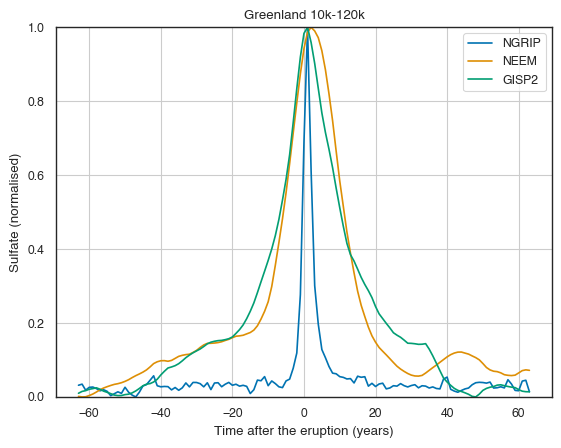

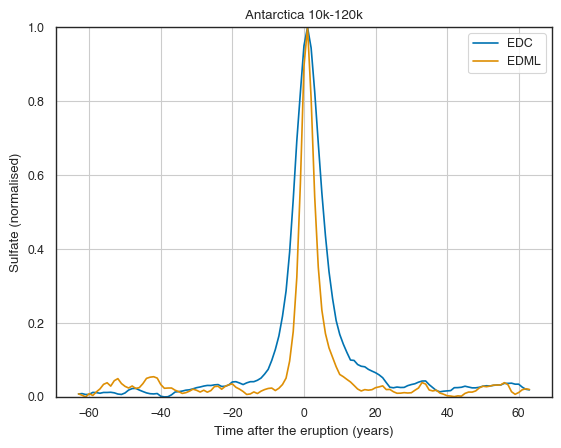

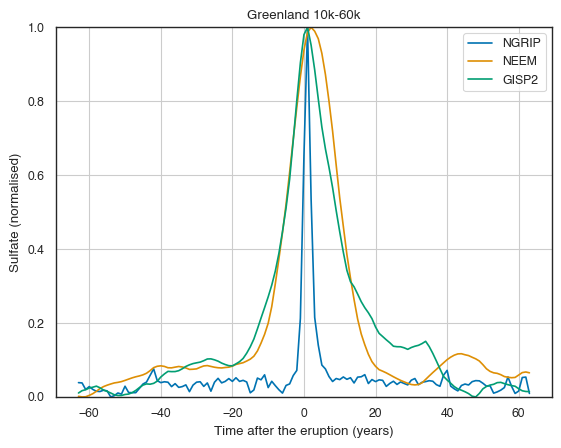

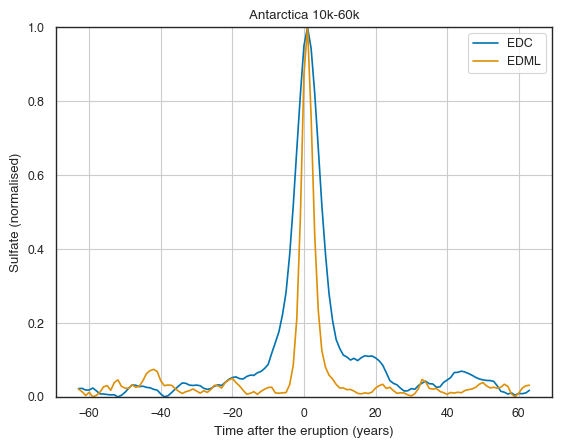

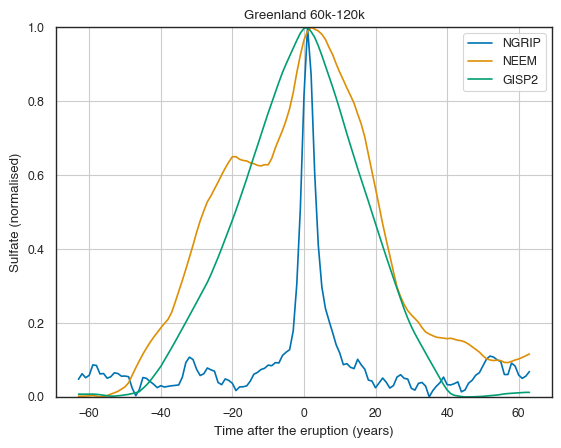

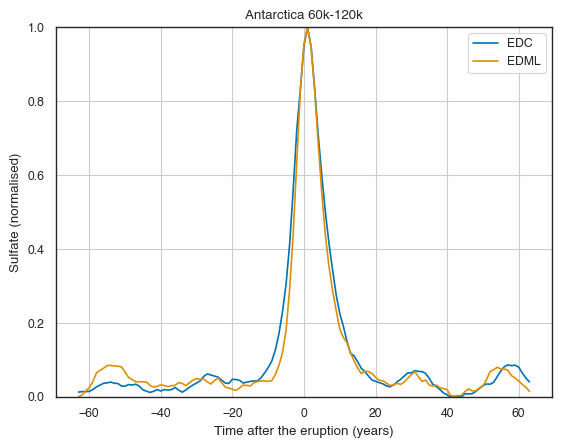

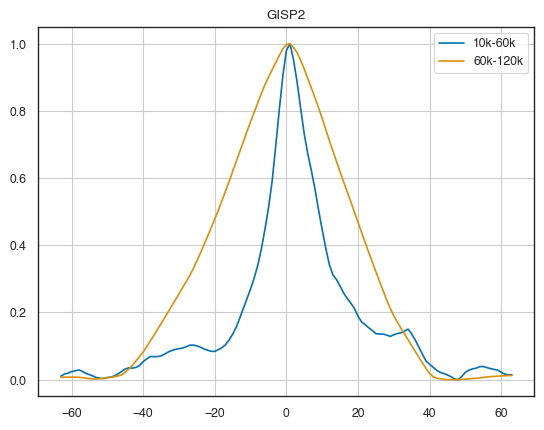

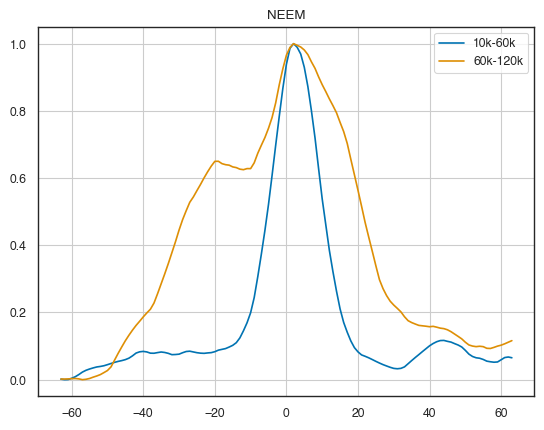

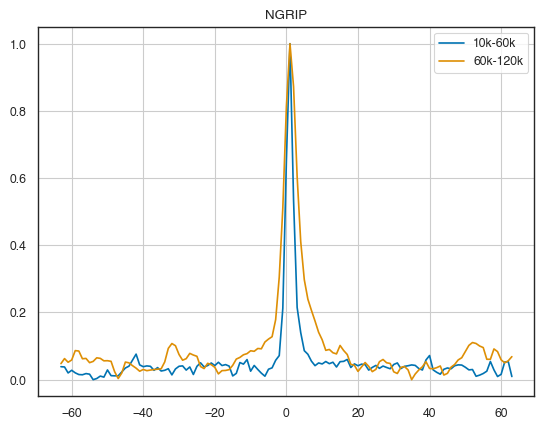

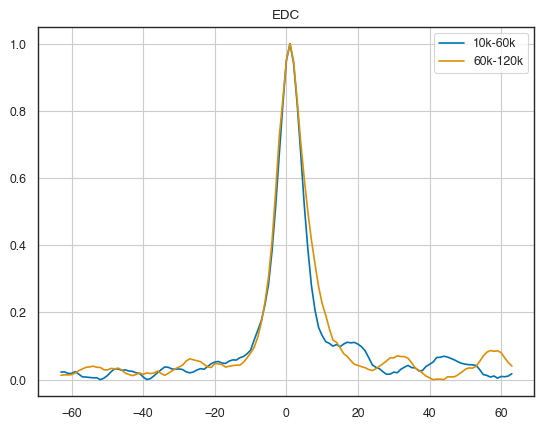

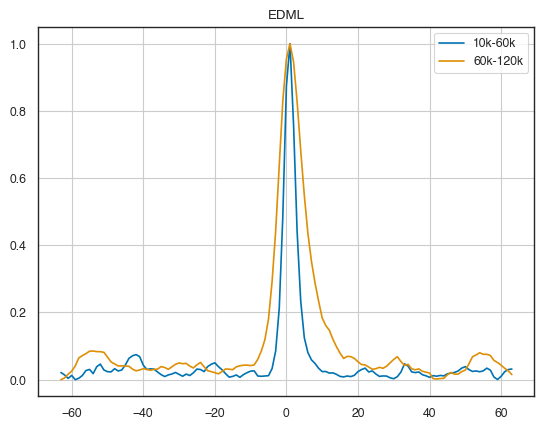

In [560]:
#%%capture
%matplotlib inline

def average_peak(depth_bp, age, age_annual, depth, sulfate, limit):
    '''
    Function that calculates the average of all sulfate peaks in one ice core. 
    input:
        depth_bp = array(m,). Array with all depths that we have been able to find sulfate peaks. 
        age = array(n,). Array with age values. 
        age_annual = array(k,). Array with the annual age values for an ice core. 
        depth = array(n,). Array with depth values.
        sulfate = array(n,). Array with sulfate values. 
        limit = float. How wide we want the average shape to be. (width=limit*2)
    output:
        avg_sulfate_norm = array (v,). Array with the normalised sulfate values for the average shape peak. 
        age_array_short = array (v,). Array with the age values for the averaged sulfate peak. 
    
    '''
    age_bp = np.interp(depth_bp, depth, age)
    sulfate_interp = np.interp(age_annual, age, sulfate) ##annual sulfate values
    sulfate_interp = np.array(sulfate_interp)
    sulfate_list = []

    ## Finding all sulfate peaks 
    for i in range(len(age_bp)):
        
        if age_bp[i] == np.nan:
            continue
        else:
            idx = np.where((age_annual > np.floor(age_bp[i]) - limit) & (age_annual < np.floor(age_bp[i]) + limit))
            age_array = age_annual[idx] #array with age values
            sulfate_array = sulfate_interp[idx] #array with sulfate values
            
            if len(age_array) != (limit*2) -1:
                continue
            else:
                sulfate_list.append(sulfate_array)
    
    ##normalising sulfate peak
    norm_sulfate = []
    
    for i in range(len(sulfate_list)):
        norm_sulfate.append(sulfate_list[i] - np.nanmin(sulfate_list[i])/ (np.nanmax(sulfate_list[i]) - np.nanmin(sulfate_list[i])) )
    
    sum_sulfate = np.nansum(norm_sulfate, axis=0)
    avg_sulfate = sum_sulfate / len(norm_sulfate)
    avg_sulfate_norm = (avg_sulfate - np.nanmin(avg_sulfate)) / (np.nanmax(avg_sulfate) - np.nanmin(avg_sulfate))
    age_array_short = np.arange(-(limit - 1), limit)
    
    return avg_sulfate_norm, age_array_short

##shifting NEEM depth a little bit 
NEEM_depth_shifted = NEEM_depth + 0.04

limit = 64

NGRIP_erup_all_RMAD[NGRIP_erup_all_RMAD==0]=np.nan
NEEM_erup_all_RMAD[NEEM_erup_all_RMAD==0]=np.nan
GISP2_erup_all_RMAD[GISP2_erup_all_RMAD==0]=np.nan
EDC_erup_all_RMAD[EDC_erup_all_RMAD==0]=np.nan
EDML_erup_all_RMAD[EDML_erup_all_RMAD==0]=np.nan

NGRIP_avg_sulf, NGRIP_avg_len = average_peak(depth_bp_NGRIP[np.isfinite(NGRIP_erup_all_RMAD[:,3])], NGRIP_age, NGRIP_annual_interp, NGRIP_depth, NGRIP_sulfate, limit )
NEEM_avg_sulf, NEEM_avg_len = average_peak(depth_bp_NEEM[np.isfinite(NEEM_erup_all_RMAD[:,3])], NEEM_age, NEEM_annual, NEEM_depth_shifted, NEEM_sulfate, limit )
GISP2_avg_sulf, GISP2_avg_len = average_peak(depth_bp_GISP2[np.isfinite(GISP2_erup_all_RMAD[:,3])], GISP2_age, GISP2_annual, GISP2_depth, GISP2_sulfate, limit )
EDC_avg_sulf, EDC_avg_len = average_peak(depth_bp_EDC[np.isfinite(EDC_erup_all_RMAD[:,3])], EDC_age, EDC_annual, EDC_depth, EDC_sulfate,limit )
EDML_avg_sulf, EDML_avg_len = average_peak(depth_bp_EDML[np.isfinite(EDML_erup_all_RMAD[:,3])], EDML_age, EDML_annual, EDML_depth, EDML_sulfate, limit )

NGRIP_avg_sulf_60, NGRIP_avg_len_60 = average_peak(depth_bp_NGRIP[np.isfinite(NGRIP_erup_all_RMAD[:,3])], NGRIP_age[NGRIP_age < 60*1e3], NGRIP_annual_interp[NGRIP_annual_interp < 60*1e3], NGRIP_depth[NGRIP_age < 60*1e3], NGRIP_sulfate[NGRIP_age < 60*1e3], limit )
NEEM_avg_sulf_60, NEEM_avg_len_60 = average_peak(depth_bp_NEEM[np.isfinite(NEEM_erup_all_RMAD[:,3])], NEEM_age[NEEM_age < 60*1e3], NEEM_annual[NEEM_annual < 60*1e3], NEEM_depth_shifted[NEEM_age < 60*1e3], NEEM_sulfate[NEEM_age < 60*1e3], limit )
GISP2_avg_sulf_60, GISP2_avg_len_60 = average_peak(depth_bp_GISP2[np.isfinite(GISP2_erup_all_RMAD[:,3])], GISP2_age[GISP2_age < 60*1e3], GISP2_annual[GISP2_annual < 60*1e3], GISP2_depth[GISP2_age < 60*1e3], GISP2_sulfate[GISP2_age < 60*1e3], limit )
EDC_avg_sulf_60, EDC_avg_len_60 = average_peak(depth_bp_EDC[np.isfinite(EDC_erup_all_RMAD[:,3])], EDC_age[EDC_age < 60*1e3], EDC_annual[EDC_annual < 60*1e3], EDC_depth[EDC_age < 60*1e3], EDC_sulfate[EDC_age < 60*1e3], limit )
EDML_avg_sulf_60, EDML_avg_len_60 = average_peak(depth_bp_EDML[np.isfinite(EDML_erup_all_RMAD[:,3])], EDML_age[EDML_age < 60*1e3], EDML_annual[EDML_annual< 60*1e3], EDML_depth[EDML_age < 60*1e3], EDML_sulfate[EDML_age < 60*1e3], limit )

NGRIP_avg_sulf_120, NGRIP_avg_len_120 = average_peak(depth_bp_NGRIP[np.isfinite(NGRIP_erup_all_RMAD[:,3])], NGRIP_age[NGRIP_age > 60*1e3], NGRIP_annual_interp[NGRIP_annual_interp > 60*1e3], NGRIP_depth[NGRIP_age > 60*1e3], NGRIP_sulfate[NGRIP_age > 60*1e3],limit )
NEEM_avg_sulf_120, NEEM_avg_len_120 = average_peak(depth_bp_NEEM[np.isfinite(NEEM_erup_all_RMAD[:,3])], NEEM_age[NEEM_age > 60*1e3], NEEM_annual[NEEM_annual > 60*1e3], NEEM_depth_shifted[NEEM_age > 60*1e3], NEEM_sulfate[NEEM_age > 60*1e3], limit )
GISP2_avg_sulf_120, GISP2_avg_len_120 = average_peak(depth_bp_GISP2[np.isfinite(GISP2_erup_all_RMAD[:,3])], GISP2_age[GISP2_age > 60*1e3], GISP2_annual[GISP2_annual > 60*1e3], GISP2_depth[GISP2_age > 60*1e3], GISP2_sulfate[GISP2_age > 60*1e3], limit )
EDC_avg_sulf_120, EDC_avg_len_120= average_peak(depth_bp_EDC[np.isfinite(EDC_erup_all_RMAD[:,3])], EDC_age[EDC_age > 60*1e3], EDC_annual[EDC_annual > 60*1e3], EDC_depth[EDC_age > 60*1e3], EDC_sulfate[EDC_age > 60*1e3], limit )
EDML_avg_sulf_120, EDML_avg_len_120 = average_peak(depth_bp_EDML[np.isfinite(EDML_erup_all_RMAD[:,3])], EDML_age[EDML_age > 60*1e3], EDML_annual[EDML_annual> 60*1e3], EDML_depth[EDML_age > 60*1e3], EDML_sulfate[EDML_age > 60*1e3], limit )

NGRIP_erup_all_RMAD[np.isnan(NGRIP_erup_all_RMAD)] = 0
NEEM_erup_all_RMAD[np.isnan(NEEM_erup_all_RMAD)] = 0
GISP2_erup_all_RMAD[np.isnan(GISP2_erup_all_RMAD)] = 0
EDC_erup_all_RMAD[np.isnan(EDC_erup_all_RMAD)] = 0
EDML_erup_all_RMAD[np.isnan(EDML_erup_all_RMAD)] = 0

plt.figure()
plt.plot(NGRIP_avg_len, NGRIP_avg_sulf, label = 'NGRIP')
plt.plot(NEEM_avg_len, NEEM_avg_sulf, label = 'NEEM')
plt.plot(GISP2_avg_len, GISP2_avg_sulf, label = 'GISP2')
plt.ylim(0,1)
plt.grid()
plt.ylabel('Sulfate (normalised)')
plt.xlabel('Time after the eruption (years)')
plt.title('Greenland 10k-120k')
#plt.xlim(-30,30)
plt.legend()

plt.figure()
plt.plot(EDC_avg_len, EDC_avg_sulf, label = 'EDC')
plt.plot(EDML_avg_len, EDML_avg_sulf, label = 'EDML')
plt.ylim(0,1)
plt.grid()
plt.ylabel('Sulfate (normalised)')
plt.xlabel('Time after the eruption (years)')
plt.title('Antarctica 10k-120k')
#plt.xlim(-30,30)
plt.legend()

plt.figure()
plt.plot(NGRIP_avg_len_60, NGRIP_avg_sulf_60, label = 'NGRIP')
plt.plot(NEEM_avg_len_60, NEEM_avg_sulf_60, label = 'NEEM')
plt.plot(GISP2_avg_len_60, GISP2_avg_sulf_60, label = 'GISP2')
plt.ylim(0,1)
plt.grid()
plt.ylabel('Sulfate (normalised)')
plt.xlabel('Time after the eruption (years)')
plt.title('Greenland 10k-60k')
#plt.xlim(-30,30)
plt.legend()

plt.figure()
plt.plot(EDC_avg_len_60, EDC_avg_sulf_60, label = 'EDC')
plt.plot(EDML_avg_len_60, EDML_avg_sulf_60, label = 'EDML')
plt.ylim(0,1)
plt.grid()
plt.ylabel('Sulfate (normalised)')
plt.xlabel('Time after the eruption (years)')
plt.title('Antarctica 10k-60k')
#plt.xlim(-30,30)
plt.legend()

plt.figure()
plt.plot(NGRIP_avg_len_120, NGRIP_avg_sulf_120, label = 'NGRIP')
plt.plot(NEEM_avg_len_120, NEEM_avg_sulf_120, label = 'NEEM')
plt.plot(GISP2_avg_len_120, GISP2_avg_sulf_120, label = 'GISP2')
plt.ylim(0,1)
plt.grid()
plt.ylabel('Sulfate (normalised)')
plt.xlabel('Time after the eruption (years)')
plt.title('Greenland 60k-120k')
#plt.xlim(-30,30)
plt.legend()

plt.figure()
plt.plot(EDC_avg_len_120, EDC_avg_sulf_120, label = 'EDC')
plt.plot(EDML_avg_len_120, EDML_avg_sulf_120, label = 'EDML')
plt.ylim(0,1)
plt.grid()
plt.ylabel('Sulfate (normalised)')
plt.xlabel('Time after the eruption (years)')
plt.title('Antarctica 60k-120k')
#plt.xlim(-30,30)
plt.legend()

plt.figure()
plt.plot(GISP2_avg_len_60, GISP2_avg_sulf_60, label= '10k-60k')
plt.plot(GISP2_avg_len_120, GISP2_avg_sulf_120, label='60k-120k')
plt.legend()
plt.title('GISP2')
plt.grid()
plt.show()

plt.figure()
plt.plot(NEEM_avg_len_60, NEEM_avg_sulf_60, label= '10k-60k')
plt.plot(NEEM_avg_len_120, NEEM_avg_sulf_120, label='60k-120k')
plt.legend()
plt.title('NEEM')
plt.grid()
plt.show()

plt.figure()
plt.plot(NGRIP_avg_len_60, NGRIP_avg_sulf_60, label= '10k-60k')
plt.plot(NGRIP_avg_len_120, NGRIP_avg_sulf_120, label='60k-120k')
plt.legend()
plt.title('NGRIP')
plt.grid()
plt.show()

plt.figure()
plt.plot(EDC_avg_len_60, EDC_avg_sulf_60, label= '10k-60k')
plt.plot(EDC_avg_len_120, EDC_avg_sulf_120, label='60k-120k')
plt.legend()
plt.title('EDC')
plt.grid()
plt.show()

plt.figure()
plt.plot(EDML_avg_len_60, EDML_avg_sulf_60, label= '10k-60k')
plt.plot(EDML_avg_len_120, EDML_avg_sulf_120, label='60k-120k')
plt.legend()
plt.title('EDML')
plt.grid()
plt.show()

## Function to find the eruptions that we 'gain' by lowering the volcanic threshold 

In [561]:
def eruptions_gained(depth,sulfate,depth_bp,erup, i, compared_to):
    '''
    Function that returns an array of new eruptions that can be found by the algorithm by changing the volcanic threshold.
    input:
        depth = array (n,). array with missing depth values (eruptions that the algorithm cannot find).
        sulfate = array (n,). array with missing sulfate peaks (eruptions that the algorithm cannot find).
        depth_bp = array (len(depth_bp_NGRIP)). array with bipolar match points (depth.)
        i = float. Index of the original threshold used. 
        compared_to = float. Index of the new threshold used. (compared_to < i)
    output: 
        gained = array (any,). array with the eruptions (depth) gained by lowering the threshold.
        where_sul = array (any,). array with the eruptions (sulfate peaks) gained by lowering the threshold.
    '''
    
    # sorting the original sulfate peaks 
    idx_arg = np.argsort(depth[:][i])
    depth_arg = depth[:][i][idx_arg]
    sulfate_arg = sulfate[:][i][idx_arg]
    
    #sorting the sulfate peaks when lowering the threshold 
    idx_org_arg = np.argsort(depth[:][compared_to])
    depth_org_arg = depth[:][compared_to][idx_org_arg]
    sulfate_org_arg = sulfate[:][i][idx_org_arg]

    #where the lists differ is the eruptions that we 'gained' by lowering the threshold. 
    gained = list(set(depth_arg).difference(depth_org_arg))
    where_sul = []
    
    #adding the corresponding sulfate peaks. 
    for i in range(len(gained)):
        idx = np.where(depth_bp == gained[i])
        where_sul.append(erup[:,compared_to][idx])
    
    return np.array(gained),  np.array(where_sul).reshape((len(gained),))

## finding the eruptions gained in the algorithm by lowering the threshold form 3*RMAD to 2*RMAD
## I know I confuese 'gained' and 'lost' here, they are the same thing, depending how you look at it ... 
## either lost by increaseing the volcanic threshold or gained by lowering the volcanic threshold ... 

no = 5
compared_to = 3

depths_lost_NGRIP, eruptions_lost_NGRIP = eruptions_gained(missing_NGRIP_depth, missing_NGRIP_eruptions,depth_bp_NGRIP, NGRIP_erup_all_RMAD, no, compared_to)
depths_lost_NEEM, eruptions_lost_NEEM = eruptions_gained(missing_NEEM_depth, missing_NEEM_eruptions,depth_bp_NEEM, NEEM_erup_all_RMAD, no, compared_to)
depths_lost_GISP2, eruptions_lost_GISP2 = eruptions_gained(missing_GISP2_depth, missing_GISP2_eruptions,depth_bp_GISP2, GISP2_erup_all_RMAD, no, compared_to)
depths_lost_EDC, eruptions_lost_EDC = eruptions_gained(missing_EDC_depth, missing_EDC_eruptions,depth_bp_EDC, EDC_erup_all_RMAD, no, compared_to)
depths_lost_EDML, eruptions_lost_EDML = eruptions_gained(missing_EDML_depth, missing_EDML_eruptions,depth_bp_EDML, EDML_erup_all_RMAD, no, compared_to)

#storing the arrays 
%store depths_lost_NGRIP
%store depths_lost_NEEM

#table with the eruptions gained 
limit = 0

table = zip_longest(depths_lost_NGRIP[eruptions_lost_NGRIP>limit], eruptions_lost_NGRIP[eruptions_lost_NGRIP>limit], depths_lost_NEEM[eruptions_lost_NEEM>limit], 
                    eruptions_lost_NEEM[eruptions_lost_NEEM>limit],depths_lost_GISP2[eruptions_lost_GISP2>limit], eruptions_lost_GISP2[eruptions_lost_GISP2>limit], 
                    depths_lost_EDC[eruptions_lost_EDC>limit], eruptions_lost_EDC[eruptions_lost_EDC>limit],depths_lost_EDML[eruptions_lost_EDML>limit], eruptions_lost_EDML[eruptions_lost_EDML>limit])
            

print(tabulate(table, headers=['Depth gained NGRIP', 'Corresponding sulfate NGRIP', 'Depth gained NEEM', 'Corresponding sulfate NEEM', 'Depth gained GISP2', 'Corresponding sulfate GISP2', 'Depth gained EDC', 'Corresponding sulfate EDC', 'Depth gained EDML', 'Corresponding sulfate EDML']))

Stored 'depths_lost_NGRIP' (ndarray)
Stored 'depths_lost_NEEM' (ndarray)
Depth gained NGRIP    Corresponding sulfate NGRIP      Depth gained NEEM    Corresponding sulfate NEEM    Depth gained GISP2    Corresponding sulfate GISP2    Depth gained EDC    Corresponding sulfate EDC    Depth gained EDML    Corresponding sulfate EDML
--------------------  -----------------------------  -------------------  ----------------------------  --------------------  -----------------------------  ------------------  ---------------------------  -------------------  ----------------------------
                                                                 1527.45                       56.3239               2317.11                        74.2589             514.772                     11.8294               896.6                         4.28569
                                                                 1688.83                       56.685                2125.72                        14.2631    

## Correlation to previous results and Jiameis (Lin et al. (2022)) results 

In [562]:
def compare_to_JL(depth_bp, JL_d, JL_s,limit):
    '''
    Function that finds the similar eruptions found by Lin et al. (2022)
    input:
        depth_bp = array (len(depth_bp_NGRIP,)). arrays with the bipolar match points. 
        JL_d = array (n,). array with the depths for the eruptions found by Lin et al. (2022).
        JL_s = array (n,). array with the sulfate peaks for the eruptions found by Lin et al. (2022).
        limit = float. the maximum distance between depth_bp and JL_d. 
    output:
        compare_JL_s = array (m,). arrays with eruptions (sulfate deposition) that also was found by Lin et al. (2022).
        compare_JL_d = array (m,). arrays with eruptions (depth) that also was found by Lin et al. (2022).
    '''
    idx_max =  np.where(depth_bp_NGRIP >= NGRIP_depth[NGRIP_age >= 60e3][0])[0][0] ##indexing before 60k since Lin et al. (2022) does not go further.
    compare_JL_s = np.zeros(len(depth_bp[:idx_max]), dtype='object')
    compare_JL_d = np.zeros(len(depth_bp[:idx_max]), dtype='object')
    for i in range(len(depth_bp[:idx_max])):
        idx = np.where( np.abs(depth_bp[i] - JL_d) < limit) #where the depths are close enough to be comparable
        if len(JL_s[idx[0]]) == 0: #if arrays is zero there is nowhere they are comparable. 
            compare_JL_s[i] = np.array([0])
            compare_JL_d[i] = np.array([0])
        else:
            if len(JL_s[idx[0]]) > 1: #if len of index > 1 then we choose the depth that is closest to the bipolar match point. 
                sub = np.abs(JL_d[idx] - depth_bp[i])
                sub_min = np.nanmin(sub)
                idx_min = np.where(sub == sub_min)[0]
                compare_JL_s[i] = [JL_s[idx[0][idx_min[0]]]]
                compare_JL_d[i] = [JL_d[idx[0][idx_min[0]]]]
            else: #if there is only one comparable index we compare to that one. 
                compare_JL_s[i] = JL_s[idx]
                compare_JL_d[i] = JL_d[idx]     
    # concatenate the arrays. 
    compare_JL_s = np.concatenate(compare_JL_s).ravel()
    compare_JL_d = np.concatenate(compare_JL_d).ravel()
    return np.array(compare_JL_s, dtype='float64'), np.array(compare_JL_d, dtype='float64')

## finding the comparable sulfate depositions to Jiamei et al. (2022)
NGRIP_JL_s, NGRIP_JL_d = compare_to_JL(depth_bp_NGRIP, JL_paper_d_NGRIP, JL_paper_s_NGRIP, 0.5)
NEEM_JL_s, NEEM_JL_d = compare_to_JL(depth_bp_NEEM, JL_paper_d_NEEM, JL_paper_s_NEEM, 0.5)
GISP2_JL_s, GISP2_JL_d = compare_to_JL(depth_bp_GISP2, JL_paper_d_GISP2, JL_paper_s_GISP2, .5)
EDC_JL_s, EDC_JL_d = compare_to_JL(depth_bp_EDC, JL_paper_d_EDC, JL_paper_s_EDC, .5)
EDML_JL_s, EDML_JL_d = compare_to_JL(depth_bp_EDML, JL_paper_d_EDML, JL_paper_s_EDML, 0.5)

In [563]:
def corr_rsq_me(results_threshold, results_original):
    '''
    Function that calculates the correlation for sulfate deposition found by using different volcanic thresholds and 3*RMAD. 
    input:
        results_threshold = array (n,). Results found by using different thresholds.
        results_original = array (n,). Results found by using the original threshold of 3*RMAD. 
    output:
        corr_me = array (8,). Correlation between using the different volcanic thresholds.
        rsq_me = array (8,). Coefficient of determination between using the different volcanic thresholds.
    
    '''
    corr_me = np.zeros(len(results_threshold[0,:]))
    rsq_me = np.zeros(len(results_threshold[0,:]))

    for i in range(len(corr_me)):
        corr_me[i] = pearsonr(results_threshold[:,i],  results_original)[0]
        model = LinearRegression().fit(results_threshold[:,i].reshape((-1,1)),  results_original.reshape((-1,1)))
        r_sq = model.score(results_threshold[:,i].reshape((-1,1)),  results_original.reshape((-1,1)))
        rsq_me[i] = r_sq

    return corr_me, rsq_me

# calculating the correlation and coefficient of determination. 
corr_me_NGRIP, rsq_me_NGRIP = corr_rsq_me(NGRIP_erup_all_RMAD, NGRIP_erup)
corr_me_NEEM, rsq_me_NEEM = corr_rsq_me(NEEM_erup_all_RMAD, NEEM_erup)
corr_me_GISP2, rsq_me_GISP2 = corr_rsq_me(GISP2_erup_all_RMAD, GISP2_erup)
corr_me_EDML, rsq_me_EDML = corr_rsq_me(EDML_erup_all_RMAD, EDML_erup)
corr_me_EDC, rsq_me_EDC = corr_rsq_me(EDC_erup_all_RMAD, EDC_erup)

def corr_rsq_jiamei(results_threshold, results_jiamei):
    '''
    Function that calculates the correlation for sulfate deposition found by using different volcanic thresholds and the results found by Lin et al. (2022). 
    input:
        results_threshold = array (n,). Results found by using different thresholds.
        results_jiamei = array (n,). Results found by Lin et al. (2022). 
    output:
        corr_me = array (8,). Correlation between using the different volcanic thresholds and Lin et al. (2022).
        rsq_me = array (8,). Coefficient of determination between using the different volcanic thresholds and Lin et al. (2022).
    
    '''
    
    corr_jiamei = np.zeros(len(results_threshold[0,:]))
    rsq_jiamei = np.zeros(len(results_threshold[0,:]))

    for i in range(len(corr_jiamei)):
        corr_jiamei[i] = pearsonr(results_threshold[:,i][:len(results_jiamei)], results_jiamei)[0]
        model = LinearRegression().fit(results_threshold[:,i][:len(results_jiamei)].reshape((-1,1)), results_jiamei.reshape((-1,1)))
        r_sq = model.score(results_threshold[:,i][:len(results_jiamei)].reshape((-1,1)), results_jiamei.reshape((-1,1)))
        rsq_jiamei[i] = r_sq
    
    return corr_jiamei, rsq_jiamei

## calculating the correlation and coefficient of determination.
corr_jiamei_NGRIP, rsq_jiamei_NGRIP = corr_rsq_jiamei(NGRIP_erup_all_RMAD, NGRIP_JL_s)
corr_jiamei_NEEM, rsq_jiamei_NEEM = corr_rsq_jiamei(NEEM_erup_all_RMAD, NEEM_JL_s)
corr_jiamei_GISP2, rsq_jiamei_GISP2 = corr_rsq_jiamei(GISP2_erup_all_RMAD, GISP2_JL_s)
corr_jiamei_EDML, rsq_jiamei_EDML = corr_rsq_jiamei(EDML_erup_all_RMAD, EDML_JL_s)
corr_jiamei_EDC, rsq_jiamei_EDC = corr_rsq_jiamei(EDC_erup_all_RMAD, EDC_JL_s)

### Showing the results from above in tables. 

In [564]:
print('NGRIP')
headers = ['RMAD', 'Number missing', 'Percent Missing', 'No. eruptions', 'Corr me', 'Corr Jiamei', 'rsq me', 'rsq Jiamei']
table = zip_longest(threshold, no_missing_NGRIP, perc_missing_NGRIP, np.ones(len(threshold))*len(depth_bp_NGRIP[~np.isnan(depth_bp_NGRIP)]),corr_me_NGRIP, corr_jiamei_NGRIP, rsq_me_NGRIP, rsq_jiamei_NGRIP)
print(tabulate(table, headers=headers))

NGRIP
  RMAD    Number missing    Percent Missing    No. eruptions    Corr me    Corr Jiamei    rsq me    rsq Jiamei
------  ----------------  -----------------  ---------------  ---------  -------------  --------  ------------
   0.5                14            5.55556              252   0.988539       0.949313  0.977209      0.901195
   1                  14            5.55556              252   0.989374       0.949958  0.97886       0.90242
   1.5                14            5.55556              252   0.990603       0.951515  0.981295      0.90538
   2                  14            5.55556              252   0.990944       0.951093  0.981971      0.904578
   2.5                14            5.55556              252   0.991337       0.951554  0.98275       0.905454
   3                  14            5.55556              252   0.991461       0.951462  0.982995      0.905279
   3.5                14            5.55556              252   0.991372       0.951415  0.982818      0.9051

In [565]:
print('NEEM')
headers = ['RMAD', 'Number missing', 'Percent Missing', 'No. eruptions', 'Corr me', 'Corr Jiamei', 'rsq me', 'rsq Jiamei']
table = zip_longest(threshold, no_missing_NEEM, perc_missing_NEEM, np.ones(len(threshold))*len(depth_bp_NEEM[~np.isnan(depth_bp_NEEM)]),corr_me_NEEM, corr_jiamei_NEEM, rsq_me_NEEM, rsq_jiamei_NEEM)
print(tabulate(table, headers=headers))

NEEM
  RMAD    Number missing    Percent Missing    No. eruptions    Corr me    Corr Jiamei    rsq me    rsq Jiamei
------  ----------------  -----------------  ---------------  ---------  -------------  --------  ------------
   0.5                14            10.5263              133   0.817398       0.852327  0.668139      0.726461
   1                  26            19.5489              133   0.908822       0.889703  0.825957      0.791572
   1.5                35            26.3158              133   0.96128        0.925658  0.92406       0.856844
   2                  42            31.5789              133   0.974748       0.94437   0.950134      0.891835
   2.5                50            37.594               133   0.988223       0.948166  0.976585      0.89902
   3                  60            45.1128              133   1              0.947162  1             0.897116
   3.5                66            49.6241              133   0.99318        0.954967  0.986407      0.9119

In [566]:
print('GISP2')
headers = ['RMAD', 'Number missing', 'Percent Missing', 'No. eruptions', 'Corr me', 'Corr Jiamei', 'rsq me', 'rsq Jiamei']
table = zip_longest(threshold, no_missing_GISP2, perc_missing_GISP2, np.ones(len(threshold))*len(depth_bp_GISP2[~np.isnan(depth_bp_GISP2)]),corr_me_GISP2, corr_jiamei_GISP2, rsq_me_GISP2, rsq_jiamei_GISP2)
print(tabulate(table, headers=headers))

GISP2
  RMAD    Number missing    Percent Missing    No. eruptions    Corr me    Corr Jiamei    rsq me    rsq Jiamei
------  ----------------  -----------------  ---------------  ---------  -------------  --------  ------------
   0.5                10            8.19672              122   0.87633        0.740846  0.767955      0.548852
   1                  11            9.01639              122   0.945486       0.827784  0.893943      0.685227
   1.5                14           11.4754               122   0.977189       0.904329  0.954899      0.817811
   2                  19           15.5738               122   0.986999       0.895219  0.974167      0.801418
   2.5                26           21.3115               122   0.994337       0.909015  0.988706      0.826309
   3                  31           25.4098               122   1              0.930136  1             0.865152
   3.5                33           27.0492               122   0.997415       0.930842  0.994836      0.86

In [567]:
print('EDML')
headers = ['RMAD', 'Number missing', 'Percent Missing', 'No. eruptions', 'Corr me', 'Corr Jiamei', 'rsq me', 'rsq Jiamei']
table = zip_longest(threshold, no_missing_EDML, perc_missing_EDML, np.ones(len(threshold))*len(depth_bp_EDML[~np.isnan(depth_bp_EDML)]),corr_me_EDML, corr_jiamei_EDML, rsq_me_EDML, rsq_jiamei_EDML)
print(tabulate(table, headers=headers))

EDML
  RMAD    Number missing    Percent Missing    No. eruptions    Corr me    Corr Jiamei    rsq me    rsq Jiamei
------  ----------------  -----------------  ---------------  ---------  -------------  --------  ------------
   0.5                 7            2.77778              252   0.972175       0.957514  0.945125      0.916833
   1                   8            3.1746               252   0.983472       0.961974  0.967218      0.925395
   1.5                11            4.36508              252   0.988699       0.969995  0.977526      0.940889
   2                  14            5.55556              252   0.989425       0.971082  0.978962      0.942999
   2.5                21            8.33333              252   0.999039       0.966717  0.998079      0.934542
   3                  26           10.3175               252   1              0.970609  1             0.942081
   3.5                32           12.6984               252   0.997679       0.969006  0.995363      0.938

In [568]:

print('EDC')
headers = ['RMAD', 'Number missing', 'Percent Missing', 'No. eruptions', 'Corr me', 'Corr Jiamei', 'rsq me', 'rsq Jiamei']
table = zip_longest(threshold, no_missing_EDC, perc_missing_EDC, np.ones(len(threshold))*len(depth_bp_EDC[~np.isnan(depth_bp_EDC)]),corr_me_EDC, corr_jiamei_EDC, rsq_me_EDC, rsq_jiamei_EDC)
print(tabulate(table, headers=headers))

EDC
  RMAD    Number missing    Percent Missing    No. eruptions    Corr me    Corr Jiamei    rsq me    rsq Jiamei
------  ----------------  -----------------  ---------------  ---------  -------------  --------  ------------
   0.5                 9            3.94737              228   0.942831       0.831366  0.888931      0.691169
   1                  12            5.26316              228   0.985183       0.806044  0.970585      0.649707
   1.5                18            7.89474              228   0.988939       0.796678  0.978         0.634695
   2                  23           10.0877               228   0.993715       0.794626  0.987469      0.63143
   2.5                28           12.2807               228   0.998538       0.796519  0.997079      0.634443
   3                  35           15.3509               228   1              0.803635  1             0.645829
   3.5                47           20.614                228   0.997331       0.804993  0.994669      0.64801

## Making a list of the largest eruptions, calculating average sulfate deposition, and atmospheric aerosol loading. 

In [569]:
## Greenland 

def average_greenland(NGRIP_erup_all_RMAD,NEEM_erup_all_RMAD, GISP2_erup_all_RMAD, no):
    '''
    Function that calculates the average sulfate deposition in Greenland. 
    input:
        NGRIP_erup_all_RMAD = array (n,). array with sulfate deposition for NGRIP.
        NEEM_erup_all_RMAD = array (n,). array with sulfate deposition for NEEM.
        GISP2_erup_all_RMAD = array (n,). array with sulfate deposition for GISP2. 
        no = float. For the volcanic threshold we want to use. 
    output:
        age_Greenland = array (n,). array with the age of the average sulfate deposition in Greenland. 
        dep_Greenland = array(n,). array with the average sulfate deposition in Greenland. 
        np_cores = array (n,). array with the number of cores the average is counted in. 
    '''
    age_Greenland = []
    dep_Greenland = []
    no_cores = []
    
    std_Greenland = []
   

    for i in range(len(depth_bp_NGRIP)):
            
        if (NGRIP_erup_all_RMAD[:,no][i] != 0) & (GISP2_erup_all_RMAD[:,no][i] == 0) & (NEEM_erup_all_RMAD[:,no][i] == 0):
            age_Greenland.append(age_bp_NGRIP[i])
            dep_Greenland.append( NGRIP_erup_all_RMAD[:,no][i] )
            no_cores.append(1)
            std_Greenland.append(std_NGRIP[i])
            
        elif (GISP2_erup_all_RMAD[:,no][i] != 0) & (NGRIP_erup_all_RMAD[:,no][i] == 0) & (NEEM_erup_all_RMAD[:,no][i] == 0):
            age_Greenland.append(age_bp_GISP2[i])
            dep_Greenland.append(GISP2_erup_all_RMAD[:,no][i])
            no_cores.append(1)
            std_Greenland.append(std_GISP2[i])
            
        elif (NEEM_erup_all_RMAD[:,no][i] != 0) & (GISP2_erup_all_RMAD[:,no][i] == 0) & (NGRIP_erup_all_RMAD[:,no][i] == 0):
            age_Greenland.append(age_bp_NEEM[i])
            dep_Greenland.append(NEEM_erup_all_RMAD[:,no][i])
            no_cores.append(1)
            std_Greenland.append(std_NEEM[i])
            
        elif (NGRIP_erup_all_RMAD[:,no][i] != 0) & (GISP2_erup_all_RMAD[:,no][i] != 0) & (NEEM_erup_all_RMAD[:,no][i] == 0):
            age_Greenland.append(age_bp_NGRIP[i])
            dep_Greenland.append((NGRIP_erup_all_RMAD[:,no][i] + GISP2_erup_all_RMAD[:,no][i]) / 2 )
            no_cores.append(2)
            std_Greenland.append( np.sqrt( (std_NGRIP[i]/2)**2 + (std_GISP2[i]/2)**2 ) )
            
        elif (NGRIP_erup_all_RMAD[:,no][i] != 0) & (NEEM_erup_all_RMAD[:,no][i] != 0) & (GISP2_erup_all_RMAD[:,no][i] == 0):
            age_Greenland.append(age_bp_NGRIP[i])
            dep_Greenland.append((NGRIP_erup_all_RMAD[:,no][i] + NEEM_erup_all_RMAD[:,no][i] ) / 2 )
            no_cores.append(2)
            std_Greenland.append( np.sqrt ((std_NGRIP[i]/2)**2 + (std_NEEM[i]/2)**2)  )
        
        elif (NEEM_erup_all_RMAD[:,no][i] != 0) & (GISP2_erup_all_RMAD[:,no][i] != 0) & (NGRIP_erup_all_RMAD[:,no][i] == 0):
            age_Greenland.append(age_bp_GISP2[i])
            dep_Greenland.append((NEEM_erup_all_RMAD[:,no][i]+ GISP2_erup_all_RMAD[:,no][i]) / 2 )
            no_cores.append(2)
            std_Greenland.append( np.sqrt( (std_NEEM[i]/2)**2 + (std_GISP2[i]/2)**2) )
            
        elif (NGRIP_erup_all_RMAD[:,no][i] != 0) & (GISP2_erup_all_RMAD[:,no][i] != 0) & (NEEM_erup_all_RMAD[:,no][i] != 0):
            age_Greenland.append(age_bp_NGRIP[i])
            dep_Greenland.append((NGRIP_erup_all_RMAD[:,no][i] + GISP2_erup_all_RMAD[:,no][i] + NEEM_erup_all_RMAD[:,no][i]) / 3 )
            no_cores.append(3)
            std_Greenland.append( np.sqrt(( std_NGRIP[i]/3)**2 + (std_GISP2[i]/3)**2 + (std_NEEM[i]/3)**2)    ) 
            
        else:
            age_Greenland.append(np.nan)
            dep_Greenland.append(np.nan)
            no_cores.append(np.nan)
            std_Greenland.append(np.nan)
            
            continue
    
    return  np.array(age_Greenland), np.array(dep_Greenland), np.array(no_cores), np.array(std_Greenland)

def average_antarctica(EDC_erup_all_RMAD, EDML_erup_all_RMAD, no):
    '''
    Function that calculates the average sulfate deposition in Antarctica. 
    input:
        EDC_erup_all_RMAD = array (n,). array with sulfate deposition for EDC.
        EDML_erup_all_RMAD = array (n,). array with sulfate deposition for EDML.
        no = float. For the volcanic threshold we want to use. 
    output:
        age_Antarctica = array (n,). array with the age of the average sulfate deposition in Antarctica. 
        dep_Antarctica = array(n,). array with the average sulfate deposition in Antarctica. 
        np_cores = array (n,). array with the number of cores the average is counted in. 
    '''
    
    age_Antarctica = []
    dep_Antarctica = []
    no_cores = []
    
    std_Antarctica = []
    
    s = 0

    for i in range(len(depth_bp_EDC)):
        
        if (EDC_erup_all_RMAD[:,no][i] != 0) & (EDML_erup_all_RMAD[:,no][i] == 0):
    
            if np.isnan(age_bp_EDML[i]):
                age_Antarctica.append(age_bp_EDC[i])
                dep_Antarctica.append(EDC_erup_all_RMAD[:,no][i])
                no_cores.append(1)
                std_Antarctica.append(std_EDC[i])
            else:
                age_Antarctica.append(age_bp_EDML[i])
                dep_Antarctica.append(EDC_erup_all_RMAD[:,no][i])
                no_cores.append(1)
                std_Antarctica.append(std_EDC[i])
            
        elif (EDC_erup_all_RMAD[:,no][i] == 0) & (EDML_erup_all_RMAD[:,no][i] != 0):
     
            age_Antarctica.append(age_bp_EDML[i])
            dep_Antarctica.append(EDML_erup_all_RMAD[:,no][i])
            no_cores.append(1)
            std_Antarctica.append(std_EDML[i])
            
        elif (EDC_erup_all_RMAD[:,no][i] != 0) & (EDML_erup_all_RMAD[:,no][i] != 0):
        
            age_Antarctica.append(age_bp_EDML[i])
            dep_Antarctica.append( (EDC_erup_all_RMAD[:,no][i] + EDML_erup_all_RMAD[:,no][i] ) / 2)
            no_cores.append(2)
            std_Antarctica.append( np.sqrt(((std_EDC[i]/2)**2 + (std_EDML[i]/2)**2)))
            
        else:
           
            age_Antarctica.append(np.nan)
            dep_Antarctica.append(np.nan)
            no_cores.append(np.nan)
            std_Antarctica.append(np.nan)
            #s += 1
            #print(s, EDC_erup_all_RMAD[:,no][i], EDML_erup_all_RMAD[:,no][i])
            continue
        
    return np.array(age_Antarctica), np.array(dep_Antarctica), np.array(no_cores), np.array(std_Antarctica)
        

no = 3

age_Greenland, dep_Greenland, no_cores_G, std_Greenland = average_greenland(NGRIP_erup_all_RMAD,NEEM_erup_all_RMAD, GISP2_erup_all_RMAD, no)

idx_G = np.argsort(dep_Greenland) #sorting from smallest to largest eruptions 
dep_Greenland_sort = dep_Greenland[idx_G]
age_Greenland_sort = age_Greenland[idx_G]

age_Antarctica, dep_Antarctica, no_cores_A , std_Antarctica= average_antarctica(EDC_erup_all_RMAD, EDML_erup_all_RMAD, no)

idx_A = np.argsort(dep_Antarctica)  #sorting from smallest to largest eruptions 
dep_Antarctica_sort = dep_Antarctica[idx_A]
age_Antarctica_sort = age_Antarctica[idx_A]

#table from smallest to largest eruptions in Greenland and Antarctica
table = zip_longest(age_Greenland, dep_Greenland, std_Greenland, no_cores_G, age_Antarctica, dep_Antarctica, std_Antarctica, no_cores_A)
print(tabulate(table, headers=['Greenland Year', 'Greenland Deposition', 'Std Greenland', 'No cores G', 'Antarctica Year', 'Antarcica Deposition', 'Std Antarctica', 'No cores A']))


  Greenland Year    Greenland Deposition    Std Greenland    No cores G    Antarctica Year    Antarcica Deposition    Std Antarctica    No cores A
----------------  ----------------------  ---------------  ------------  -----------------  ----------------------  ----------------  ------------
         12170.4               250.548           34.791               3            12170.3                 7.32012          1.63683              1
         12240.7                65.6447          10.5404              2            12240.5                22.2226           4.96913              1
         12754.8               155.026           26.5135              2            12754.6                 8.32014          1.61916              2
         12917.3               247.023           32.7789              3            12917.1                36.2521           5.73208              2
         12961.3                49.5672          11.0836              1            12961                   4.3289     

In [570]:

## Here is the list for all bipolar eruptions that can be found by the algorithm 
bipolar_age = []
bipolar_age2 = []
bp_Greenland_dep = [] 
bp_Antarctica_dep = []
bp_no_cores_G = []
bp_no_cores_A = [] 
bp_std_Greenland = []
bp_std_Antarctica = []

for i in range(len(age_Antarctica)):
    if np.isfinite(age_Antarctica[i]) & np.isnan(age_Greenland[i]):
        continue
    elif np.isnan(age_Antarctica[i]) & np.isfinite(age_Greenland[i]):
        continue
    elif np.isfinite(age_Antarctica[i]) & np.isfinite(age_Greenland[i]):
        bipolar_age.append(age_Greenland[i])
        bipolar_age2.append(age_Antarctica[i])
        bp_Greenland_dep.append(dep_Greenland[i])
        bp_Antarctica_dep.append(dep_Antarctica[i])
        bp_no_cores_G.append(no_cores_G[i])
        bp_no_cores_A.append(no_cores_A[i])
        bp_std_Greenland.append(std_Greenland[i])
        bp_std_Antarctica.append(std_Antarctica[i])
        
idx_sort = np.argsort(bp_Greenland_dep)

print(type(bp_Greenland_dep))

bp_Greenland_dep = dtype_float64(bp_Greenland_dep)
bp_Antarctica_dep = dtype_float64(bp_Antarctica_dep)
bipolar_age = dtype_float64(bipolar_age)
bipolar_age2 = dtype_float64(bipolar_age2)
bp_no_cores_A = dtype_float64(bp_no_cores_A)
bp_no_cores_G = dtype_float64(bp_no_cores_G)
bp_std_Antarctica = dtype_float64(bp_std_Antarctica)
bp_std_Greenland = dtype_float64(bp_std_Greenland)

        
table = zip_longest(np.array(bipolar_age), np.array(bipolar_age2), np.array(bp_Greenland_dep), np.array(bp_Antarctica_dep), bp_no_cores_G, bp_no_cores_A)

print(tabulate(table, headers = ['age greenland', 'age antarctica', 'dep greenland', 'dep antarctica', 'no cores G', 'no cores A']))
        

<class 'list'>
  age greenland    age antarctica    dep greenland    dep antarctica    no cores G    no cores A
---------------  ----------------  ---------------  ----------------  ------------  ------------
        12170.4           12170.3        250.548             7.32012             3             1
        12240.7           12240.5         65.6447           22.2226              2             1
        12754.8           12754.6        155.026             8.32014             2             2
        12917.3           12917.1        247.023            36.2521              3             2
        12961.3           12961           49.5672            4.3289              1             2
        12995.1           12994.4         45.3925           14.8903              2             2
        13028.2           13027.9        280.103            54.4738              3             2
        13211.8           13211.5         36.7621           22.1367              2             2
        13620.4

### Millenial frequency of the eruptions 

<Figure size 640x480 with 0 Axes>

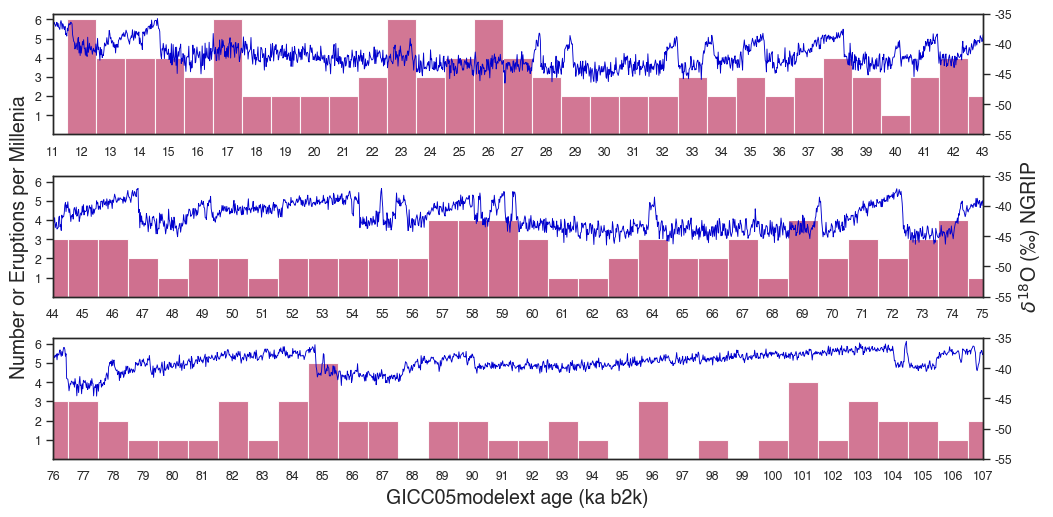

In [571]:
%matplotlib inline
## Here I count how many bipolar eruptions that occur per millenia.
k_years = np.arange(11*1e3, 109*1e3, 1e3) ## List with age every 1000k years
k_erup = np.zeros(len(k_years))
lim_NGRIP = np.where( (NGRIP_dO18_age > k_years[0]) & (NGRIP_dO18_age < k_years[-1]) )

plt.figure()
for i in range(len(k_years)-1):
    idx = np.where( (bipolar_age > k_years[i]) & (bipolar_age < k_years[i+1]) )
    k_erup[i] = len(idx[0])
    
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,5))
fig.tight_layout(pad=1)
ax11 = ax1.twinx()
ax1.bar(k_years, k_erup, width=1000, color='#CD6889', alpha=.9)
ax11.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c='#0000CD')
ax1.set_xticks(k_years, (k_years/1e3).astype(int) , rotation=0)
ax1.set_xlim(11*1e3,43*1e3)
#ax1.set_ylabel('Number or Eruptions')
#ax11.set_ylabel('$\delta^{18}$O (‰) NGRIP')
ax11.set_ylim(-55,-35)
ax11.set_yticks([-55, -50, -45, -40, -35], [-55, -50, -45, -40, -35])
ax1.set_yticks([1,2,3,4,5,6], [1,2,3,4,5,6])

ax22 = ax2.twinx()
ax2.bar(k_years, k_erup, width=1000, color='#CD6889', alpha=.95)
ax22.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c='#0000CD')
ax2.set_xticks(k_years, (k_years/1e3).astype(int) , rotation=0)
ax2.set_xlim(44*1e3,75*1e3)
ax2.set_ylabel('Number or Eruptions per Millenia', fontsize=14)
ax22.set_ylabel('$\delta^{18}$O (‰) NGRIP', fontsize=14)
ax22.set_ylim(-55,-35)
ax22.set_yticks([-55, -50, -45, -40, -35], [-55, -50, -45, -40, -35])
ax2.set_yticks([1,2,3,4,5,6], [1,2,3,4,5,6])

ax33 = ax3.twinx()
ax3.bar(k_years, k_erup, width=1000, color='#CD6889', alpha=.9)
ax33.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c='#0000CD')
ax3.set_xticks(k_years, (k_years/1e3).astype(int) , rotation=0)
ax3.set_xlim(76*1e3,107*1e3)
ax3.set_xlabel('GICC05modelext age (ka b2k)', fontsize=14)
#ax3.set_ylabel('Number or Eruptions')
#ax33.set_ylabel('$\delta^{18}$O (‰) NGRIP')
ax33.set_ylim(-55,-35)
ax33.set_yticks([-55, -50, -45, -40, -35], [-55, -50, -45, -40, -35])
ax3.set_yticks([1,2,3,4,5,6], [1,2,3,4,5,6])

plt.savefig('Results/numberoferuptions.jpg', dpi=1000, bbox_inches='tight')


In [572]:
45000/np.sum(k_erup[:45]), len(k_erup)

(354.3307086614173, 98)

In [573]:
bp_Greenland_dep = np.array(bp_Greenland_dep)
bp_Antarctica_dep = np.array(bp_Antarctica_dep)
bipolar_age = np.array(bipolar_age)
bipolar_age2 = np.array(bipolar_age2)
## new values to historical eruptions 
JL_G_dep_glacial[2] = bp_Greenland_dep[np.where( (bipolar_age < 25460.5) & (bipolar_age > 25460.2))] 
JL_A_dep_glacial[2] = bp_Antarctica_dep[np.where( (bipolar_age < 25460.5) & (bipolar_age > 25460.2))]

JL_G_dep_glacial[0] = bp_Greenland_dep[np.where( (bipolar_age < 12170.5) & (bipolar_age > 12170))] 
JL_A_dep_glacial[0] = bp_Antarctica_dep[np.where( (bipolar_age < 12170.5) & (bipolar_age > 12170))]

JL_G_dep_glacial[1] = bp_Greenland_dep[np.where( (bipolar_age < 15682.6) & (bipolar_age > 15682))] 
JL_A_dep_glacial[1] = bp_Antarctica_dep[np.where( (bipolar_age < 15682.6) & (bipolar_age > 15682))]

JL_G_dep_glacial[3] = bp_Greenland_dep[np.where( (bipolar_age < 55383.6) & (bipolar_age > 55383.2))] 
JL_A_dep_glacial[3] = bp_Antarctica_dep[np.where( (bipolar_age <  55383.6) & (bipolar_age > 55383.2))] 

idx_toba = np.where((bipolar_age < 74200) & (bipolar_age > 74100))

JL_G_dep_glacial_new = np.insert(JL_G_dep_glacial, -1, bp_Greenland_dep[idx_toba][0])
JL_A_dep_glacial_new = np.insert(JL_A_dep_glacial, -1, bp_Antarctica_dep[idx_toba][0])
JL_lat_glacial_new = np.insert(JL_lat_glacial, -1, "2°41'N")

JL_lat_glacial_new

array(["63°38' N", "40°30'N", "38°48'S", "2°41'N", "63°41' N"],
      dtype=object)

In [574]:
idx_NHH_1 = np.array([0, 1])
idx_NHH_2 = np.array([0])
idx_eq_1 = np.array([2, 3])
JL_G_NHH = np.concatenate( ( JL_G_dep_glacial_new[idx_NHH_1] , JL_G_dep_hist[idx_NHH_2]), axis=None)
JL_A_NHH = np.concatenate( ( JL_A_dep_glacial_new[idx_NHH_1] , JL_A_dep_hist[idx_NHH_2]), axis=None)
JL_lat_NHH = np.concatenate( (JL_lat_glacial_new[idx_NHH_1], JL_lat_hist[idx_NHH_2]) , axis=None)

JL_G_eq = np.concatenate( ( JL_G_dep_glacial_new[idx_eq_1] , JL_G_dep_hist[1:]), axis=None)
JL_A_eq = np.concatenate( ( JL_A_dep_glacial_new[idx_eq_1] , JL_A_dep_hist[1:]), axis=None)
JL_lat_eq = np.concatenate( (JL_lat_glacial_new[idx_eq_1], JL_lat_hist[1:]) , axis=None )

JL_lat_NHH

array(["63°38' N", "40°30'N", '53°24’N'], dtype=object)

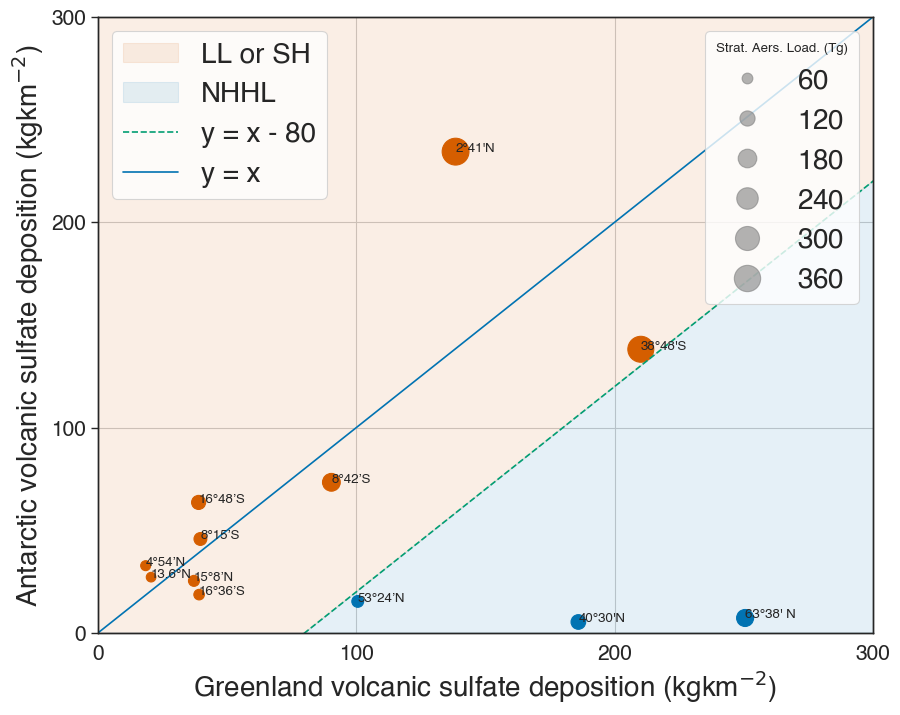

In [575]:
strat_load = 0.57*JL_G_NHH + JL_A_NHH
strat_load2 = JL_G_eq + JL_A_eq
strat_load_all = np.concatenate((strat_load,strat_load2), axis=None)
JL_G_all = np.concatenate((0.57*JL_G_NHH,JL_G_eq), axis=None)
JL_A_all = np.concatenate((JL_A_NHH, JL_A_eq), axis=None)

val = 15

x = np.arange(0,1200,1)
y = 1*x   - 80
y2 = 1*x + 80

%matplotlib inline
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax2 = ax.twinx()
ax.fill_between(x, y, 300, alpha=0.1, color= 'r', label = 'LL or SH')
#plt.fill_between(x, y2, 1,    alpha=0.1, color='r', label = 'LL or SH')
ax.fill_between(x,y, alpha=0.1, color='b', label = 'NHHL')
ax.scatter(JL_G_NHH, JL_A_NHH, s = strat_load, c='b')
ax.scatter(JL_G_eq[(JL_G_eq > val) & (JL_A_eq > val)], JL_A_eq[(JL_G_eq > val) & (JL_A_eq > val)], s = strat_load2[(JL_G_eq > val) & (JL_A_eq > val)], c='r')
scatter = ax2.scatter(JL_G_all[(JL_G_all > val) & (JL_A_all > val)], JL_A_all[(JL_G_all > val) & (JL_A_all > val)], s = strat_load_all[(JL_G_all > val) & (JL_A_all > val)], c='r', alpha=0 )
ax.plot(x,y, alpha=1, c = 'g', linestyle='--', label='y = x - 80')
ax.plot(x,x, label = 'y = x')
ax.plot(x,y2, alpha=0)
#ax.scatter(189.5, 192.8) ## taupo Lin et al. (2022)
ax.set_ylim(0,300)
ax.set_xlim(0,300)
ax2.set_ylim(0,300)
ax2.set_xlim(0,300)
ax.set_yticks(np.arange(0,400,100),np.arange(0,400,100).astype(int),fontsize=15)
ax2.set_xticks([])
ax2.set_yticks([])
ax.set_xticks(np.arange(0,400,100),np.arange(0,400,100).astype(int),fontsize=15)
#plt.xticklabels(np.arange(0,400,100).astype(int), rotation=0, fontsize=15)
#plt.yticklabels(np.arange(0,400,100).astype(int), rotation=0, fontsize=15)

for i in range(len(JL_G_NHH)):
    ax2.text(x=JL_G_NHH[i],y=JL_A_NHH[i],s=JL_lat_NHH[i])
    
for i in range(len(JL_G_eq[(JL_G_eq > val) & (JL_A_eq > val)])):
    ax2.text(x=JL_G_eq[(JL_G_eq > val) & (JL_A_eq > val)][i],y=JL_A_eq[(JL_G_eq > val) & (JL_A_eq > val)][i],s=JL_lat_eq[(JL_G_eq > val) & (JL_A_eq > val)][i])

handles, labels = scatter.legend_elements(prop="sizes", num=6, alpha=0.6, color='grey')
legend2 = ax2.legend(handles, labels, loc="upper right", title="Strat. Aers. Load. (Tg)", fontsize=20)
ax.legend(fontsize=20)
ax.set_xlabel(r'Greenland volcanic sulfate deposition (kgkm$^{-2}$)', fontsize=20)
ax.set_ylabel(r'Antarctic volcanic sulfate deposition (kgkm$^{-2}$)', fontsize=20)
#ax.savefig('Results/origin_eruptions_detemination.jpg', dpi=1000, bbox_inches='tight')
ax.grid()

In [576]:

## Bp eruptions we can find 
bp_Antarctica_eq = []
bp_Greenland_eq = []

bp_Antarctica_NHH = []
bp_Greenland_NHH = []

bp_Antarctica_eq_std = []
bp_Greenland_eq_std = []

bp_Antarctica_NHH_std = []
bp_Greenland_NHH_std = []

bp_eq_age = []
bp_NHH_age = []

## all eruptions for table 
Antarctica_eq = []
Greenland_eq = []

Antarctica_NHH = []
Greenland_NHH = []

Antarctica_eq_std = []
Greenland_eq_std = []

Antarctica_NHH_std = []
Greenland_NHH_std = []

eq_age = []
NHH_age = []

## For bp eruptions we can find 
for i in range(len(bp_Greenland_dep)):
    y_theoretical = np.interp(bp_Greenland_dep[i], x, y)
    if bp_Antarctica_dep[i] > y_theoretical:
        bp_Antarctica_eq.append(bp_Antarctica_dep[i])
        bp_Greenland_eq.append(bp_Greenland_dep[i])
        bp_Antarctica_eq_std.append(bp_std_Antarctica[i])
        bp_Greenland_eq_std.append(bp_std_Greenland[i])
        if np.isnan(bipolar_age[i]):
             bp_eq_age.append(bipolar_age2[i])
        else:
            bp_eq_age.append(bipolar_age[i])
            
    else:
        bp_Antarctica_NHH.append(bp_Antarctica_dep[i])
        bp_Greenland_NHH.append(bp_Greenland_dep[i])
        bp_Antarctica_NHH_std.append(bp_std_Antarctica[i])
        bp_Greenland_NHH_std.append(bp_std_Greenland[i])
        if np.isnan(bipolar_age[i]):
            bp_NHH_age.append(bipolar_age2[i])
        else:
            bp_NHH_age.append(bipolar_age[i])
            
## For all eruptions for table          
s1 = 0
s2 = 0   
for i in range(len(dep_Greenland)):
    y_theoretical = np.interp(dep_Greenland[i], x, y)
    
    if np.isnan(dep_Antarctica[i]) and np.isnan(dep_Greenland[i]):
        eq_age.append(40562)
        Antarctica_eq.append(0)
        Greenland_eq.append(0)
        Antarctica_eq_std.append(0)
        Greenland_eq_std.append(0)
        
    if dep_Antarctica[i] > y_theoretical:
        s1 += 1
        Antarctica_eq.append(dep_Antarctica[i])
        Greenland_eq.append(dep_Greenland[i])
        Antarctica_eq_std.append(std_Antarctica[i])
        Greenland_eq_std.append(std_Greenland[i])
        if np.isnan(age_Greenland[i]):
             eq_age.append(age_Antarctica[i])
        else:
            eq_age.append(age_Greenland[i])
            
    else:
        s2 += 1
        Antarctica_NHH.append(dep_Antarctica[i])
        Greenland_NHH.append(dep_Greenland[i])
        Antarctica_NHH_std.append(std_Antarctica[i])
        Greenland_NHH_std.append(std_Greenland[i])
        if np.isnan(age_Greenland[i]):
            NHH_age.append(age_Antarctica[i])
        else:
            NHH_age.append(age_Greenland[i])
        

bp_Antarctica_eq = np.array(bp_Antarctica_eq)
bp_Greenland_eq = np.array(bp_Greenland_eq)

bp_Antarctica_NHH = np.array(bp_Antarctica_NHH)
bp_Greenland_NHH = np.array(bp_Greenland_NHH)

bp_Antarctica_eq_std = np.array(bp_Antarctica_eq_std )
bp_Greenland_eq_std = np.array(bp_Greenland_eq_std )

bp_Antarctica_NHH_std = np.array(bp_Antarctica_NHH_std)
bp_Greenland_NHH_std = np.array(bp_Greenland_NHH_std)

Antarctica_eq = np.array(Antarctica_eq)
Greenland_eq = np.array(Greenland_eq)

Antarctica_NHH = np.array(Antarctica_NHH)
Greenland_NHH = np.array(Greenland_NHH)

Antarctica_eq_std = np.array(Antarctica_eq_std )
Greenland_eq_std = np.array(Greenland_eq_std )

Antarctica_NHH_std = np.array(Antarctica_NHH_std)
Greenland_NHH_std = np.array(Greenland_NHH_std)


len(Antarctica_eq), len(Antarctica_NHH)

Antarctica_eq

array([ 22.22262784,   4.32889834,  14.89027659,  22.13669772,
        36.54743003,  23.22609257,  25.2755523 ,  57.00477146,
       100.63428966,  16.7622621 ,   7.67752806,  14.22834625,
         4.02514284,  23.02869919,  13.73668033,  23.51897799,
        17.48389729, 128.10825067,  28.16756502,   6.82103196,
        18.99843133,  15.93181212,   6.83419647,  18.61765215,
        23.93705428,  24.27681733,   6.58754025,  31.63181031,
        18.03000595,  22.37768306,  37.94508035,  28.61010242,
        43.62593859, 138.18546561,  36.57360105,  46.96243263,
        24.23413758,  33.03388515,  19.77579241,  18.57762066,
        48.30716008,   4.67823889,   8.15735284,  79.61073441,
        40.40661106,   8.07103846, 161.84549379,  65.58032367,
        33.95286968,  53.82498413,  10.64617553,  18.77326017,
        46.51246194,  28.97340407,  22.28069101,  99.96605918,
        29.57793195,  60.55163312,  29.48944319,  49.24405082,
       180.36339171,  40.61622549,  12.03988849,  46.93

In [577]:
len(Antarctica_NHH[np.isfinite(Antarctica_NHH)])

78

In [578]:

## For all eruptions for the table 
strat_load_eq_table = (Greenland_eq) + Antarctica_eq
strat_load_NHH_table = (0.57*Greenland_NHH) + Antarctica_NHH
strat_load_eq_std_table  = np.sqrt((Greenland_eq_std**2) + Antarctica_eq_std**2)
strat_load_NHH_std_table  = np.sqrt(((0.57*Greenland_NHH_std)**2) + Antarctica_NHH_std**2)

strat_load_all_table = np.concatenate( (strat_load_eq_table, strat_load_NHH_table), axis=None )
strat_load_all_age_table = np.concatenate( (eq_age, NHH_age), axis = None )
strat_load_all_std_table = np.concatenate((strat_load_eq_std_table, strat_load_NHH_std_table), axis=None)

idx_sort_strat_table = np.argsort(strat_load_all_age_table)
idx_sort_age_table = np.argsort(age_Greenland)

strat_age_table = strat_load_all_age_table[idx_sort_strat_table]
strat_load_table = strat_load_all_table[idx_sort_strat_table]
strat_load_std_table = strat_load_all_std_table[idx_sort_strat_table]

idx_sort_larg_table = np.argsort(strat_load_table)

list_prediction_table = []
s = 0
for i in range(len(strat_age_table)):
    if (strat_age_table[i] in NHH_age) and np.isfinite(strat_load_table[i]):
        list_prediction_table.append('NHHL')
    elif (strat_age_table[i] in eq_age) and np.isfinite(strat_load_table[i]):
        list_prediction_table.append('LL or SH')
    else:
        s+=1
        list_prediction_table.append('')
        
list_prediction_table = np.array(list_prediction_table,dtype='object')


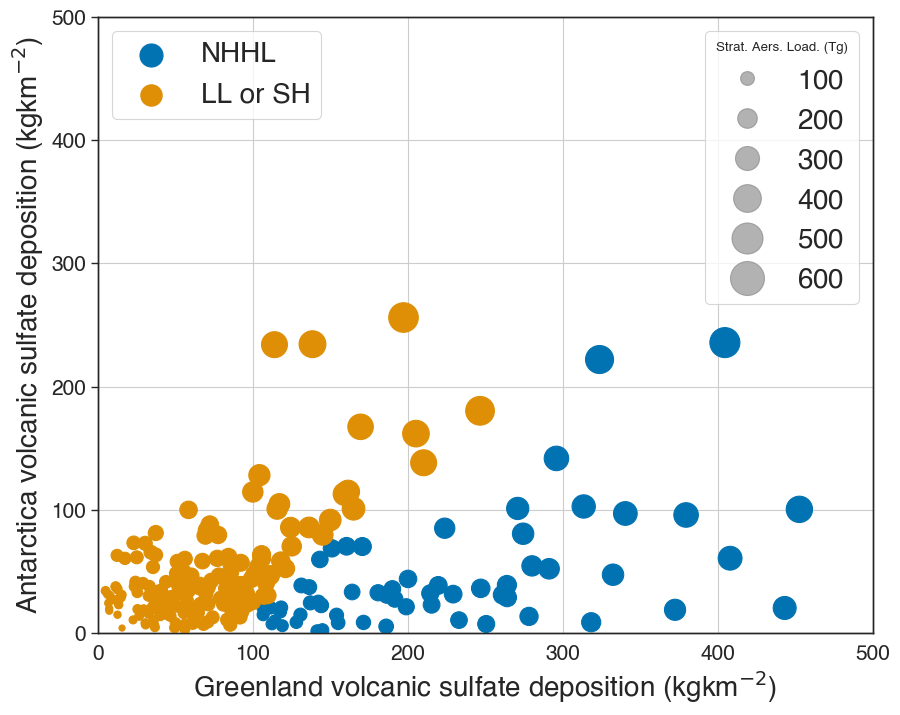

In [579]:
%matplotlib inline
strat_load_eq = (bp_Greenland_eq) + bp_Antarctica_eq
strat_load_NHH = (0.57*bp_Greenland_NHH) + bp_Antarctica_NHH
strat_load_eq_std  = np.sqrt((bp_Greenland_eq_std**2) + bp_Antarctica_eq_std**2)
strat_load_NHH_std  = np.sqrt(((0.57*bp_Greenland_NHH_std)**2) + bp_Antarctica_NHH_std**2)

strat_load_all = np.concatenate((strat_load_eq,strat_load_NHH), axis=None)
G_all = np.concatenate((bp_Greenland_eq, 0.57*bp_Greenland_NHH), axis=None)
A_all = np.concatenate((bp_Antarctica_eq,bp_Antarctica_NHH), axis=None)

fig, ax = plt.subplots(figsize=(10,8))
#plt.scatter(bp_Greenland_dep[bipolar_age < 122*1e3], bp_Antarctica_dep[bipolar_age2 < 122*1e3], s = stratospheric_loading[bipolar_age2 < 122*1e3]/3 )
#scatter = ax.scatter(bp_Greenland_NHH[bp_Greenland_NHH< 800], bp_Antarctica_NHH[bp_Greenland_NHH< 800] , s=strat_load_NHH[bp_Greenland_NHH< 800], label = 'NHHL', alpha=0)
#scatter2 = ax.scatter(bp_Greenland_eq,  bp_Antarctica_eq, s=strat_load_eq, label = 'LL or SH', alpha =0)
scatter = ax.scatter(G_all[G_all < 800], A_all[G_all < 800], s=strat_load_all[G_all < 800], alpha=0)

ax2 = plt.twinx()
## so we can have two different legends 
scatter3 = ax2.scatter(bp_Greenland_NHH[bp_Greenland_NHH< 800], bp_Antarctica_NHH[bp_Greenland_NHH< 800], s=strat_load_NHH[bp_Greenland_NHH< 800], label = 'NHHL')
scatter4 = ax2.scatter(bp_Greenland_eq,  bp_Antarctica_eq, s=strat_load_eq, label = 'LL or SH')

#ax.plot(x,y, 'm')
ax.set_ylim(0,500)
ax.set_xlim(0,500)
ax2.set_ylim(0,500)
ax2.set_xlim(0,500)
ax.set_xlabel('Greenland', fontsize=14)
ax.set_ylabel('Antarctica', fontsize=14)
ax2.set_xticks([])
ax2.set_yticks([])

ax.set_xticks(np.arange(0,600,100),fontsize=15)
ax.set_yticks(np.arange(0,600,100),fontsize=15)
ax.set_xticklabels(np.arange(0,600,100).astype(int), rotation=0, fontsize=15)
ax.set_yticklabels(np.arange(0,600,100).astype(int), rotation=0, fontsize=15)


handles, labels = scatter.legend_elements(prop="sizes", num=6, alpha=0.6, color='grey')
legend2 = ax.legend(handles, labels, loc="upper right", title="Strat. Aers. Load. (Tg)", fontsize=20)
plt.rcParams['legend.title_fontsize'] = 14
ax2.legend(loc='upper left', fontsize=20)
ax.set_xlabel(r'Greenland volcanic sulfate deposition (kgkm$^{-2}$)', fontsize=20)
ax.set_ylabel(r'Antarctica volcanic sulfate deposition (kgkm$^{-2}$)', fontsize=20)
plt.savefig('Results/origin_eruptions_results.jpg', dpi=1000, bbox_inches='tight')
ax.grid()

In [580]:
strat_load_all = np.concatenate( (strat_load_eq, strat_load_NHH), axis=None ) #strat load not in order 
strat_load_all_age = np.concatenate( (bp_eq_age, bp_NHH_age), axis = None ) #strat age not in order
strat_load_all_std = np.concatenate((strat_load_eq_std, strat_load_NHH_std), axis=None) #strat load std not in order

idx_sort_strat = np.argsort(strat_load_all_age) #sorting strat age smallest to largest
idx_sort_age = np.argsort(bipolar_age) #sorting bipolar age smallest to largest

strat_age = strat_load_all_age[idx_sort_strat] #strat age smallest to largest
strat_load = strat_load_all[idx_sort_strat] #strat load smallest to largest age 
strat_load_std = strat_load_all_std[idx_sort_strat] #strat load std smallest to largest age

idx_sort_larg = np.argsort(strat_load) #sorting smallest to largest strat load 

list_prediction = []


for i in range(len(strat_age)):
    if strat_age[i] in bp_NHH_age:
        list_prediction.append('NHHL')
    elif strat_age[i] in bp_eq_age:
        list_prediction.append('LL or SH')
        
list_prediction = np.array(list_prediction, dtype='object')

rank = np.arange(1,len(strat_age)+1,1)

In [581]:
table = zip_longest(rank, np.round(np.array(bipolar_age)[idx_sort_larg][::-1]), np.round(np.array(bp_Greenland_dep)[idx_sort_larg][::-1], 1), np.round(np.array(bp_Antarctica_dep)[idx_sort_larg][::-1],1), np.round(strat_load[idx_sort_larg][::-1], 1), np.round(strat_load_std[idx_sort_larg][::-1], 1), list_prediction[idx_sort_larg ][::-1], bp_no_cores_G[idx_sort_larg][::-1], bp_no_cores_A[idx_sort_larg][::-1])

print(tabulate(table, headers = [ 'Rank', 'Age (b2k)', r'Volc. Sulf. Dep. Greenland (kgkm$^{-2}$)', r'Volc. Sulf. Dep. Antarctica (kgkm$^{-2}$)', 'Stratospheric Loading (Tg)', 'Std', 'Prediction Volcanic Site', 'No cores G', 'no cores A']))

  Rank    Age (b2k)    Volc. Sulf. Dep. Greenland (kgkm$^{-2}$)    Volc. Sulf. Dep. Antarctica (kgkm$^{-2}$)    Stratospheric Loading (Tg)    Std  Prediction Volcanic Site      No cores G    no cores A
------  -----------  ------------------------------------------  -------------------------------------------  ----------------------------  -----  --------------------------  ------------  ------------
     1        55383                                      1156.2                                         16.2                         675.3   86.4  NHHL                                   3             2
     2        45555                                       564.7                                        157.3                         479.2   58.2  NHHL                                   3             1
     3        67060                                       404.5                                        235.7                         466.3   51.6  NHHL                                   3     

In [582]:
len(strat_load[strat_load >= 348.3]), bipolar_age[strat_load >= 348.3], len(strat_load[strat_load >= 85.5]), bipolar_age[strat_load >= 62.6]

(11,
 array([25460.3433908 , 32032.22222222, 38133.14285714, 45554.56410256,
        55383.47826087, 67059.861     , 74057.28571429, 74156.94117647,
        80077.15384615, 85068.14814815, 91120.        ]),
 154,
 array([ 12170.4       ,  12240.69090909,  12754.81481481,  12917.33333333,
         13028.15789474,  13620.42105263,  13823.72093023,  14499.76190476,
         14704.65306122,  14760.91525424,  14965.95744681,  15296.47058824,
         15558.60465116,  15670.47619048,  15682.5       ,  16333.85714286,
         16468.93617021,  16818.18181818,  17426.82926829,  17857.4893617 ,
         18296.2745098 ,  18832.6122449 ,  19296.19047619,  19806.46808511,
         20136.27906977,  20785.77777778,  22243.75      ,  22421.46341463,
         23578.06451613,  23839.39393939,  24081.29032258,  24649.33333333,
         24668.89655172,  25248.57142857,  25460.3433908 ,  25759.33333333,
         25939.86654378,  26134.28571429,  26282.7027027 ,  26334.59459459,
         26477.        ,  2

In [583]:
# Store as excel file 
data = {
    'Rank': rank,
    'Age': np.round(np.array(bipolar_age)[idx_sort_larg][::-1]),
    'Dep G': np.round(np.array(bp_Greenland_dep)[idx_sort_larg][::-1],1),
    'Dep A':  np.round(np.array(bp_Antarctica_dep)[idx_sort_larg][::-1],1),
    'Strat load': np.round(strat_load[idx_sort_larg][::-1],1),
    'Prediction site': list_prediction[idx_sort_larg ][::-1], 
    'No cores G': bp_no_cores_G[idx_sort_larg][::-1],
    'No cores A': bp_no_cores_A[idx_sort_larg][::-1]
    
}

df = pd.DataFrame(data)

df.to_excel('Largest_eruptions.xlsx', index=False)

largest_age = np.array(bipolar_age)[idx_sort_larg][::-1]

%store largest_age

Stored 'largest_age' (ndarray)


### Standard deviation for stratospheric aerosol loading Lin et al., 2022

In [584]:
JL_orig_bipolar
JL_std_EDC = np.nan_to_num(JL_std_EDC)
JL_std_EDML = np.nan_to_num(JL_std_EDML)
JL_std_NGRIP = np.nan_to_num(JL_std_NGRIP)
JL_std_GISP2 = np.nan_to_num(JL_std_GISP2)
JL_std_NEEM = np.nan_to_num(JL_std_NEEM)
JL_std_WDC= np.nan_to_num(JL_std_WDC)
std_JL = []
for i in range(len(JL_orig_bipolar)):
    if ((JL_std_NGRIP[i] != 0) and (JL_std_GISP2[i]==0) and (JL_std_NEEM[i]==0)) or ((JL_std_NGRIP[i] == 0) and (JL_std_GISP2[i]!=0) and (JL_std_NEEM[i]==0)) or ((JL_std_NGRIP[i]== 0) and (JL_std_GISP2[i]==0) and (JL_std_NEEM[i]!=0)):
        len_G = 1
    elif ((JL_std_NGRIP[i] != 0) and (JL_std_GISP2[i]!=0) and (JL_std_NEEM[i]==0)) or ((JL_std_NGRIP[i] != 0) and (JL_std_GISP2[i]==0) and (JL_std_NEEM[i]!=0)) or ((JL_std_NGRIP[i] == 0) and (JL_std_GISP2[i]!=0) and (JL_std_NEEM[i]!=0)):
        len_G = 2
    elif ((JL_std_NGRIP[i] != 0) and (JL_std_GISP2[i]!=0) and (JL_std_NEEM[i]!=0)):
        len_G = 3
    if ((JL_std_EDC[i] != 0) and (JL_std_EDML[i]==0) and (JL_std_WDC[i]==0)) or ((JL_std_EDC[i] == 0) and (JL_std_EDML[i]!=0) and (JL_std_WDC[i]==0)) or ((JL_std_EDC[i] == 0) and (JL_std_EDML[i]==0) and (JL_std_WDC[i]!=0)):
        len_A = 1
    elif ((JL_std_EDC[i] != 0) and (JL_std_EDML[i]!=0) and (JL_std_WDC[i]==0)) or ((JL_std_EDC[i] != 0) and (JL_std_EDML[i]==0) and (JL_std_WDC[i]!=0)) or ((JL_std_EDC[i] == 0) and (JL_std_EDML[i]!=0) and (JL_std_WDC[i]!=0)):
        len_A = 2
    elif ((JL_std_EDC[i] != 0) and (JL_std_EDML[i]!=0) and (JL_std_WDC[i]!=0)):
        len_A = 3
        
    if JL_orig_bipolar[i] == 'NHHL':
        std_JL.append(  np.sqrt( ((0.57*JL_std_NGRIP[i]/len_G)**2 + (0.57*JL_std_NEEM[i]/len_G)**2 + (0.57*JL_std_GISP2[i]/len_G)**2)  + ((JL_std_EDML[i]/(0.87*len_A))**2 + (JL_std_EDC[i]/(0.72*len_A))**2 + (JL_std_WDC[i]/(1.4*len_A))**2))      )
    else:
        std_JL.append(  np.sqrt( ((JL_std_NGRIP[i]/len_G)**2 + (JL_std_NEEM[i]/len_G)**2 + (JL_std_GISP2[i]/len_G)**2) + ((JL_std_EDML[i]/(0.87*len_A))**2 + (JL_std_EDC[i]/(0.72*len_A))**2 + (JL_std_WDC[i]/(1.4*len_A))**2) )    )
        
std_JL = np.array(std_JL)
np.shape(std_JL)

(85,)

In [585]:
list_prediction = np.array(list_prediction, dtype='object')

len(list_prediction[list_prediction == 'LL or SH']), len(list_prediction[list_prediction=='NHHL'])

(170, 64)

### making array to compare stratospheric aerosol loading to Lin et al., 2022

In [586]:
JL_age_bipolar[-4] =59154 
JL_age_bipolar[-3] =59286

bipolar_age_sim = []
JL_same_strat = []
JL_same_std = []
JL_same_orig = []
Me_same_strat = []
Me_same_std = []
same_age = []
Me_same_orig = []


for i in range(2,len(JL_age_bipolar)):
    idx = np.where( (bipolar_age < JL_age_bipolar[i] + 5) & (bipolar_age > JL_age_bipolar[i] - 5) )
    #if len(idx[0]) != 0: 
    bipolar_age_sim.append(bipolar_age[idx])
    if len(idx[0]) != 0: 
        JL_same_strat.append(JL_aer_bipolar[i])
        JL_same_std.append(std_JL[i])
        Me_same_strat.append(strat_load[idx])
        Me_same_std.append(strat_load_std[idx])
        same_age.append(bipolar_age[idx])
        JL_same_orig.append(JL_orig_bipolar[i])
        Me_same_orig.append(list_prediction[idx][0])
    


In [587]:
JL_same_orig = np.array(JL_same_orig, dtype='object')
JL_same_orig[JL_same_orig=='LL or SH'] = 1
JL_same_orig[JL_same_orig=='NHHL'] = 2

Me_same_orig = np.array(Me_same_orig, dtype='object')
Me_same_orig[Me_same_orig=='LL or SH'] = 1
Me_same_orig[Me_same_orig=='NHHL'] = 2

corr = pearsonr(JL_same_orig, Me_same_orig)
s= 0
s2 = 0
s3 =0
for i in range(len(Me_same_orig)):
    if Me_same_orig[i] == JL_same_orig[i]:
        s += 1
        if (Me_same_orig[i]==1):
            s2 += 1
        if (Me_same_orig[i]==2):
            s3 += 1
'correlation', corr,'total same', s,'total same LL', s2, 'total same NH', s3 ,'Me LL', len(Me_same_orig[Me_same_orig==1]),'JL LL', len(JL_same_orig[JL_same_orig==1]),  'Me NH', len(Me_same_orig[Me_same_orig==2]), 'JL NH',len(JL_same_orig[JL_same_orig==2])

('correlation',
 (0.6361624836080046, 1.7482682818412985e-10),
 'total same',
 64,
 'total same LL',
 33,
 'total same NH',
 31,
 'Me LL',
 49,
 'JL LL',
 34,
 'Me NH',
 32,
 'JL NH',
 47)

(81,) (81,) (81, 1)


(array([[0.88777028]]), 0.8727339265075449, array([23.30592472]))

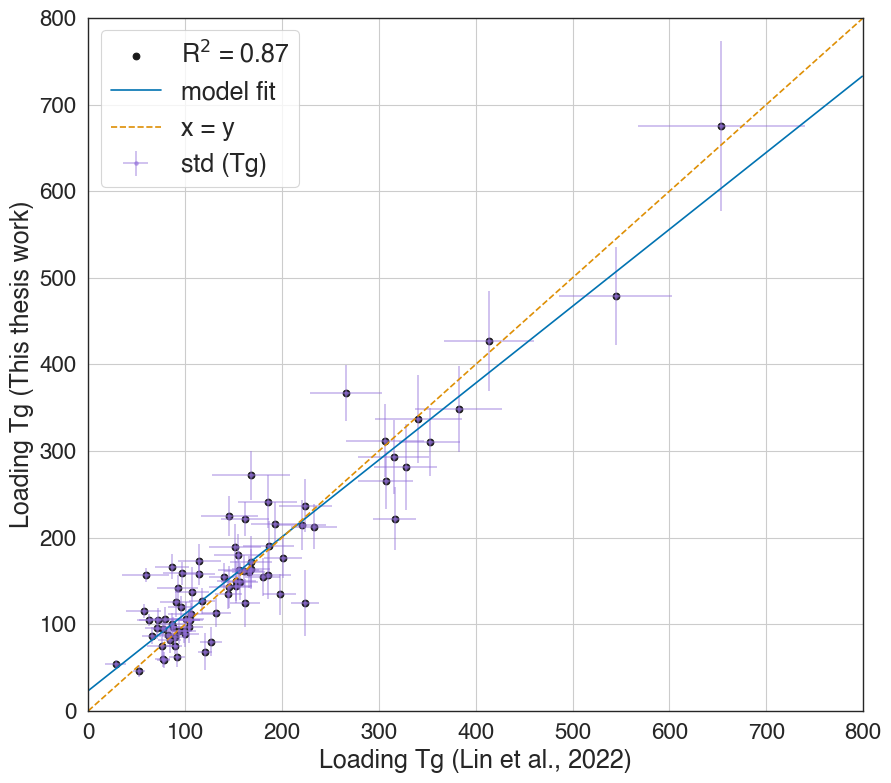

In [588]:
%matplotlib inline
JL_same_strat = np.array(JL_same_strat, dtype='float64')
JL_same_std = np.array(JL_same_std, dtype='float64')
Me_same_strat = np.array(Me_same_strat, dtype='float64')
Me_same_std = np.array(Me_same_std, dtype='float64')
model = LinearRegression().fit(JL_same_strat.reshape((-1,1)), Me_same_strat.reshape((-1,1)))
r_sq = model.score(JL_same_strat.reshape((-1,1)), Me_same_strat.reshape((-1,1)))
x  = np.arange(0,800)
y = x * model.coef_ + model.intercept_
y = y.reshape((len(x),))

xx = np.arange(0,800,1)
yy = xx 

print(np.shape(JL_same_strat), np.shape(Me_same_std[:,0]), np.shape(Me_same_strat))


plt.figure(figsize=(10,9))
#plt.scatter(JL_same_strat, Me_same_strat, label=r_sq)
plt.errorbar(JL_same_strat, Me_same_strat[:,0], xerr=Me_same_std[:,0],yerr=JL_same_std, fmt='.', color='mediumpurple', alpha=.5, label= 'std (Tg)')
plt.scatter(JL_same_strat, Me_same_strat, label=r'R$^2$ = ' + str(np.round(r_sq, 2)), color='k')
plt.plot(x,y, label='model fit')
plt.plot(xx,yy, label = 'x = y', linestyle='--')
plt.legend(fontsize=18)
plt.ylabel('Loading Tg (This thesis work)', fontsize=18)
plt.xlabel('Loading Tg (Lin et al., 2022)', fontsize=18)
plt.grid('minor')
plt.xlim(0,800)
plt.ylim(0,800)
plt.tick_params(labelsize=16)

model.coef_, r_sq, model.intercept_

### Continue millenial frequency of eruptions 

In [589]:
%store -r NGRIP_dO18
%store -r NGRIP_dO18_age
%store -r NGRIP_dO18_depth

NGRIP_dO18 = dtype_float64(NGRIP_dO18)
NGRIP_dO18_age = dtype_float64(NGRIP_dO18_age)
NGRIP_d18O_smooth = savgol_filter(NGRIP_dO18, 3, 1)

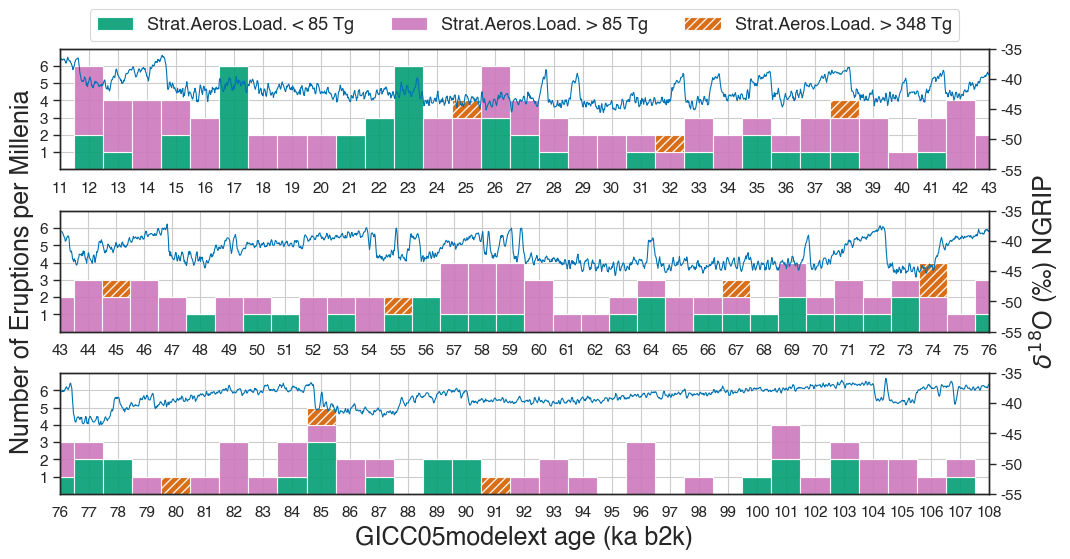

In [590]:
%matplotlib inline
k_years = np.arange(11*1e3, 109*1e3, 1e3) ## List with age every 1000k years
k_erup = np.zeros(len(k_years))
lim_NGRIP = np.where( (NGRIP_dO18_age > k_years[0]) & (NGRIP_dO18_age < k_years[-1]) )
lim_Tambora = 85.5
lim_Taupo = 348.4


k_erup_100 = np.zeros(len(k_years))
k_erup_250 = np.zeros(len(k_years))
k_erup_500 = np.zeros(len(k_years))
k_erup_1000 = np.zeros(len(k_years))

lim0 = 63
lim1 = 85
lim2 = 348
lim3 = 1000

c1 = 'g'
c2 = 'm'
c3 = 'r'
c4 = 'b'

millienial_age = []
millenial_len = []

for i in range(0,len(k_years)-1):
    idx = np.where( (strat_load_all_age > k_years[i]) & (strat_load_all_age < k_years[i+1]) )
    millienial_age.append(strat_load_all_age[idx])
    millenial_len.append(len(strat_load_all_age[idx]))
    idx_100 = np.where(strat_load_all[idx] <=lim0)
    idx_250 = np.where(strat_load_all[idx] <=lim1)
    idx_500 = np.where((strat_load_all[idx] > lim1) & (strat_load_all[idx] <=lim2) )
    idx_1000 = np.where((strat_load_all[idx] > lim2) & (strat_load_all[idx] <=lim3) )
    no_100 = strat_load_all[idx_100]
    no_250 = strat_load_all[idx_250]
    no_500 = strat_load_all[idx_500]
    no_1000 = strat_load_all[idx_1000]
    k_erup_100[i] = len(no_100)
    k_erup_250[i] = len(no_250)
    k_erup_500[i] = len(no_500)
    k_erup_1000[i] = len(no_1000)

fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(10,5))
fig.tight_layout(pad=1)
ax11 = ax1.twinx()
ax1.bar(k_years, k_erup_250, width=1000, color=c1, alpha=.9, label='Strat.Aeros.Load. < 85 Tg')
ax1.bar(k_years, k_erup_500, width=1000, color=c2, alpha=.9, bottom=k_erup_250, label='Strat.Aeros.Load. > 85 Tg')
ax1.bar(k_years, k_erup_1000, width=1000, color=c3, alpha=.9, bottom=k_erup_250+k_erup_500, label='Strat.Aeros.Load. > 348 Tg', hatch='////')
ax11.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_d18O_smooth[lim_NGRIP], linewidth=.8, c=c4)
ax1.set_xticks(k_years, (k_years/1e3).astype(int) , rotation=0)
ax1.set_xlim(11*1e3,43*1e3)
#ax1.set_ylabel('Number or Eruptions')
#ax11.set_ylabel('$\delta^{18}$O (‰) NGRIP')
ax11.set_ylim(-55,-35)
ax11.set_yticks([-55, -50, -45, -40, -35], [-55, -50, -45, -40, -35])
ax1.set_yticks([1,2,3,4,5,6], [1,2,3,4,5,6])
ax1.tick_params(labelsize=11)
ax11.tick_params(labelsize=11)
ax1.set_ylim(0,7)

ax22 = ax2.twinx()
ax2.bar(k_years, k_erup_250, width=1000, color=c1, alpha=.9)
ax2.bar(k_years, k_erup_500, width=1000, color=c2, alpha=.9, bottom=k_erup_250)
ax2.bar(k_years, k_erup_1000, width=1000, color=c3, alpha=.9, bottom=k_erup_250+k_erup_500, hatch='////')
ax22.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_d18O_smooth[lim_NGRIP], linewidth=.8, c=c4)
ax2.set_xticks(k_years, (k_years/1e3).astype(int) , rotation=0)
ax2.set_xlim(43*1e3,76*1e3)
ax2.set_ylabel('Number of Eruptions per Millenia', fontsize=18)
ax22.set_ylabel('$\delta^{18}$O (‰) NGRIP', fontsize=18)
ax22.set_ylim(-55,-35)
ax22.set_yticks([-55, -50, -45, -40, -35], [-55, -50, -45, -40, -35])
ax2.set_yticks([1,2,3,4,5,6], [1,2,3,4,5,6])
ax2.tick_params(labelsize=11)
ax22.tick_params(labelsize=11)
ax2.set_ylim(0,7)

ax33 = ax3.twinx()
f1 = ax3.bar(k_years, k_erup_250, width=1000, color=c1, alpha=.9)
f2 = ax3.bar(k_years, k_erup_500, width=1000, color=c2, alpha=.9, bottom=k_erup_250)
f3 = ax3.bar(k_years, k_erup_1000, width=1000, color=c3, alpha=.9, bottom=k_erup_250+k_erup_500, hatch='////')
f4 = ax33.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_d18O_smooth[lim_NGRIP], linewidth=.8, c=c4)
ax3.set_xticks(k_years, (k_years/1e3).astype(int) , rotation=0)
ax3.set_xlim(76*1e3,108*1e3)
ax3.set_xlabel('GICC05modelext age (ka b2k)', fontsize=18)
#ax3.set_ylabel('Number or Eruptions')
#ax33.set_ylabel('$\delta^{18}$O (‰) NGRIP')
ax3.set_ylim(0,7)
ax33.set_ylim(-55,-35)
ax33.set_yticks([-55, -50, -45, -40, -35], [-55, -50, -45, -40, -35])
ax3.set_yticks([1,2,3,4,5,6], [1,2,3,4,5,6])
ax3.tick_params(labelsize=11)
ax33.tick_params(labelsize=11)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          ncol=3, fancybox=True, shadow=False, fontsize=13)
ax3.grid()
ax5.grid()
ax4.grid()
ax2.grid()
ax1.grid()


plt.savefig('Results/numberoferuptions2.jpg', dpi=1000, bbox_inches='tight')


In [591]:
np.mean(k_erup_1000), np.mean(k_erup_500), np.mean(k_erup_250), np.mean(k_erup_100), np.sum(k_erup_1000) , np.sum(k_erup_500) ,np.sum(k_erup_250), np.sum(k_erup_100), len(strat_load_all[strat_load_all < 63])

(0.11224489795918367,
 1.469387755102041,
 0.8061224489795918,
 0.41836734693877553,
 11.0,
 144.0,
 79.0,
 41.0,
 41)

### nicer figures of average peak shape 

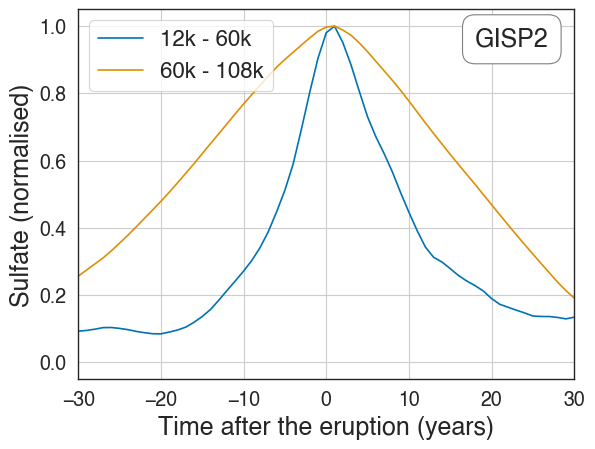

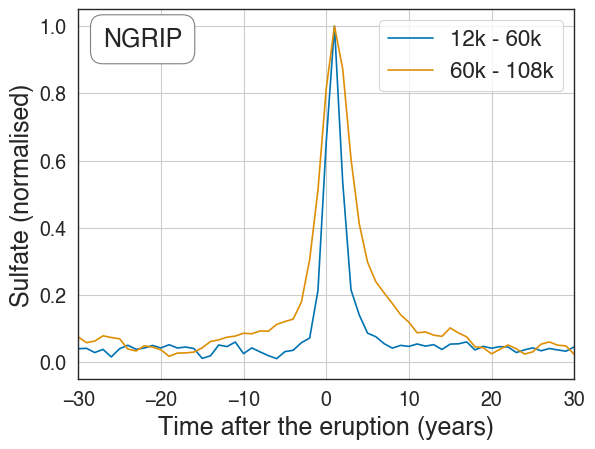

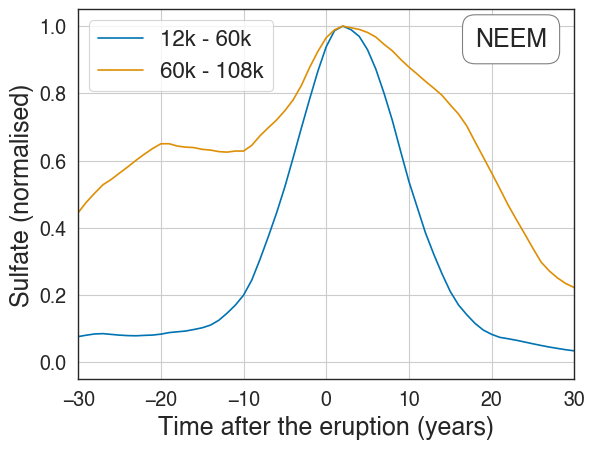

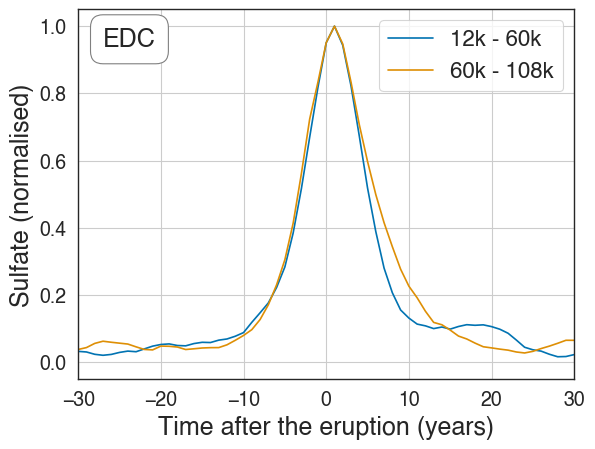

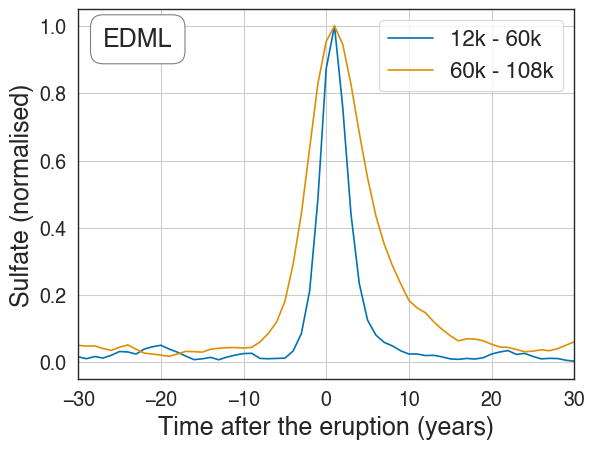

In [592]:
fig, ax = plt.subplots(1,1)
ax.plot(GISP2_avg_len_60, GISP2_avg_sulf_60, label= r'12k - 60k')
ax.plot(GISP2_avg_len_120, GISP2_avg_sulf_120, label=r'60k - 108k')
ax.legend(fontsize=16, loc='upper left')
#ax.title('GISP2')
ax.set_ylabel('Sulfate (normalised)', fontsize=18)
ax.set_xlabel('Time after the eruption (years)', fontsize=18)
ax.grid()
ax.tick_params(labelsize=14)
plt.text(0.8, 0.9, 'GISP2',  transform=ax.transAxes, fontsize=18, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', pad=.5))
ax.set_xlim(-30,30)
plt.show()

fig, ax = plt.subplots(1,1)
ax.plot(NGRIP_avg_len_60, NGRIP_avg_sulf_60, label= r'12k - 60k')
ax.plot(NGRIP_avg_len_120, NGRIP_avg_sulf_120, label=r'60k - 108k')
ax.legend(fontsize=16)
#ax.title('NGRIP')
ax.set_ylabel('Sulfate (normalised)', fontsize=18)
ax.set_xlabel('Time after the eruption (years)', fontsize=18)
ax.grid()
ax.tick_params(labelsize=14)
ax.set_xlim(-30,30)
plt.text(0.05, 0.9, 'NGRIP',  transform=ax.transAxes, fontsize=18, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', pad=.5))
plt.show()

fig, ax = plt.subplots(1,1)
ax.plot(NEEM_avg_len_60, NEEM_avg_sulf_60, label= r'12k - 60k')
ax.plot(NEEM_avg_len_120, NEEM_avg_sulf_120, label=r'60k - 108k')
ax.legend(fontsize=16)
#ax.title('NEEM')
ax.set_ylabel('Sulfate (normalised)', fontsize=18)
ax.set_xlabel('Time after the eruption (years)', fontsize=18)
ax.grid()
ax.tick_params(labelsize=14)
ax.set_xlim(-30,30)
plt.text(0.8, 0.9, 'NEEM',  transform=ax.transAxes, fontsize=18, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', pad=.5))
plt.show()

fig, ax = plt.subplots(1,1)
ax.plot(EDC_avg_len_60, EDC_avg_sulf_60, label= r'12k - 60k')
ax.plot(EDC_avg_len_120, EDC_avg_sulf_120, label=r'60k - 108k')
ax.legend(fontsize=16)
#ax.title('EDC')
ax.set_ylabel('Sulfate (normalised)', fontsize=18)
ax.set_xlabel('Time after the eruption (years)', fontsize=18)
ax.grid()
ax.tick_params(labelsize=14)
ax.set_xlim(-30,30)
plt.text(0.05, 0.9, 'EDC',  transform=ax.transAxes, fontsize=18, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', pad=.5))
plt.show()

fig, ax = plt.subplots(1,1)
ax.plot(EDML_avg_len_60, EDML_avg_sulf_60, label= r'12k - 60k')
ax.plot(EDML_avg_len_120, EDML_avg_sulf_120, label=r'60k - 108k')
ax.legend(fontsize=16)
#ax.title('EDML')
ax.set_ylabel('Sulfate (normalised)', fontsize=18)
ax.set_xlabel('Time after the eruption (years)', fontsize=18)
ax.grid()
ax.tick_params(labelsize=14)
ax.set_xlim(-30,30)
plt.text(0.05, 0.9, 'EDML',  transform=ax.transAxes, fontsize=18, bbox=dict(facecolor='white', edgecolor='grey', boxstyle='round', pad=.5))
plt.show()

## Figures of all bipolar eruptions found 

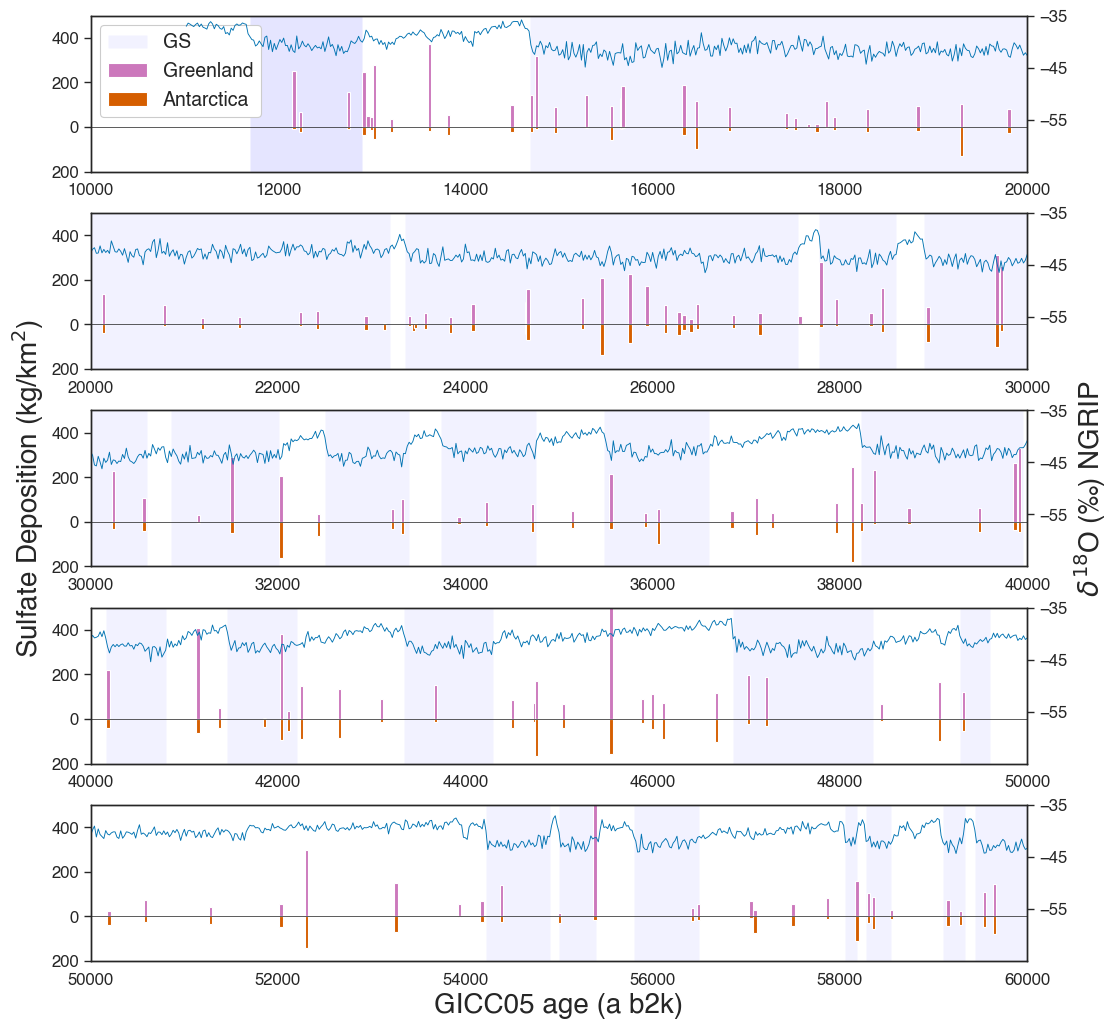

In [593]:
w = 35
ymax= 500
ymin = -200
fc = 'blue'
a = 0.05
%matplotlib inline
ca = 'r'
cg = 'm'
tick_size = 12

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(10,10))
fig.tight_layout(pad=1)

ax11 = ax1.twinx()
ax11.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
for i in range(len(GL_onset)-1):
    ax1.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
    if i == 0: 
        ax1.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc, label='GS')
ax11.set_ylim(-65,-35)
ax11.set_yticks([-35, -45, -55])
ax1.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w, label='Greenland')
ax1.bar(bipolar_age, -bp_Antarctica_dep, color = ca, width = w, label = 'Antarctica')
ax1.set_xlim(10*1e3,20*1e3)
ax1.set_ylim(ymin, ymax)
ax1.axhline(y=0, linewidth=0.5, c='k')
ax1.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax1.legend(loc = 'upper left', fontsize=14, fancybox=True, framealpha=1, facecolor='white')
ax1.tick_params(labelsize=tick_size)
ax11.tick_params(labelsize=tick_size)

ax22 = ax2.twinx()
ax22.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
for i in range(len(GL_onset)-1):
    ax2.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
ax22.set_ylim(-65,-35)
ax22.set_yticks([-35, -45, -55])
ax2.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w)
ax2.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca)
ax2.set_xlim(20*1e3,30*1e3)
ax2.set_ylim(ymin, ymax)
ax2.axhline(y=0, linewidth=0.5,c='k')
ax2.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax2.tick_params(labelsize=tick_size)
ax22.tick_params(labelsize=tick_size)

ax33 = ax3.twinx()
ax33.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
for i in range(len(GL_onset)-1):
    ax3.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
ax33.set_ylim(-65,-35)
ax33.set_yticks([-35, -45, -55])
ax3.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w)
ax3.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca)
ax3.set_xlim(30*1e3,40*1e3)
ax3.set_ylim(ymin, ymax)
ax3.axhline(y=0, linewidth=0.5, c='k')
ax3.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax3.set_ylabel(r'Sulfate Deposition (kg/km$^{2}$)', fontsize = 20)
ax33.set_ylabel('$\delta^{18}$O (‰) NGRIP', fontsize=20)
ax3.tick_params(labelsize=tick_size)
ax33.tick_params(labelsize=tick_size)

ax44= ax4.twinx()
ax44.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
for i in range(len(GL_onset)-1):
    ax4.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
ax44.set_ylim(-65,-35)
ax44.set_yticks([-35, -45, -55])
ax4.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w)
ax4.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca)
ax4.set_xlim(40*1e3,50*1e3)
ax4.set_ylim(ymin, ymax)
ax4.axhline(y=0, linewidth=0.5, c='k')
ax4.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax4.tick_params(labelsize=tick_size)
ax44.tick_params(labelsize=tick_size)

ax55= ax5.twinx()
ax55.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
for i in range(len(GL_onset)-1):
    ax5.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
ax55.set_ylim(-65,-35)
ax55.set_yticks([-35, -45, -55])
ax5.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w)
ax5.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca)
ax5.set_xlim(50*1e3,60*1e3)
ax5.set_ylim(ymin, ymax)
ax5.axhline(y=0, linewidth=0.5, c='k')
ax5.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax5.set_xlabel('GICC05 age (a b2k)', fontsize=20)
ax5.tick_params(labelsize=tick_size)
ax55.tick_params(labelsize=tick_size)

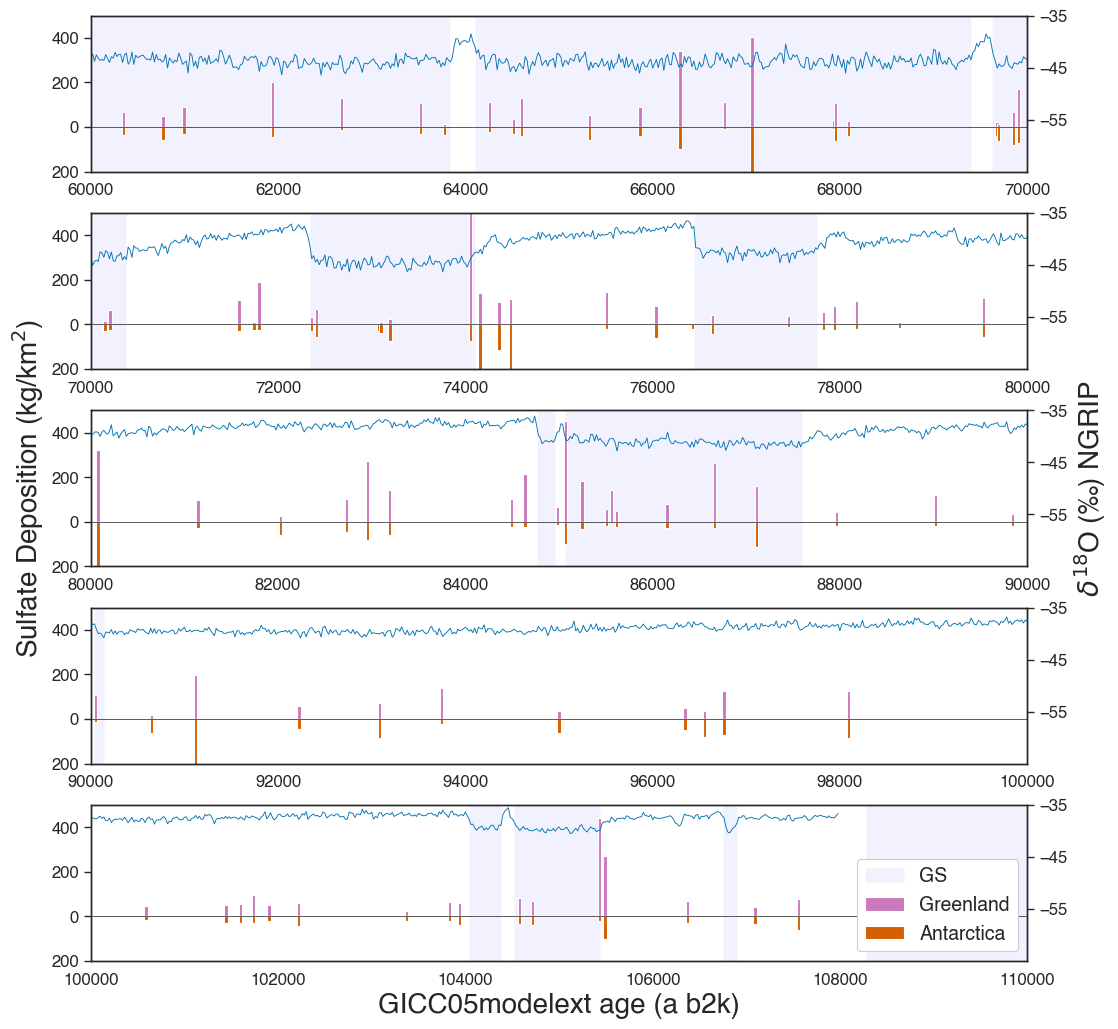

In [594]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(10,10))
fig.tight_layout(pad=1)

ax11 = ax1.twinx()
for i in range(len(GL_onset)-1):
    ax1.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
ax11.set_ylim(-65,-35)
ax11.set_yticks([-35, -45, -55])
ax1.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w, label='Greenland')
ax1.bar(bipolar_age, -bp_Antarctica_dep, color = ca, width = w, label = 'Antarctica')
ax11.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
ax1.set_xlim(60*1e3,70*1e3)
ax1.set_ylim(ymin, ymax)
ax1.axhline(y=0, linewidth=0.5, c='k')
ax1.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
#ax1.legend(loc = 'lower right', fontsize=14, fancybox=True)
ax1.tick_params(labelsize=tick_size)
ax11.tick_params(labelsize=tick_size)

ax22 = ax2.twinx()
for i in range(len(GL_onset)-1):
    ax2.axvspan(GL_end[i+1], GL_onset[i], alpha=a, facecolor=fc)
ax22.set_ylim(-65,-35)
ax22.set_yticks([-35, -45, -55])
ax2.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w)
ax2.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca)
ax2.set_xlim(70*1e3,80*1e3)
ax2.set_ylim(ymin, ymax)
ax22.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
ax2.axhline(y=0, linewidth=0.5,c='k')
ax2.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax2.tick_params(labelsize=tick_size)
ax22.tick_params(labelsize=tick_size)

ax33 = ax3.twinx()
for i in range(len(GL_onset)-1):
    ax3.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
ax33.set_ylim(-65,-35)
ax33.set_yticks([-35, -45, -55])
ax3.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w)
ax3.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca)
ax33.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
ax3.set_xlim(80*1e3,90*1e3)
ax3.set_ylim(ymin, ymax)
ax3.axhline(y=0, linewidth=0.5, c='k')
ax3.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax3.set_ylabel(r'Sulfate Deposition (kg/km$^{2}$)', fontsize = 20)
ax33.set_ylabel('$\delta^{18}$O (‰) NGRIP', fontsize=20)
ax3.tick_params(labelsize=tick_size)
ax33.tick_params(labelsize=tick_size)

ax44= ax4.twinx()
for i in range(len(GL_onset)-1):
    ax4.axvspan(GL_end[i+1], GL_onset[i], alpha=a, facecolor=fc)
ax44.set_ylim(-65,-35)
ax44.set_yticks([-35, -45, -55])
ax4.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w)
ax4.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca)
ax44.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
ax4.set_xlim(90*1e3,100*1e3)
ax4.set_ylim(ymin, ymax)
ax4.axhline(y=0, linewidth=0.5, c='k')
ax4.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax4.tick_params(labelsize=tick_size)
ax44.tick_params(labelsize=tick_size)
                                                                                                                                     
ax55= ax5.twinx()
for i in range(len(GL_onset)-1):
    ax5.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc)
    if i == 0: 
        ax5.axvspan(GL_end[i+1], GL_onset[i], alpha=a,  facecolor=fc, label='GS')
ax55.set_ylim(-65,-35)
ax55.set_yticks([-35, -45, -55])
ax5.bar(bipolar_age, bp_Greenland_dep, color = cg, width = w, label='Greenland')
ax5.bar(bipolar_age, -bp_Antarctica_dep, width = w, color = ca, label='Antarctica')
ax55.plot(NGRIP_dO18_age[lim_NGRIP], NGRIP_dO18[lim_NGRIP], linewidth=.65, c=c4)
ax5.set_xlim(100*1e3,110*1e3)
ax5.set_ylim(ymin, ymax)
ax5.axhline(y=0, linewidth=0.5, c='k')
ax5.set_yticks([-200, 0, 200, 400], [200, 0, 200, 400])
ax5.set_xlabel('GICC05modelext age (a b2k)', fontsize=20)
ax5.legend(loc = 'lower right', fontsize=14, fancybox=True, facecolor='white', framealpha=1)
ax5.tick_params(labelsize=tick_size)
ax55.tick_params(labelsize=tick_size)

## Cumulative plots 

In [595]:
G_age_20 = []
G_age_68 = []
G_age_140 = []

G_dep_20 = []
G_dep_68 = []
G_dep_140 = []

for i in range(len(bp_Greenland_dep)):
    if (bp_Greenland_dep[i] > 20) & (bp_Greenland_dep[i] <= 68):
        G_age_20.append(bipolar_age[i])
        G_dep_20.append(bp_Greenland_dep[i])
    elif (bp_Greenland_dep[i] > 68) & (bp_Greenland_dep[i] <= 140):
        G_age_68.append(bipolar_age[i])
        G_dep_68.append(bp_Greenland_dep[i])
    elif (bp_Greenland_dep[i] > 140):
        G_age_140.append(bipolar_age[i])
        G_dep_140.append(bp_Greenland_dep[i])
        
        
A_age_10 = []
A_age_25 = []
A_age_50 = []

A_dep_10 = []
A_dep_25 = []
A_dep_50 = []

for i in range(len(bp_Antarctica_dep)):
    if (bp_Antarctica_dep[i] > 10) & (bp_Antarctica_dep[i] <= 25):
        A_age_10.append(bipolar_age2[i])
        A_dep_10.append(bp_Antarctica_dep[i])
    elif (bp_Antarctica_dep[i] > 25) & (bp_Antarctica_dep[i] <= 50):
        A_age_25.append(bipolar_age2[i])
        A_dep_25.append(bp_Antarctica_dep[i])
    elif (bp_Antarctica_dep[i] > 50):
        A_age_50.append(bipolar_age2[i])
        A_dep_50.append(bp_Antarctica_dep[i])

Text(84000.0, 145, 'Greenland')

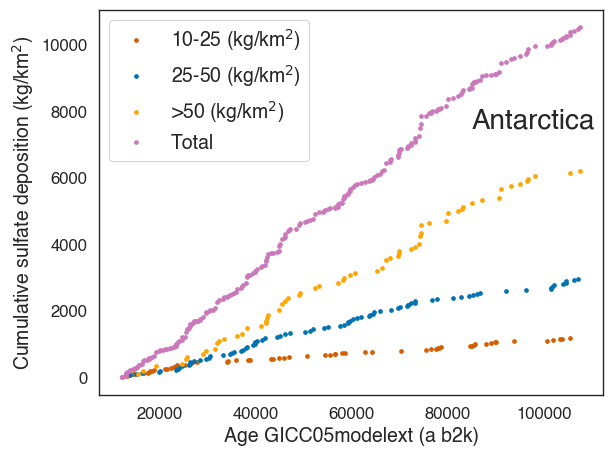

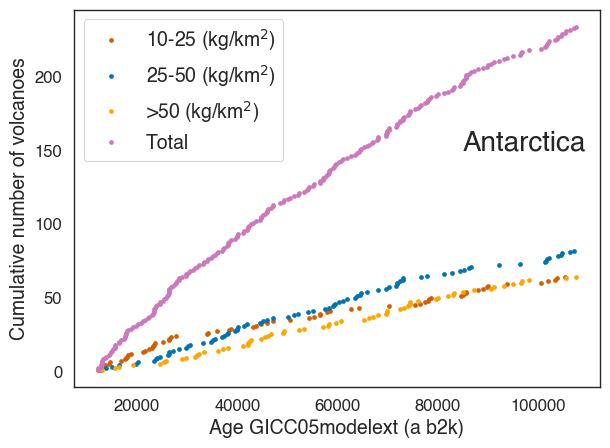

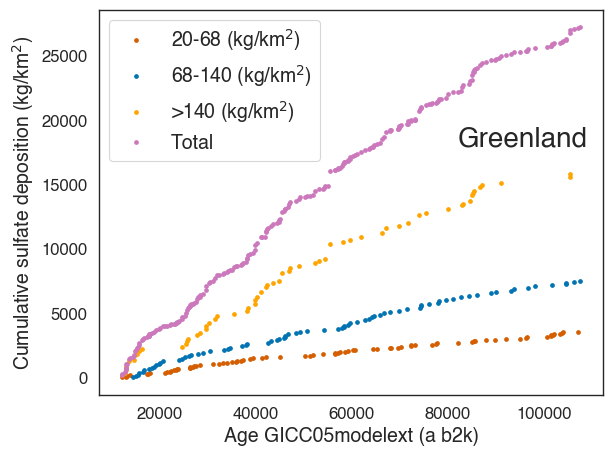

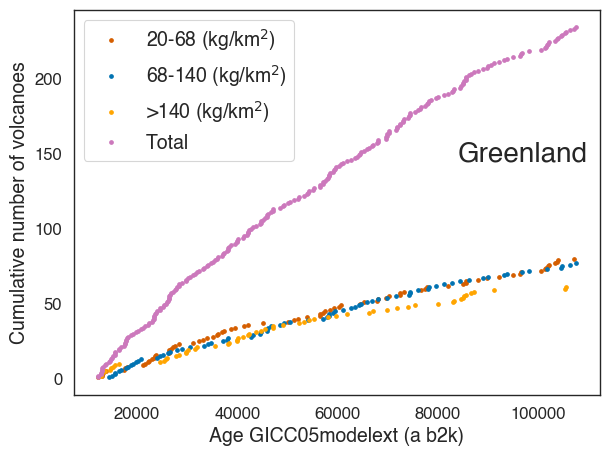

In [596]:
cdf_A_a = [A_age_10, A_age_25, A_age_50]
cdf_A_d = [A_dep_10, A_dep_25, A_dep_50]

cdf_G_a = [G_age_20, G_age_68, G_age_140]
cdf_G_d = [G_dep_20, G_dep_68, G_dep_140]

cdf_G_no = [np.ones(len(G_dep_20)), np.ones(len(G_dep_68)), np.ones(len(G_dep_140))]
cdf_A_no = [np.ones(len(A_dep_10)), np.ones(len(A_dep_25)), np.ones(len(A_dep_50))]

cdf_A_tot_no = np.ones(len(bp_Antarctica_dep))
cdf_G_tot_no = np.ones(len(bp_Greenland_dep))

label_G = [r'20-68 (kg/km$^2$)', r'68-140 (kg/km$^2$)', r'>140 (kg/km$^2$)']
label_A = [r'10-25 (kg/km$^2$)', r'25-50 (kg/km$^2$)', r'>50 (kg/km$^2$)']

colors = ['r', 'b', 'orange', 'm']
fs = 14
fst = 12
fsl = 14
ls = 12

plt.figure(figsize=(6.5,5))
for i in range(3):
    cdf = np.cumsum(cdf_A_d[i])
    plt.plot(cdf_A_a[i], cdf, '.', color = colors[i], label = label_A[i])
plt.plot(bipolar_age2, np.cumsum(bp_Antarctica_dep), '.', color= colors[-1], label ='Total')
plt.xlabel('Age GICC05modelext (a b2k)', fontsize= fs)
plt.ylabel(r'Cumulative sulfate deposition (kg/km$^2$)', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.legend(fontsize=fsl)
plt.tick_params(labelsize=ls)
plt.text(85*1e3,7.5*1e3, 'Antarctica', fontsize=20, backgroundcolor='white')

plt.figure(figsize=(6.79,4.9))
for i in range(3):
    cdf = np.cumsum(cdf_A_no[i])
    plt.plot(cdf_A_a[i], cdf, '.', color = colors[i],  label = label_A[i])
plt.plot(bipolar_age2, np.cumsum(cdf_A_tot_no ), '.',  color= colors[-1], label ='Total')
plt.xlabel('Age GICC05modelext (a b2k)', fontsize= fs)
plt.ylabel('Cumulative number of volcanoes', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.legend(fontsize=fsl)
plt.tick_params(labelsize=ls)
plt.text(85*1e3,150, 'Antarctica', fontsize=20, backgroundcolor='white')

plt.figure(figsize=(6.5,5))
for i in range(3):
    cdf = np.cumsum(cdf_G_d[i])
    plt.plot(cdf_G_a[i], cdf, '.', color = colors[i],  label = label_G[i])
plt.plot(bipolar_age, np.cumsum(bp_Greenland_dep), '.', color= colors[-1], label ='Total')
plt.xlabel('Age GICC05modelext (a b2k)', fontsize= fs)
plt.ylabel(r'Cumulative sulfate deposition (kg/km$^2$)', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.legend(fontsize=fsl)
plt.tick_params(labelsize=ls)
plt.text(82*1e3,18*1e3, 'Greenland', fontsize=20)

plt.figure(figsize=(6.79,5))
for i in range(3):
    cdf = np.cumsum(cdf_G_no[i])
    plt.plot(cdf_G_a[i], cdf, '.', color = colors[i],  label = label_G[i])
plt.plot(bipolar_age, np.cumsum(cdf_G_tot_no), '.', color= colors[-1], label ='Total')
plt.xlabel('Age GICC05modelext (a b2k)', fontsize= fs)
plt.ylabel('Cumulative number of volcanoes', fontsize=fs)
plt.xticks(fontsize=fst)
plt.yticks(fontsize=fst)
plt.legend(fontsize=fsl)
plt.tick_params(labelsize=ls)
plt.text(84*1e3,145, 'Greenland', fontsize=20, backgroundcolor='white')

## Average millenial frequency of eruptions for different time periods

In [597]:
def interstadials(age, dep): 
    
    GI_age = []
    GI_dep = []
    
    age = np.array(age)
    dep = np.array(dep)
    
    for i in range(len(GL_onset)):
        idx = np.where( (age > GL_end[i]) & (age < GL_onset[i])) #indices where bipolar age is in GI
        GI_age.append(age[idx])
        GI_dep.append(dep[idx])

    return GI_age, GI_dep

GI_age_20, GI_dep_G_20= interstadials(G_age_20, G_dep_20)
GI_age_68, GI_dep_G_68= interstadials(G_age_68, G_dep_68)
GI_age_140, GI_dep_G_140= interstadials(G_age_140, G_dep_140)

GI_age_10, GI_dep_A_10= interstadials(A_age_10, A_dep_10)
GI_age_25, GI_dep_A_25= interstadials(A_age_25, A_dep_25)
GI_age_50, GI_dep_A_50= interstadials(A_age_50, A_dep_50)

def stadials(age, dep): 
    
    GS_age = []
    GS_dep = []
    
    age = np.array(age)
    dep = np.array(dep)
    
    for i in range(1,len(GL_onset)):
        idx = np.where( (age < GL_end[i]) & (age > GL_onset[i-1])) #indices where bipolar age is in GS
        GS_age.append(age[idx])
        GS_dep.append(dep[idx])

    return GS_age, GS_dep

GS_age_20, GS_dep_G_20= stadials(G_age_20, G_dep_20)
GS_age_68, GS_dep_G_68= stadials(G_age_68, G_dep_68)
GS_age_140, GS_dep_G_140= stadials(G_age_140, G_dep_140)

GS_age_10, GS_dep_A_10= stadials(A_age_10, A_dep_10)
GS_age_25, GS_dep_A_25= stadials(A_age_25, A_dep_25)
GS_age_50, GS_dep_A_50= stadials(A_age_50, A_dep_50)


G_age_20 = np.array(G_age_20)
G_age_68 = np.array(G_age_68)
G_age_140 = np.array(G_age_140)

A_age_10 = np.array(A_age_10)
A_age_25 = np.array(A_age_25)
A_age_50 = np.array(A_age_50)

GL_age_20 = G_age_20[G_age_20 > 21*1e3]
GL_age_68 = G_age_68[G_age_68 > 21*1e3]
GL_age_140 = G_age_140[G_age_140 > 21*1e3]

GL_age_10 = A_age_10[A_age_10 > 21*1e3]
GL_age_25 = A_age_25[A_age_25 > 21*1e3]
GL_age_50 = A_age_50[A_age_50 > 21*1e3]

de_age_20 = G_age_20[G_age_20 < 21*1e3]
de_age_68 = G_age_68[G_age_68 < 21*1e3]
de_age_140 = G_age_140[G_age_140 < 21*1e3]

de_age_10 = A_age_10[A_age_10 < 21*1e3]
de_age_25 = A_age_25[A_age_25 < 21*1e3]
de_age_50 = A_age_50[A_age_50 < 21*1e3]


In [598]:
def count_eruptions(age, type):
    
    
    if (type == 'de'):
        
        de = np.arange(12*1e3,16*1e3,1e3)
        mill_len = np.zeros(len(de))

        for i in range(1,len(de)):
            
            idx = np.where ( (age >= de[i-1]) & (age <= de[i]))
            
            if len(idx) == 0:
                mill_len[i] = 0
            else:
                mill_len[i] = len(idx[0])
        
        #print('de=', mill_len, np.nanmean(mill_len), namestring(age, globals()))
            
        return np.nanmean(mill_len)
    
    if (type == 'GL'):
    
        GL = np.arange(16*1e3,109*1e3,1e3)
        mill_len = np.zeros(len(GL))
        
        for i in range(1,len(GL)):
            
            idx = np.where( (age >= GL[i-1]) & (age <= GL[i]) )
            
            if len(idx) == 0: 
                #print('No eruptions')
                mill_len[i] = 0
            else:
                mill_len[i] = len(idx[0])
        
        #print('GL =', mill_len, np.nanmean(mill_len),  namestring(age, globals()))
        
        return np.nanmean(mill_len)
    
    
    if (type == 'GI'): ## should only take average when it is actually in a stadial/interstadial 
        
        length_interstadials = []
        new_time_erup = [0]
        
        for i in range(1,len(GL_onset)-2): # we skip the holocene, eemian and the two last GS 
        
            len_interstadial =  GL_onset[i] - GL_end[i] ##length of the stadial 

            length_interstadials.append(len_interstadial)
            
        sum_len_interstadials = np.nansum(length_interstadials) ##sum of length of all stadials 
        
        new_time = np.arange(0, sum_len_interstadials + 1000, 1000) #this is correct 
        new_age = np.array([0])
        diff_to_onset =  np.array([0])
        mill_len = np.zeros(len(new_time))
        
        for i in range(1, len(GL_onset) - 2):
            
            #print(GL_onset[i], GL_end[i], age[i])
            
            if len(age[i]) != 0:
               
                if (i == 1): 
                    delta_t = (GL_onset[i] - age[i][-1])
                    new_age = np.concatenate( (new_age, ( (age[i] - GL_end[i]))  , delta_t ), axis=None)
                    
                elif (i > 1) and (len(new_age) > 1):   
                    
                    delta_t = (GL_onset[i] - age[i][-1])
                    erup = ( (age[i] - GL_end[i]) + new_age[-1] + new_age[-2])
                    new_age = new_age[:-1]
                    new_age = np.concatenate( (new_age, erup , delta_t ), axis=None)
            else:
                delta_t = new_age[-1] + (GL_onset[i] - GL_end[i])
                new_age = new_age[:-1]
                new_age = np.concatenate( (new_age, delta_t ), axis=None)

        for i in range(1,len(new_time)):
            idx = np.where( (new_age < new_time[i]) & (new_age > new_time[i-1]))
            mill_len[i] = len(idx[0])


        return np.nanmean(mill_len)
    
    if type == 'GS':
        
        length_stadials = []
        new_time_erup = [0]
        
        
        for i in range(0,len(GL_onset)-1):
            #print(GL_end[i+1], GL_onset[i], age[i])
            
            len_stadials = GL_end[i+1] - GL_onset[i]
            
            length_stadials.append(len_stadials)
  
        sum_len_stadials = np.nansum(length_stadials)
        
        new_time = np.arange(0,sum_len_stadials + 1000,1000)
        
        #print(new_time)
        
        new_age = np.array([0])
        diff_to_onset = np.array([0])
        mill_len = np.zeros(len(new_time))
        
        for i in range(0, len(GL_onset) - 2):
            
            #print(GL_end[i+1], GL_onset[i], age[i-1])
            
            if len(age[i-1]) != 0: 
                if i == 0: 
                    delta_t = (GL_end[i+1] - age[i-1][-1])
                    new_age = np.concatenate( (new_age, (age[i]) - GL_onset[i]), delta_t )
                    
                if (i >= 1) and (len(new_age) > 1):
                    delta_t = (GL_end[i+1] - age[i-1][-1])
                    erup = ( (age[i] - GL_onset[i]) + new_age[-1] + new_age[-2])
                    new_age = new_age[:-1]
                    new_age = np.concatenate( (new_age, erup , delta_t ), axis=None)
            
                else:
                    continue
                    
                    
            else: 
                if i == 0: 
                    delta_t = new_age[-1] + (GL_end[i+1] - GL_onset[i])
                    new_age = np.concatenate( (new_age, delta_t ), axis=None)
                else:
                    delta_t = new_age[-1] + (GL_end[i+1] - GL_onset[i])
                    new_age = new_age[:-1]
                    new_age = np.concatenate( (new_age, delta_t ), axis=None)
            
        for i in range(1,len(new_time)):
            idx = np.where( (new_age < new_time[i]) & (new_age > new_time[i-1]))
            mill_len[i] = len(idx[0])
    
        

        return np.nanmean(mill_len)

In [599]:
##iterstadials
mean_mill_len_GI_20 = count_eruptions(GI_age_20, 'GI')
mean_mill_len_GI_68 = count_eruptions(GI_age_68, 'GI')
mean_mill_len_GI_140 = count_eruptions(GI_age_140, 'GI')

mean_mill_len_GI_10 = count_eruptions(GI_age_10, 'GI')
mean_mill_len_GI_25 = count_eruptions(GI_age_25, 'GI')
mean_mill_len_GI_50 = count_eruptions(GI_age_50, 'GI')

## stadials 
mean_mill_len_GS_20 = count_eruptions(GS_age_20, 'GS')
mean_mill_len_GS_68 = count_eruptions(GS_age_68, 'GS')
mean_mill_len_GS_140 = count_eruptions(GS_age_140, 'GS')

mean_mill_len_GS_10 = count_eruptions(GS_age_10, 'GS')
mean_mill_len_GS_25 = count_eruptions(GS_age_25, 'GS')
mean_mill_len_GS_50 = count_eruptions(GS_age_50, 'GS')

## glacial
mean_mill_len_GL_20 = count_eruptions(GL_age_20, 'GL')
mean_mill_len_GL_68 = count_eruptions(GL_age_68, 'GL')
mean_mill_len_GL_140 = count_eruptions(GL_age_140, 'GL')

mean_mill_len_GL_10 = count_eruptions(GL_age_10, 'GL')
mean_mill_len_GL_25 = count_eruptions(GL_age_25, 'GL')
mean_mill_len_GL_50 = count_eruptions(GL_age_50, 'GL')

## deglacial
mean_mill_len_de_20 = count_eruptions(de_age_20, 'de')
mean_mill_len_de_68 = count_eruptions(de_age_68, 'de')
mean_mill_len_de_140 = count_eruptions(de_age_140, 'de')

mean_mill_len_de_10 = count_eruptions(de_age_10, 'de')
mean_mill_len_de_25 = count_eruptions(de_age_25, 'de')
mean_mill_len_de_50 = count_eruptions(de_age_50, 'de')

mean_mill_A = np.array([[mean_mill_len_de_10, mean_mill_len_GL_10,mean_mill_len_GI_10 ,mean_mill_len_GS_10], [mean_mill_len_de_25, mean_mill_len_GL_25,mean_mill_len_GI_25, mean_mill_len_GS_25], [mean_mill_len_de_50, mean_mill_len_GL_50,mean_mill_len_GI_50, mean_mill_len_GS_50]])
mean_mill_G = np.array([[mean_mill_len_de_20, mean_mill_len_GL_20,mean_mill_len_GI_20, mean_mill_len_GS_20], [mean_mill_len_de_68, mean_mill_len_GL_68,mean_mill_len_GI_68, mean_mill_len_GS_68], [mean_mill_len_de_140, mean_mill_len_GL_140,mean_mill_len_GI_140, mean_mill_len_GS_140]])


label_G = ['DG', 'G',  'GI', 'GS']
label_A = ['DG', 'G',  'GI', 'GS']

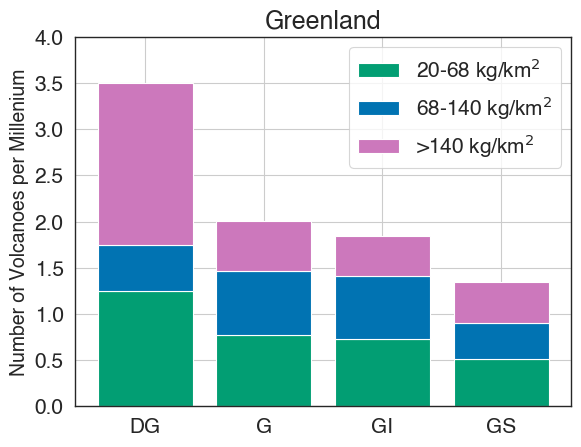

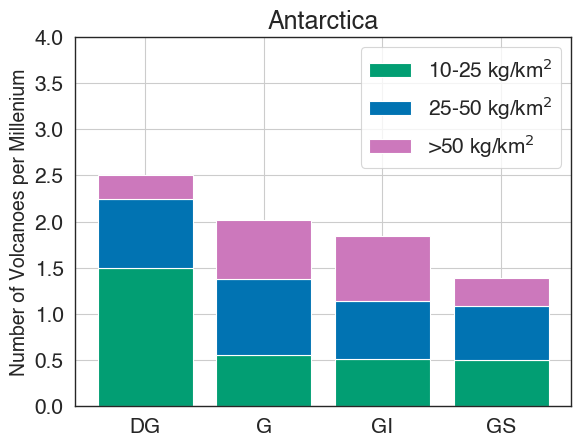

In [600]:
%matplotlib inline
xt = 15
yt = 15
lt = 15
tt = 18
lz=12

plt.figure()
plt.title('Greenland', fontsize=tt)
plt.bar(label_G, mean_mill_G[0], color='g', label = r'20-68 kg/km$^{2}$')
plt.bar(label_G, mean_mill_G[1], color='b', bottom=mean_mill_G[0], label = r'68-140 kg/km$^{2}$')
plt.bar(label_G, mean_mill_G[2],color = 'm', bottom = mean_mill_G[1]+mean_mill_G[0], label = r'>140 kg/km$^{2}$')
plt.ylim(0,4)
plt.ylabel('Number of Volcanoes per Millenium', fontsize=14)
plt.xticks(fontsize=xt)
plt.yticks(fontsize=yt)
plt.legend(fontsize=lt)
plt.grid()
#plt.tick_params(labelsize=lz)

plt.figure()
plt.title('Antarctica', fontsize=tt)
plt.bar(label_A, mean_mill_A[0], color='g', label = r'10-25 kg/km$^{2}$')
plt.bar(label_A, mean_mill_A[1], color='b', bottom=mean_mill_A[0], label = r'25-50 kg/km$^{2}$')
plt.bar(label_A, mean_mill_A[2],color = 'm', bottom = mean_mill_A[1]+mean_mill_A[0], label = r'>50 kg/km$^{2}$')
plt.ylim(0,4)
plt.ylabel('Number of Volcanoes per Millenium', fontsize=14)
plt.xticks(fontsize=xt)
plt.yticks(fontsize=yt)
plt.legend(fontsize=lt)
plt.grid()
#plt.tick_params(labelsize=lz)




## Looking at bipolar eruptions at onset of DO-events

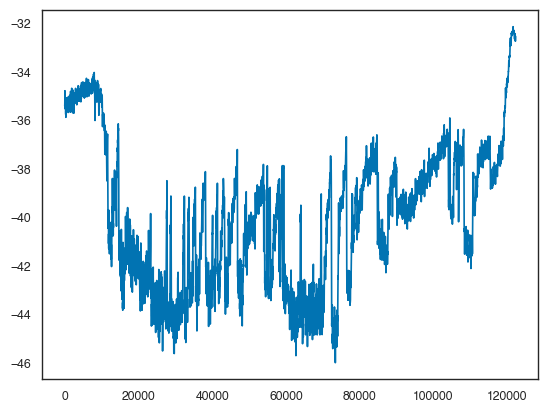

In [601]:
%store -r NGRIP_dO18
%store -r NGRIP_dO18_age
%store -r NGRIP_dO18_depth

NGRIP_dO18 = dtype_float64(NGRIP_dO18)
NGRIP_dO18_age = dtype_float64(NGRIP_dO18_age)
NGRIP_d18O_smooth = savgol_filter(NGRIP_dO18, 3, 1)

plt.figure()
plt.plot(NGRIP_dO18_age, NGRIP_d18O_smooth)

In [602]:
GL_onset = GL_onset[1:]
GL_periods = GL_periods[1:]

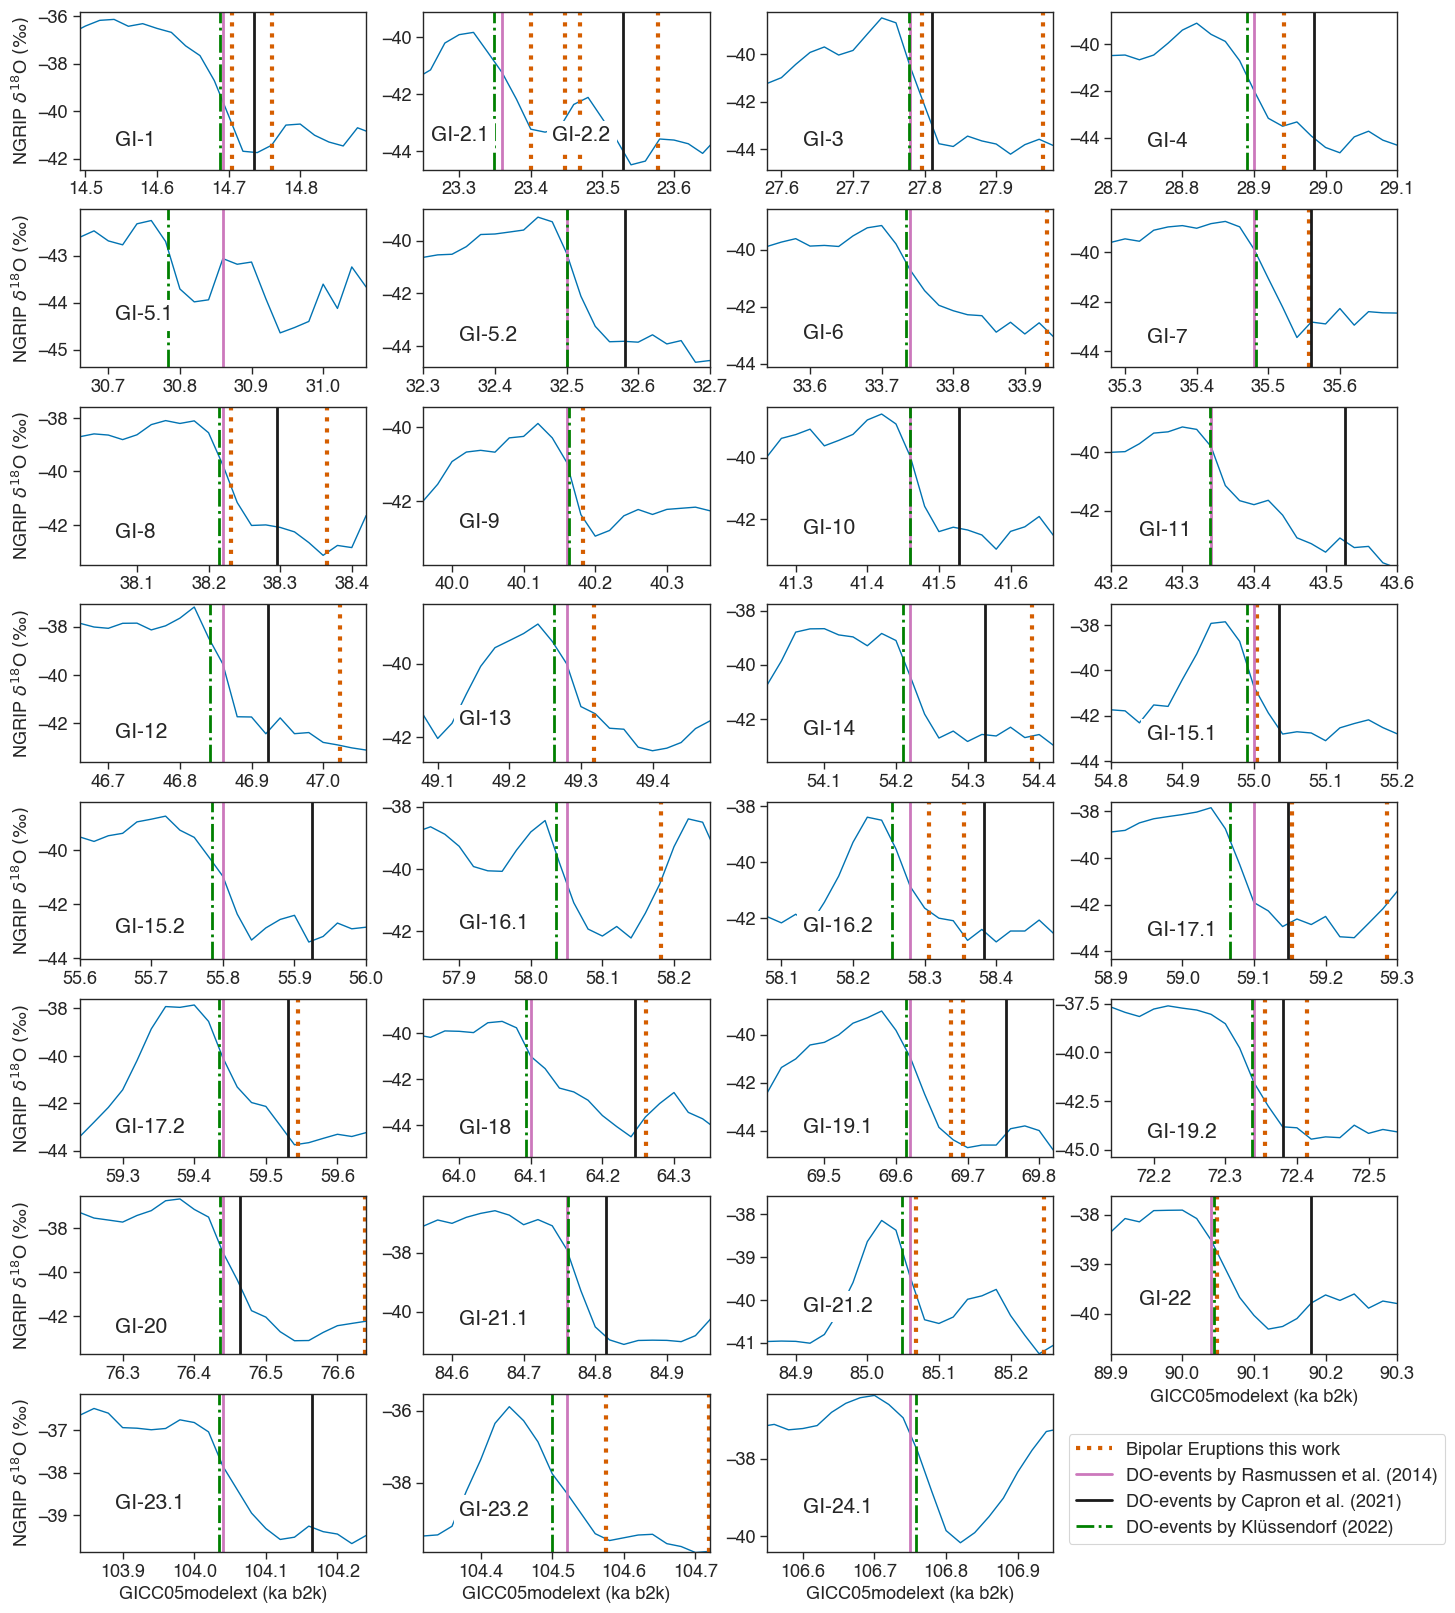

In [603]:
xticks = np.arange(11*1e3, 120*1e3, 1e2)


%matplotlib inline

rows = 8
cols = 4

fig, axes = plt.subplots(rows,cols, figsize=(17, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .25, wspace=.2)

axes = axes.ravel()


for j in range(len(axes)-1):

    #plt.plot(NGRIP_dO18_age, NGRIP_dO18)
 
    axes[j].plot(NGRIP_dO18_age/1e3, NGRIP_d18O_smooth, linewidth=1.0)
    #axes[j].plot(NGRIP_dO18_age, NGRIP_dO18, linewidth=0.8)
    
    if j % 4 == 0: 
        axes[j].set_ylabel(r'NGRIP $\delta^{18}$O $(‰)$', fontsize= 13)
        
    if (j == len(axes) -4) or (j == len(axes) -5) or (j == len(axes) -3) or (j == len(axes) -2):
        axes[j].set_xlabel('GICC05modelext (ka b2k)', fontsize=13)
        
    #plt.plot(GISP2_d18O_age, GISP2_d18O)
    #for i in range(len(bipolar_age)):
     #   plt.axvline(x=bipolar_age[i])
    #eruptions = np.where( (bipolar_age >GL_onset[j]) & (bipolar_age < GL_onset[j] + 50) )
    #plt.axvline(bipolar_age[eruptions])
    #print(eruptions)
    for i in range(len(bipolar_age[bipolar_age>GL_onset[j]])):
        if (i ==15) and (j==7):
            axes[j].axvline(bipolar_age[bipolar_age>GL_onset[j]][i]/1e3, color='r', linestyle=':', linewidth=3, label ='Bipolar Eruptions this work')
        else:
            axes[j].axvline(bipolar_age[bipolar_age>GL_onset[j]][i]/1e3, color='r', linestyle=':', linewidth=3)
        
    #for i in range(len(eruptions)):
     #   if len(eruptions[0]) == 0:
      #      continue
      #  else:
       #     plt.axvline(x=bipolar_age[eruptions][i])
    lim_x = .2
    idx_lim = np.where((NGRIP_dO18_age < GL_onset[j] + lim_x*1e3 ) & ((NGRIP_dO18_age > GL_onset[j] - lim_x*1e3 )) )
    
    if len(idx_lim[0]) == 0: 
        continue
    else:
        axes[j].set_ylim(np.nanmin(NGRIP_dO18[ idx_lim ]), np.nanmax(NGRIP_dO18[ idx_lim ]))
    #print(idx_lim )
    
  
    l2 = axes[j].axvline(GL_onset[j]/1e3, c='m', linestyle='-', linewidth=2, label='DO-events by Rasmussen et al. (2014)')
   
    #axes[j].axvline(GL_onset[j]+50, c='g', linestyle='--', , linewidth=2)
    
    for i in range(len(capron_DO)):
        if (i == 6) and (j==7):
            axes[j].axvline(capron_DO[i]/1e3, color='k', linestyle='-', linewidth=2, label = 'DO-events by Capron et al. (2021)')
            #axes[j].axvspan(capron_DO[i]/1e3, (capron_DO[i]/1e3)+.05, alpha=0.15, hatch='////', facecolor='limegreen', label = 'DO-events by Capron et al. (2021) + 50yrs')
            #axes[j].axvspan(capron_DO[i]/1e3, capron_DO[i]/1e3+.02, alpha=0.30, hatch='////', facecolor='grey', label = 'DO-events by Capron et al. (2021) + 20yrs')
        else:
            axes[j].axvline(capron_DO[i]/1e3, color='k', linestyle='-', linewidth=2)
            #axes[j].axvspan(capron_DO[i]/1e3, (capron_DO[i]/1e3)+.05, alpha=0.15, hatch='////',facecolor='limegreen')
            #axes[j].axvspan(capron_DO[i]/1e3, capron_DO[i]/1e3+.02, alpha=0.30, hatch='////', facecolor='grey')
    
            
        #axes[j].axvspan(capron_DO[i]/1e3, capron_DO[i]/1e3-.03, alpha=0.20, hatch='////', facecolor='grey')
        #axes[j].axvspan(capron_DO[i]/1e3, capron_DO[i]/1e3-.05, alpha=0.15, hatch='////', facecolor='grey')
        
    for k in range(len(anna_DO)):
        if (k == 8) and (j==7):
            axes[j].axvline(anna_DO[k]/1e3, color='green', linestyle='-.', label='DO-events by Klüssendorf (2022)', linewidth=2)
            axes[j].legend( bbox_to_anchor=(1.2, -6.7),
          ncol=1, fancybox=True, shadow=False, fontsize=13)
        else:
            axes[j].axvline(anna_DO[k]/1e3, color='green', linestyle='-.', linewidth=2)

    if j == 1:
        axes[j].set_xlim(23450/1e3-lim_x, 23450/1e3+lim_x)
        axes[j].text(GL_onset[j]/1e3-.1,np.nanmin(NGRIP_dO18[ idx_lim ]) + 1, 'GI-2.1', bbox=dict(facecolor='white', alpha=1), fontsize = 15)
        axes[j].text(GL_onset[j]/1e3+0.07,np.nanmin(NGRIP_dO18[ idx_lim ]) + 1, 'GI-2.2', bbox=dict(facecolor='white', alpha=1), fontsize = 15)
            
    elif j == 11:
        axes[j].set_xlim(43400/1e3-lim_x, 43400/1e3+lim_x)
        axes[j].text(GL_onset[j]/1e3-.1,np.nanmin(NGRIP_dO18[ idx_lim ]) + 1, GL_periods[j], bbox=dict(facecolor='white', alpha=1), fontsize = 15)
        
    elif j == 27:
        axes[j].set_xlim(90100/1e3-lim_x, 90100/1e3+lim_x)
        axes[j].text(GL_onset[j]/1e3-.1,np.nanmin(NGRIP_dO18[ idx_lim ]) + 1, GL_periods[j], bbox=dict(facecolor='white', alpha=1), fontsize = 15)
        
    elif j == 21:
        axes[j].set_xlim(64150/1e3-lim_x,64150/1e3+lim_x)
        axes[j].text(GL_onset[j]/1e3-.1,np.nanmin(NGRIP_dO18[ idx_lim ]) + 1, GL_periods[j], bbox=dict(facecolor='white', alpha=1), fontsize = 15)
    else:
        
    
        axes[j].set_xlim(GL_onset[j]/1e3-lim_x, GL_onset[j]/1e3+lim_x)
        axes[j].text(GL_onset[j]/1e3-.15,np.nanmin(NGRIP_dO18[ idx_lim ]) + 1, GL_periods[j], bbox=dict(facecolor='white', alpha=1), fontsize = 15)
    
    #axes[j].yaxis.set_tick_params(labelsize=13,size=10,width=2, direction='in', top=False, length=10)
    #axes[j].xaxis.set_tick_params(labelsize=13,size=10,width=2, direction='in', top=False)
    
    axes[j].tick_params(which = 'both', tick1On=True, labelsize=13)
    
    #axes[j].set_ylim(-45,-35)
    
    #axes[j].axvspan(GL_onset[j], GL_onset[j]+50, alpha=0.15, hatch='////', facecolor='grey')
    #axes[j].axvspan(GL_onset[j], GL_onset[j]+30, alpha=0.20, hatch='////', facecolor='grey')
    #axes[j].axvspan(GL_onset[j], GL_onset[j]-30, alpha=0.20, hatch='////', facecolor='grey')
    #axes[j].axvspan(GL_onset[j], GL_onset[j]-50, alpha=0.15, hatch='////', facecolor='grey')
    #axes[j].set_xticks(xticks[np.where( (xticks > GL_onset[j]-lim_x) & (xticks < GL_onset[j]+lim_x) )], xticks[np.where( (xticks > GL_onset[j]-lim_x) & (xticks < GL_onset[j]+lim_x) )].astype(int))

 

    #axes[len(axes)-2].axis('off')
    

    axes[len(axes)-1].axis('off')

#labels = ['hej']
#fig.legend([l6], loc="upper right", labels=labels )
  

plt.show()

In [604]:
rasmussen_20yrs = GL_onset + 20 #Rasmussen et al., 2014
rasmussen_50yrs = GL_onset + 50
strat_rasm = []
age_rasm = []
GI_rasm = []

num_R_20 = 0 
num_R_50 = 0
for i in range(len(GL_onset)):
    idx_20 = np.where( (bipolar_age < rasmussen_20yrs[i]) & (bipolar_age > GL_onset[i]) )
    if len(idx_20[0]) != 0:
        num_R_20 += len(idx_20[0])
        print('age 20=', bipolar_age[idx_20], 'strat =', strat_load[idx_20], 'period =', GL_periods[i])
print('')
for i in range(len(GL_onset)):
    idx_50 = np.where( (bipolar_age < rasmussen_50yrs[i]) & (bipolar_age > GL_onset[i]) )
    if len(idx_50[0]) != 0:
        num_R_50 += len(idx_50[0])
        strat_rasm.append(strat_load[idx_50][0])
        age_rasm.append(bipolar_age[idx_50][0])
        GI_rasm.append(GL_periods[i])
        print('age 50 =', bipolar_age[idx_50], 'strat =', strat_load[idx_50], 'period =', GL_periods[i])

num_R_20, num_R_50

age 20= [14704.65306122] strat = [104.39241653] period = GI-1
age 20= [27796.66666667] strat = [172.04738626] period = GI-3
age 20= [38231.57894737] strat = [125.4795081] period = GI-8
age 20= [55004.8] strat = [46.17056915] period = GI-15.1
age 20= [72354.95238095] strat = [62.99804145] period = GI-19.2
age 20= [85068.14814815] strat = [358.35916235] period = GI-21.2
age 20= [90047.82608696] strat = [75.65807917] period = GI-22

age 50 = [14704.65306122] strat = [104.39241653] period = GI-1
age 50 = [23400.51282051] strat = [42.88600781] period = GI-2
age 50 = [27796.66666667] strat = [172.04738626] period = GI-3
age 50 = [28941.76470588] strat = [157.11452348] period = GI-4
age 50 = [38231.57894737] strat = [125.4795081] period = GI-8
age 50 = [40183.15789474] strat = [163.81376362] period = GI-9
age 50 = [49318.70967742] strat = [173.42596453] period = GI-13
age 50 = [55004.8] strat = [46.17056915] period = GI-15.1
age 50 = [58306.15384615] strat = [137.02370322] period = GI-16.2
ag

(7, 12)

In [605]:
capron_20yrs = capron_DO + 20 ## Capron et al., 2021
capron_50yrs = capron_DO + 50
strat_cap = []
age_cap = []
GI_cap= []

num_C_20 = 0 
num_C_50 = 0
for i in range(len(capron_DO)):
    idx_20 = np.where( (bipolar_age < capron_20yrs[i]) & (bipolar_age > capron_DO[i]) )
    if len(idx_20[0]) != 0:
        num_C_20 += len(idx_20[0])
        print('age 20=', bipolar_age[idx_20], 'strat =', strat_load[idx_20], 'period =', capron_periods[i])
print('')
for i in range(len(capron_DO)):
    idx_50 = np.where( (bipolar_age < capron_50yrs[i]) & (bipolar_age > capron_DO[i]) )
    if len(idx_50[0]) != 0:
        num_C_50 += len(idx_50[0])
        strat_cap.append(strat_load[idx_50][0])
        age_cap.append(bipolar_age[idx_50][0])
        GI_cap.append(capron_periods[i])
        print('age 50 =', bipolar_age[idx_50], 'strat =', strat_load[idx_50], 'period =', capron_periods[i])

num_C_20, num_C_50, strat_cap

age 20= [59153.6] strat = [115.69708931] period = GI-17.1c 
age 20= [59545.14285714] strat = [158.77678097] period = GI-17.2 
age 20= [64261.33333333] strat = [84.02972824] period = GI-18 

age 50 = [14760.91525424] strat = [190.17031385] period = GI-1e 
age 50 = [23578.06451613] strat = [71.56017794] period = GI-2.2 
age 50 = [59153.6] strat = [115.69708931] period = GI-17.1c 
age 50 = [59545.14285714] strat = [158.77678097] period = GI-17.2 
age 50 = [64261.33333333] strat = [84.02972824] period = GI-18 
age 50 = [72414.] strat = [125.8422648] period = GI-19.2 


(3,
 6,
 [190.1703138532494,
  71.56017793615838,
  115.69708931374839,
  158.77678097209514,
  84.02972824026835,
  125.84226480076387])

In [606]:
table = zip_longest(bipolar_age, strat_load)

print(tabulate(table))

--------  --------
 12170.4  150.132
 12240.7   87.8673
 12754.8   96.6849
 12917.3  177.055
 12961.3   53.8961
 12995.1   60.2828
 13028.2  214.132
 13211.8   58.8988
 13620.4  231.094
 13823.7   88.6685
 14499.8  119.833
 14704.7  104.392
 14760.9  190.17
 14966    113.423
 15296.5   84.9699
 15558.6  149.214
 15670.5   81.8078
 15682.5  111.399
 16333.9  144.034
 16468.9  216.314
 16818.2  105.06
 17426.8   69.0398
 17527.4   54.5783
 17664.7   19.6131
 17755.3   36.4662
 17857.5   73.7641
 17940.5   60.7146
 18296.3  104.601
 18832.6  110.256
 19296.2  232.327
 19806.5  107.393
 20136.3  115.005
 20785.8   92.2032
 21195.7   48.5892
 21586.7   48.6909
 22243.8   63.0321
 22421.5   80.1753
 22938.6   60.454
 23140.5   31.1583
 23400.5   42.886
 23448.1   38.0049
 23468.8   25.3836
 23578.1   71.5602
 23839.4   71.1949
 24081.3  119.852
 24649.3  142.691
 24668.9  161.886
 25248.6   88.1258
 25460.3  348.357
 25759.3  212.624
 25939.9  106.279
 26134.3  125.162
 26282.7  103.505
 263

In [607]:
klussendorf_20yrs = anna_DO + 20 ## Klüssendorf, 2022
klussendorf_50yrs = anna_DO + 50
strat_klu = []
age_klu = []
GI_klu= []

num_A_20 = 0 
num_A_50 = 0
for i in range(len(anna_DO)):
    idx_20 = np.where( (bipolar_age < klussendorf_20yrs[i]) & (bipolar_age > anna_DO[i]) )
    if len(idx_20[0]) != 0:
        num_A_20 += len(idx_20[0])
        print('age 20=', bipolar_age[idx_20], 'strat =', strat_load[idx_20], 'period =', GL_periods[i-1])
print('')
for i in range(len(anna_DO)):
    idx_50 = np.where( (bipolar_age < klussendorf_50yrs[i]) & (bipolar_age > anna_DO[i]) )
    if len(idx_50[0]) != 0:
        num_A_50 += len(idx_50[0])
        strat_klu.append(strat_load[idx_50][0])
        age_klu.append(bipolar_age[idx_50][0])
        GI_klu.append(GL_periods[i-1])
        print('age 50 =', bipolar_age[idx_50], 'strat =', strat_load[idx_50], 'period =', GL_periods[i-1])

num_A_20, num_A_50

age 20= [14704.65306122] strat = [104.39241653] period = GI-1
age 20= [27796.66666667] strat = [172.04738626] period = GI-3
age 20= [38231.57894737] strat = [125.4795081] period = GI-8
age 20= [40183.15789474] strat = [163.81376362] period = GI-9
age 20= [55004.8] strat = [46.17056915] period = GI-15.1
age 20= [72354.95238095] strat = [62.99804145] period = GI-19.2
age 20= [85068.14814815] strat = [358.35916235] period = GI-21.2
age 20= [90047.82608696] strat = [75.65807917] period = GI-22

age 50 = [14704.65306122] strat = [104.39241653] period = GI-1
age 50 = [27796.66666667] strat = [172.04738626] period = GI-3
age 50 = [38231.57894737] strat = [125.4795081] period = GI-8
age 50 = [40183.15789474] strat = [163.81376362] period = GI-9
age 50 = [55004.8] strat = [46.17056915] period = GI-15.1
age 50 = [72354.95238095] strat = [62.99804145] period = GI-19.2
age 50 = [85068.14814815] strat = [358.35916235] period = GI-21.2
age 50 = [90047.82608696] strat = [75.65807917] period = GI-22


(8, 8)

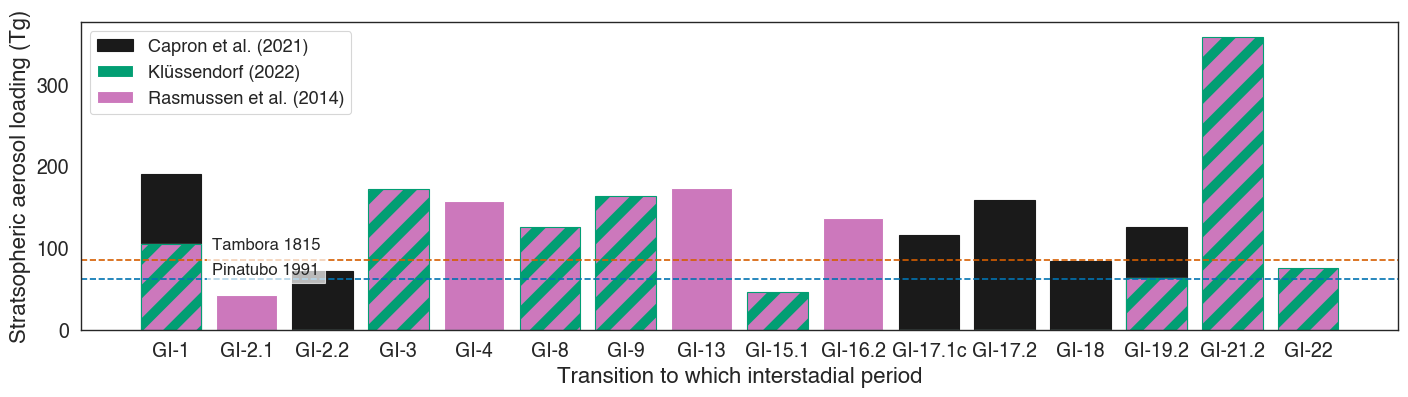

In [608]:
plt.rc('hatch', color='m', linewidth=7)
periods_array = np.array(['GI-1', 'GI-2.1', 'GI-2.2', 'GI-3', 'GI-4','GI-8', 'GI-9', 'GI-13', 'GI-15.1', 'GI-16.2', 'GI-17.1c','GI-17.2', 'GI-18','GI-19.2', 'GI-21.2', 'GI-22'])
strat_full_rasm = np.concatenate((strat_rasm[:2],0,strat_rasm[2:9],np.zeros(3),strat_rasm[-3:]), axis=None)
strat_full_cap = np.concatenate((strat_cap[0],0,strat_cap[1],np.zeros(7),strat_cap[2:6] ,np.zeros(2)),  axis=None)
strat_full_klu = np.concatenate((strat_klu[0],np.zeros(2),strat_klu[1], 0, strat_klu[2:4],0, strat_klu[4], np.zeros(4), strat_klu[-3:]), axis=None)
array_plot = np.arange(1,len(periods_array)+1,1)

fig, ax = plt.subplots(1,1,figsize=(17,4))

ax.bar(array_plot, strat_full_cap, color='k', alpha=1, label='Capron et al. (2021)',edgecolor='k')
ax.bar(array_plot, strat_full_klu, color='g',alpha=1, label='Klüssendorf (2022)')
ax.bar(array_plot, strat_full_rasm, color='m', label='Rasmussen et al. (2014)')
ax.bar(array_plot, strat_full_klu, color='g', hatch=r'/', alpha=1, facecolor='m', edgecolor='g')
ax.set_xticks(array_plot, periods_array)
ax.set_xlabel('Transition to which interstadial period', fontsize=16)
ax.set_ylabel('Stratsopheric aerosol loading (Tg)', fontsize=16)
ax.axhline(y=85, linestyle ='--', color='r')
ax.axhline(y=62.6, linestyle = '--', color='b')
#t = ax.text(0.03, 0.97, 'test', transform=ax.transAxes, fontsize=10, verticalalignment='top', `bbox=dict(facecolor='blue', alpha=0.5)`)
t = ax.text(0.1, 0.22, 'Pinatubo 1991', transform = ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=.7))
f = ax.text(0.1, 0.3, 'Tambora 1815', transform = ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=.7))
ax.legend(fontsize=13)
ax.tick_params(labelsize=14)
plt.show()


## Plot difference from lowering volcanic threshold 


In [609]:
def sort_eruptions(results_threshold, depth_bp, age_bp):
    
    RMAD_30_sort = np.sort(results_threshold[:,5])
    RMAD_30_sort_depth = []
    RMAD_30_sort_age = []
    RMAD_05_sort = []
    RMAD_10_sort = []
    RMAD_15_sort = [] 
    RMAD_20_sort = []
    RMAD_25_sort = []
    RMAD_35_sort = []
    RMAD_40_sort = []

    s1 = 0
    s2 = 0
    for i in range(len(RMAD_30_sort)):
        if RMAD_30_sort[i] == 0: 
            s1 += 1 
            RMAD_30_sort_depth = []
            RMAD_30_sort_age = []
            RMAD_05_sort = []
            RMAD_10_sort = []
            RMAD_15_sort = [] 
            RMAD_20_sort = []
            RMAD_25_sort = []
            RMAD_35_sort = []
            RMAD_40_sort = []
            idx = np.where(results_threshold[:,5] == RMAD_30_sort[i])
            RMAD_30_sort_depth.append(depth_bp[idx])
            RMAD_30_sort_age.append(age_bp[idx])
            RMAD_05_sort.append(results_threshold[:,0][idx])
            RMAD_10_sort.append(results_threshold[:,1][idx])
            RMAD_15_sort.append(results_threshold[:,2][idx])
            RMAD_20_sort.append(results_threshold[:,3][idx])
            RMAD_25_sort.append(results_threshold[:,4][idx])
            RMAD_35_sort.append(results_threshold[:,6][idx])
            RMAD_40_sort.append(results_threshold[:,7][idx])
            
        else: 
            s2 += 1 
            idx = np.where(results_threshold[:,5] == RMAD_30_sort[i])
            
            if len(idx[0]) > 1: 
                #print('depth bp = ', depth_bp[idx[0][0]])
                RMAD_30_sort_depth.append([depth_bp[idx[0][0]]])
                RMAD_30_sort_age.append([age_bp[idx[0][0]]])
                #print('10 sort idx = ', results_threshold[:,1][idx[0][0]]])
                RMAD_05_sort.append([results_threshold[:,0][idx[0][0]]])
                RMAD_10_sort.append([results_threshold[:,1][idx[0][0]]])
                RMAD_15_sort.append([results_threshold[:,2][idx[0][0]]])
                RMAD_20_sort.append([results_threshold[:,3][idx[0][0]]])
                RMAD_25_sort.append([results_threshold[:,4][idx[0][0]]])
                RMAD_35_sort.append([results_threshold[:,6][idx[0][0]]])
                RMAD_40_sort.append([results_threshold[:,7][idx[0][0]]])
                
            else:
                RMAD_30_sort_depth.append(depth_bp[idx])
                RMAD_30_sort_age.append(age_bp[idx])
               
                RMAD_05_sort.append(results_threshold[:,0][idx])
                RMAD_10_sort.append(results_threshold[:,1][idx])
                RMAD_15_sort.append(results_threshold[:,2][idx])
                RMAD_20_sort.append(results_threshold[:,3][idx])
                RMAD_25_sort.append(results_threshold[:,4][idx])
                RMAD_35_sort.append(results_threshold[:,6][idx])
                RMAD_40_sort.append(results_threshold[:,7][idx])

    RMAD_30_sort_depth = np.array(list(chain.from_iterable(RMAD_30_sort_depth)))
    RMAD_30_sort_age = np.array(list(chain.from_iterable(RMAD_30_sort_age)))
    RMAD_05_sort = np.array(list(chain.from_iterable(RMAD_05_sort)))
    RMAD_10_sort = np.array(list(chain.from_iterable(RMAD_10_sort)))
    RMAD_15_sort = np.array(list(chain.from_iterable(RMAD_15_sort)))
    RMAD_20_sort = np.array(list(chain.from_iterable(RMAD_20_sort)))
    RMAD_25_sort = np.array(list(chain.from_iterable(RMAD_25_sort)))
    RMAD_35_sort = np.array(list(chain.from_iterable(RMAD_35_sort)))
    RMAD_40_sort = np.array(list(chain.from_iterable(RMAD_40_sort)))
    
    
    return RMAD_30_sort_depth, RMAD_30_sort_age, RMAD_05_sort,  RMAD_10_sort,  RMAD_15_sort,  RMAD_20_sort,  RMAD_25_sort,  RMAD_30_sort,  RMAD_35_sort,  RMAD_40_sort

NGRIP_RMAD_30_sort_depth, NGRIP_RMAD_30_sort_age, NGRIP_RMAD_05_sort,  NGRIP_RMAD_10_sort,  NGRIP_RMAD_15_sort,  NGRIP_RMAD_20_sort,  NGRIP_RMAD_25_sort,  NGRIP_RMAD_30_sort,  NGRIP_RMAD_35_sort,  NGRIP_RMAD_40_sort = sort_eruptions(NGRIP_erup_all_RMAD, depth_bp_NGRIP, age_bp_NGRIP)
NEEM_RMAD_30_sort_depth, NEEM_RMAD_30_sort_age, NEEM_RMAD_05_sort,  NEEM_RMAD_10_sort,  NEEM_RMAD_15_sort,  NEEM_RMAD_20_sort,  NEEM_RMAD_25_sort,  NEEM_RMAD_30_sort,  NEEM_RMAD_35_sort,  NEEM_RMAD_40_sort = sort_eruptions(NEEM_erup_all_RMAD, depth_bp_NEEM, age_bp_NEEM)
GISP2_RMAD_30_sort_depth, GISP2_RMAD_30_sort_age, GISP2_RMAD_05_sort,  GISP2_RMAD_10_sort,  GISP2_RMAD_15_sort,  GISP2_RMAD_20_sort,  GISP2_RMAD_25_sort,  GISP2_RMAD_30_sort,  GISP2_RMAD_35_sort,  GISP2_RMAD_40_sort = sort_eruptions(GISP2_erup_all_RMAD, depth_bp_GISP2, age_bp_GISP2)
EDC_RMAD_30_sort_depth, EDC_RMAD_30_sort_age, EDC_RMAD_05_sort,  EDC_RMAD_10_sort,  EDC_RMAD_15_sort,  EDC_RMAD_20_sort,  EDC_RMAD_25_sort,  EDC_RMAD_30_sort,  EDC_RMAD_35_sort,  EDC_RMAD_40_sort = sort_eruptions(EDC_erup_all_RMAD, depth_bp_EDC, age_bp_EDC)
EDML_RMAD_30_sort_depth, EDML_RMAD_30_sort_age, EDML_RMAD_05_sort,  EDML_RMAD_10_sort,  EDML_RMAD_15_sort,  EDML_RMAD_20_sort,  EDML_RMAD_25_sort,  EDML_RMAD_30_sort,  EDML_RMAD_35_sort,  EDML_RMAD_40_sort = sort_eruptions(EDML_erup_all_RMAD, depth_bp_EDML, age_bp_EDML)

def error_from_original(RMAD_05_sort,  RMAD_10_sort,  RMAD_15_sort,  RMAD_20_sort,  RMAD_25_sort,  RMAD_30_sort,  RMAD_35_sort,  RMAD_40_sort):
    
    diff_05 = RMAD_05_sort - RMAD_30_sort
    diff_10 = RMAD_10_sort - RMAD_30_sort
    diff_15 = RMAD_15_sort - RMAD_30_sort
    diff_20 = RMAD_20_sort - RMAD_30_sort
    diff_25 = RMAD_25_sort - RMAD_30_sort
    diff_35 = RMAD_35_sort - RMAD_30_sort
    diff_40 = RMAD_40_sort - RMAD_30_sort
    
    diff = np.column_stack((diff_05, diff_10, diff_15, diff_20, diff_25, diff_35, diff_40))
    
    err_05 = np.zeros(len(diff_05))
    err_10 = np.zeros(len(diff_05))
    err_15 = np.zeros(len(diff_05))
    err_20 = np.zeros(len(diff_05))
    err_25 = np.zeros(len(diff_05))
    err_35 = np.zeros(len(diff_05))
    err_40 = np.zeros(len(diff_05))
 
    for i in range(len(diff_05)):
        if RMAD_30_sort[i] == 0: 
            err_05[i] = np.nan
            err_10[i] = np.nan
            err_15[i] = np.nan
            err_20[i] = np.nan
            err_25[i] = np.nan
            err_35[i] = np.nan
            err_40[i] = np.nan
        else:
            err_05[i] = (diff_05[i] /  RMAD_30_sort[i]) * 1e2
            err_10[i] = (diff_10[i] /  RMAD_30_sort[i]) * 1e2
            err_15[i] = (diff_15[i] /  RMAD_30_sort[i]) * 1e2
            err_20[i] = (diff_20[i] /  RMAD_30_sort[i]) * 1e2
            err_25[i] = (diff_25[i] /  RMAD_30_sort[i]) * 1e2
            err_35[i] = (diff_35[i] /  RMAD_30_sort[i]) * 1e2
            err_40[i] = (diff_40[i] /  RMAD_30_sort[i]) * 1e2
    
    err = np.column_stack((err_05, err_10, err_15, err_20, err_25, err_35, err_40))
    
    return diff, err

diff_NGRIP, err_NGRIP = error_from_original(NGRIP_RMAD_05_sort,  NGRIP_RMAD_10_sort,  NGRIP_RMAD_15_sort,  NGRIP_RMAD_20_sort,  NGRIP_RMAD_25_sort,  NGRIP_RMAD_30_sort,  NGRIP_RMAD_35_sort,  NGRIP_RMAD_40_sort)
diff_NEEM, err_NEEM = error_from_original(NEEM_RMAD_05_sort,  NEEM_RMAD_10_sort,  NEEM_RMAD_15_sort,  NEEM_RMAD_20_sort,  NEEM_RMAD_25_sort,  NEEM_RMAD_30_sort,  NEEM_RMAD_35_sort,  NEEM_RMAD_40_sort)
diff_GISP2, err_GISP2 = error_from_original(GISP2_RMAD_05_sort,  GISP2_RMAD_10_sort,  GISP2_RMAD_15_sort,  GISP2_RMAD_20_sort,  GISP2_RMAD_25_sort,  GISP2_RMAD_30_sort,  GISP2_RMAD_35_sort,  GISP2_RMAD_40_sort)
diff_EDC, err_EDC = error_from_original(EDC_RMAD_05_sort,  EDC_RMAD_10_sort,  EDC_RMAD_15_sort,  EDC_RMAD_20_sort,  EDC_RMAD_25_sort,  EDC_RMAD_30_sort,  EDC_RMAD_35_sort,  EDC_RMAD_40_sort)
diff_EDML, err_EDML = error_from_original(EDML_RMAD_05_sort,  EDML_RMAD_10_sort,  EDML_RMAD_15_sort,  EDML_RMAD_20_sort,  EDML_RMAD_25_sort,  EDML_RMAD_30_sort,  EDML_RMAD_35_sort,  EDML_RMAD_40_sort)

"\nplt.figure()\nfor i in range(len(diff_NGRIP[0,:])):\n    plt.plot(NGRIP_RMAD_30_sort[-10:], err_NGRIP[:,i][-10:], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')\n    plt.xlabel('Sulfate deposition with 3*RMAD threshold')\n    plt.ylabel('Error (%) from using 3*RMAD as threshold')\n    plt.title('NGRIP')\nfor i in range(len(NGRIP_RMAD_30_sort[-10:])):\n    plt.axvline(x=NGRIP_RMAD_30_sort[-10:][i], ymin=0, ymax=1, linewidth=.2)\nplt.legend()\n\nplt.figure()\nfor i in range(len(diff_NEEM[0,:])):\n    plt.plot(NEEM_RMAD_30_sort, err_NEEM[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')\n    plt.xlabel('Sulfate deposition with 3*RMAD threshold')\n    plt.ylabel('Error (%) from using 3*RMAD as threshold')\n    plt.title('NEEM')\n    plt.legend()\n\nplt.figure()\nfor i in range(len(diff_NEEM[0,:])):\n    plt.plot(NEEM_RMAD_30_sort[-10:], err_NEEM[:,i][-10:], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', lin

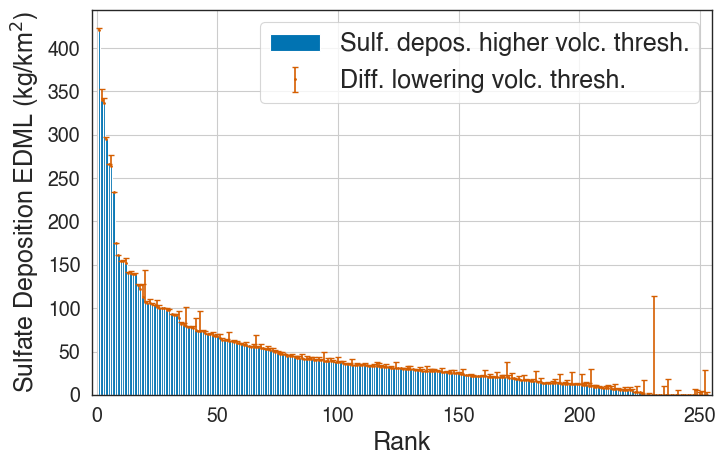

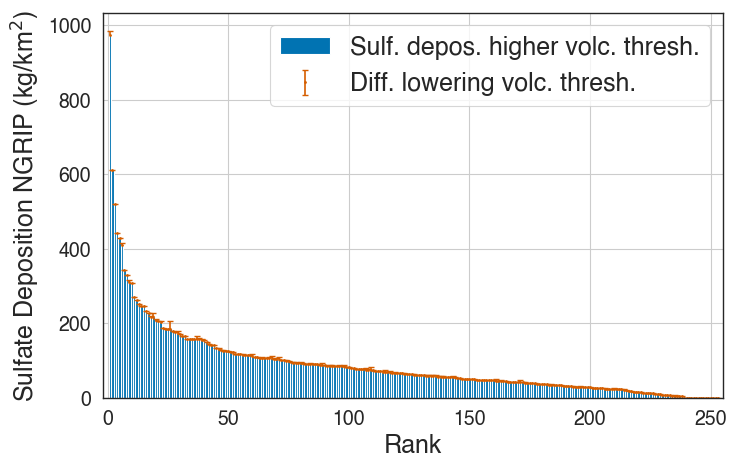

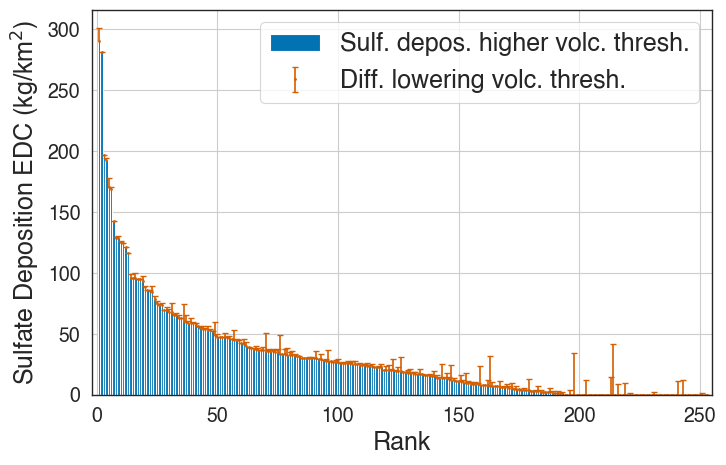

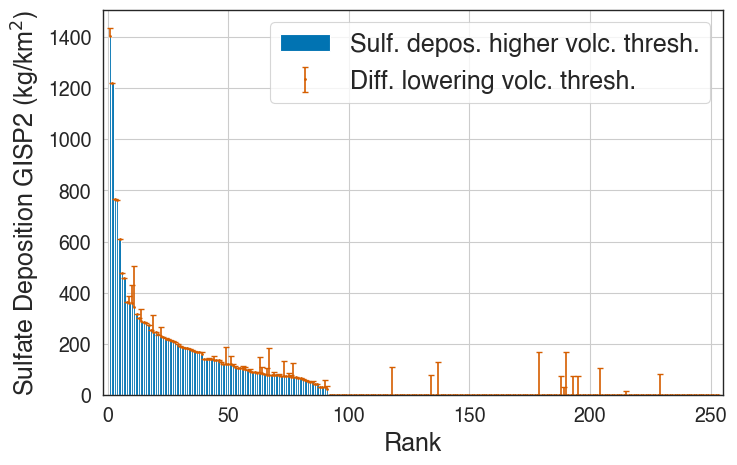

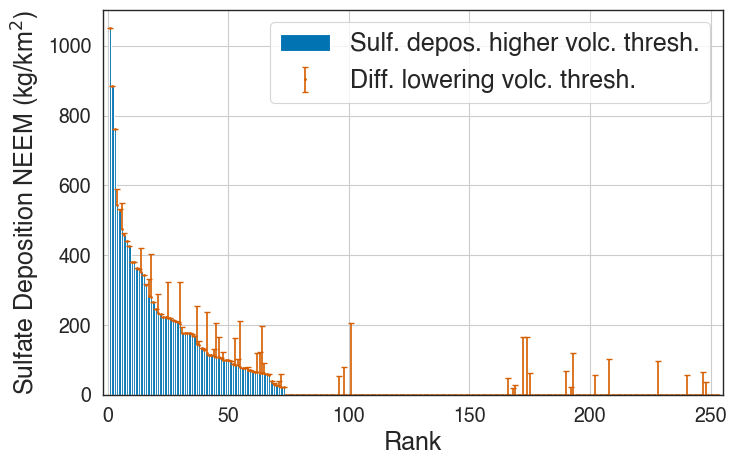

In [610]:

#%%capture#
%matplotlib inline
labels = [0.5, 1, 1.5, 2, 2.5, 3.5, 4]
x_array = np.arange(1,len(NGRIP_RMAD_30_sort) + 1,1)
x_array = x_array[::-1]
#plt.figure(figsize=(10,3))
#for i in range(len(diff_NGRIP[0,:])):
#    plt.bar(NGRIP_RMAD_30_sort, err_NGRIP[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', width=100)
#    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
#    plt.ylabel('Error (%) from using 3*RMAD as threshold')
#   plt.title('NGRIP')
#    plt.legend()
fz= 18
ts=14

plt.figure(figsize=(8,5))
plt.bar(x_array, EDML_RMAD_30_sort, width=1, color='b', label = 'Sulf. depos. higher volc. thresh.')
plotline2, caplines2, barlinecols2 = plt.errorbar(x_array, EDML_RMAD_30_sort, yerr=diff_EDML[:,3], fmt='.', lolims=True, capsize = 0, ls='None', color='r', markersize=2, label='Diff. lowering volc. thresh.')
caplines2[0].set_marker('_')
caplines2[0].set_markersize(5)
plt.xlabel('Rank', fontsize=fz)
plt.ylabel(r'Sulfate Deposition EDML (kg/km$^2$)', fontsize=fz)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
#plt.ylim(0,1300)
plt.xlim(-2,255)
plt.yscale('linear')
plt.grid('major')
plt.legend(fontsize=fz)

plt.figure(figsize=(8,5))
plt.bar(x_array, NGRIP_RMAD_30_sort, width=1, color='b', label = 'Sulf. depos. higher volc. thresh.')
plotline2, caplines2, barlinecols2 = plt.errorbar(x_array, NGRIP_RMAD_30_sort, yerr=diff_NGRIP[:,3], fmt='.', lolims=True, capsize = 0, ls='None', color='r', markersize=2, label='Diff. lowering volc. thresh.')
caplines2[0].set_marker('_')
caplines2[0].set_markersize(5)
plt.xlabel('Rank', fontsize=fz)
plt.ylabel(r'Sulfate Deposition NGRIP (kg/km$^2$)', fontsize=fz)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
#plt.ylim(0,500)
plt.xlim(-2,255)
plt.yscale('linear')
plt.grid('major')
plt.legend(fontsize=fz)

plt.figure(figsize=(8,5))
plt.bar(x_array, EDC_RMAD_30_sort, width=1, color='b', label = 'Sulf. depos. higher volc. thresh.')
plotline2, caplines2, barlinecols2 = plt.errorbar(x_array, EDC_RMAD_30_sort, yerr=diff_EDC[:,3], fmt='.', lolims=True, capsize = 0, ls='None', color='r', markersize=2, label='Diff. lowering volc. thresh.')
caplines2[0].set_marker('_')
caplines2[0].set_markersize(5)
plt.xlabel('Rank', fontsize=fz)
plt.ylabel(r'Sulfate Deposition EDC (kg/km$^2$)', fontsize=fz)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
#plt.ylim(0,500)
plt.xlim(-2,255)
plt.yscale('linear')
plt.grid('major')
plt.legend(fontsize=fz)


plt.figure(figsize=(8,5))
plt.bar(x_array, GISP2_RMAD_30_sort, width=1, color='b', label = 'Sulf. depos. higher volc. thresh.')
plotline2, caplines2, barlinecols2 = plt.errorbar(x_array, GISP2_RMAD_30_sort, yerr=diff_GISP2[:,3], fmt='.', lolims=True, capsize = 0, ls='None', color='r', markersize=2, label='Diff. lowering volc. thresh.')
caplines2[0].set_marker('_')
caplines2[0].set_markersize(5)
plt.xlabel('Rank', fontsize=fz)
plt.ylabel(r'Sulfate Deposition GISP2 (kg/km$^2$)', fontsize=fz)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
#plt.ylim(0,500)
plt.xlim(-2,255)
plt.yscale('linear')
plt.grid('major')
plt.legend(fontsize=fz)


plt.figure(figsize=(8,5))
plt.bar(x_array, NEEM_RMAD_30_sort, width=1, color='b', label = 'Sulf. depos. higher volc. thresh.')
plotline2, caplines2, barlinecols2 = plt.errorbar(x_array, NEEM_RMAD_30_sort, yerr=diff_NEEM[:,3], fmt='.', lolims=True, capsize = 0, ls='None', color='r', markersize=2, label='Diff. lowering volc. thresh.')
caplines2[0].set_marker('_')
caplines2[0].set_markersize(5)
plt.xlabel('Rank', fontsize=fz)
plt.ylabel(r'Sulfate Deposition NEEM (kg/km$^2$)', fontsize=fz)
plt.xticks(fontsize=ts)
plt.yticks(fontsize=ts)
#plt.ylim(0,500)
plt.xlim(-2,255)
plt.yscale('linear')
plt.grid('major')
plt.legend(fontsize=fz)

'''
for i in range(len(diff_NGRIP[1,:])):
    plt.figure()
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,3))
    fig.tight_layout(pad=3)
    ax1.scatter(NGRIP_RMAD_30_sort, err_NGRIP[:,i], c='r', label = 'k = ' + str(labels[i]) )
    ax2.scatter(NGRIP_RMAD_30_sort, diff_NGRIP[:,i], c='b', label = 'k = ' + str(labels[i]) )
    #plotline2, caplines2, barlinecols2 = plt.errorbar(x_array, NGRIP_RMAD_30_sort, yerr=diff_NGRIP[:,3], fmt='.', lolims=True, capsize = 0, ls='None', color='k', markersize=2)
    #caplines2[0].set_marker('_')
    #caplines2[0].set_markersize(10)
    #plt.fill_between(x_array, NGRIP_RMAD_30_sort + diff_NGRIP[:,3],NGRIP_RMAD_30_sort - diff_NGRIP[:,3], alpha=0.5, color='pink')
    #plt.bar(NGRIP_RMAD_30_sort, err_NGRIP[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', width=100)
    ax1.set_xlabel('Original sulfate deposition (kg/km$^{2}$) ', fontsize=fz)
    ax1.set_ylabel('Error (%) ', fontsize=fz)
    ax1.set_title('NGRIP')
    ax1.set_yscale('linear')
    ax1.set_xscale('linear')
    ax1.grid('minor')
    ax1.tick_params(axis='both', which='major', labelsize=ts)
    #plt.ylim(0,200)
    #ax1.set_xlim(-1,1300)
    ax1.legend(fontsize=fz)
    
    ax2.set_xlabel(r'Original sulfate deposition (kg/km$^{2}$) ', fontsize=fz)
    ax2.set_ylabel(r'Difference (kg/km$^{2}$)', fontsize=fz)
    ax2.set_title('NGRIP')
    ax2.set_yscale('symlog')
    ax2.grid('minor')
    #plt.ylim(0,200)
    ax2.set_xscale('symlog')
    #ax2.set_xlim(0,1300)
    ax2.legend(fontsize=fz)
    ax2.tick_params(axis='both', which='major', labelsize=ts)
    plt.show() 
'''
#plt.figure(figsize=(10,3))
#for i in range(len(diff_NGRIP[0,:])):
#plt.scatter(x_array,err_NGRIP[:,3])
#plotline2, caplines2, barlinecols2 = plt.errorbar(x_array, NGRIP_RMAD_30_sort, yerr=diff_NGRIP[:,3], fmt='o', lolims=True, capsize = 0, ls='None', color='k', markersize=2)
#caplines2[0].set_marker('_')
#caplines2[0].set_markersize(10)
#plt.fill_between(x_array, NGRIP_RMAD_20_sort, NGRIP_RMAD_30_sort)
#plt.bar(NGRIP_RMAD_30_sort, err_NGRIP[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', width=100)
#plt.xlabel('Sulfate deposition with 3*RMAD threshold')
#plt.ylabel('Error (%) from using 3*RMAD as threshold')
#plt.title('NGRIP')
#plt.yscale('symlog')
#plt.ylim(0,1300)
#plt.xlim(126,260)
#plt.legend()
        
'''
plt.figure()
for i in range(len(diff_NGRIP[0,:])):
    plt.plot(NGRIP_RMAD_30_sort[-10:], err_NGRIP[:,i][-10:], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('NGRIP')
for i in range(len(NGRIP_RMAD_30_sort[-10:])):
    plt.axvline(x=NGRIP_RMAD_30_sort[-10:][i], ymin=0, ymax=1, linewidth=.2)
plt.legend()

plt.figure()
for i in range(len(diff_NEEM[0,:])):
    plt.plot(NEEM_RMAD_30_sort, err_NEEM[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('NEEM')
    plt.legend()

plt.figure()
for i in range(len(diff_NEEM[0,:])):
    plt.plot(NEEM_RMAD_30_sort[-10:], err_NEEM[:,i][-10:], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('NEEM')
for i in range(len(NEEM_RMAD_30_sort[-10:])):
    plt.axvline(x=NEEM_RMAD_30_sort[-10:][i], ymin=0, ymax=1, linewidth=.2)
plt.legend()

plt.figure()
for i in range(len(diff_GISP2[0,:])):
    plt.plot(GISP2_RMAD_30_sort, err_GISP2[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('GISP2')
    plt.legend()

plt.figure()
for i in range(len(diff_GISP2[0,:])):
    plt.plot(GISP2_RMAD_30_sort[-10:], err_GISP2[:,i][-10:], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('GISP2')
for i in range(len(GISP2_RMAD_30_sort[-10:])):
    plt.axvline(x=GISP2_RMAD_30_sort[-10:][i], ymin=0, ymax=1, linewidth=.2)
plt.legend()

plt.figure()
for i in range(len(diff_EDC[0,:])):
    plt.plot(EDC_RMAD_30_sort, err_EDC[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('EDC')
    plt.legend()

plt.figure()
for i in range(len(diff_EDC[0,:])):
    plt.plot(EDC_RMAD_30_sort[-10:], err_EDC[:,i][-10:], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('EDC')
for i in range(len(EDC_RMAD_30_sort[-10:])):
    plt.axvline(x=EDC_RMAD_30_sort[-10:][i], ymin=0, ymax=1, linewidth=.2)
plt.legend()

plt.figure()
for i in range(len(diff_EDML[0,:])):
    plt.plot(EDML_RMAD_30_sort, err_EDML[:,i], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('EDML')
    plt.legend()

plt.figure()
for i in range(len(diff_EDML[0,:])):
    plt.plot(EDML_RMAD_30_sort[-10:], err_EDML[:,i][-10:], label = 'Threshold = ' + str(labels[i]) + '*RMAD', marker='.', linestyle= '')
    plt.xlabel('Sulfate deposition with 3*RMAD threshold')
    plt.ylabel('Error (%) from using 3*RMAD as threshold')
    plt.title('EDML')
for i in range(len(EDML_RMAD_30_sort[-10:])):
    plt.axvline(x=EDML_RMAD_30_sort[-10:][i], ymin=0, ymax=1, linewidth=.2)
plt.legend()
'''

## Tables with the sulfate depositions for different thresholds sorted

In [611]:
header = ['Depth', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']
table = zip_longest(NGRIP_RMAD_30_sort_depth, NGRIP_RMAD_05_sort, NGRIP_RMAD_10_sort, NGRIP_RMAD_15_sort, NGRIP_RMAD_20_sort, NGRIP_RMAD_25_sort, NGRIP_RMAD_30_sort, NGRIP_RMAD_35_sort, NGRIP_RMAD_40_sort)
print('NGRIP')
print(tabulate(table, headers=header))

NGRIP
  Depth         0.5         1.0        1.5        2.0        2.5        3.0        3.5        4.0
-------  ----------  ----------  ---------  ---------  ---------  ---------  ---------  ---------
1796.9      0           0          0          0          0          0          0          0
2106.01     0           0          0          0          0          0          0          0
2113.22     0           0          0          0          0          0          0          0
2130.21     0           0          0          0          0          0          0          0
2157.2      0           0          0          0          0          0          0          0
2352.6      0           0          0          0          0          0          0          0
2367.04     0           0          0          0          0          0          0          0
2399.05     0           0          0          0          0          0          0          0
2524.41     0           0          0          0          0    

In [612]:
header = ['Depth', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']
table = zip_longest(NEEM_RMAD_30_sort_depth, NEEM_RMAD_05_sort, NEEM_RMAD_10_sort, NEEM_RMAD_15_sort, NEEM_RMAD_20_sort, NEEM_RMAD_25_sort, NEEM_RMAD_30_sort, NEEM_RMAD_35_sort, NEEM_RMAD_40_sort)
print('NEEM')
print(tabulate(table, headers=header))

NEEM
  Depth         0.5         1.0         1.5        2.0        2.5        3.0        3.5        4.0
-------  ----------  ----------  ----------  ---------  ---------  ---------  ---------  ---------
1430.56   123.603      21.4016      0           0          0          0          0          0
1441.43    13.9705      0           0           0          0          0          0          0
1446.08     0           0           0           0          0          0          0          0
1447.06     0           0           0           0          0          0          0          0
1452.02    66.4893     49.5797     39.9521      0          0          0          0          0
1467.49   200.993     167.796      54.2709     36.1916    36.1916     0          0          0
1484.04   257.136     183.587      67.482      67.0495    67.0495     0          0          0
 nan        0           0           0           0          0          0          0          0
 nan        0           0           0        

In [613]:
header = ['Depth', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']
table = zip_longest(GISP2_RMAD_30_sort_depth, GISP2_RMAD_05_sort, GISP2_RMAD_10_sort, GISP2_RMAD_15_sort, GISP2_RMAD_20_sort, GISP2_RMAD_25_sort, GISP2_RMAD_30_sort, GISP2_RMAD_35_sort, GISP2_RMAD_40_sort)
print('GISP2')
print(tabulate(table, headers=header))

GISP2
  Depth        0.5        1.0        1.5        2.0        2.5        3.0        3.5        4.0
-------  ---------  ---------  ---------  ---------  ---------  ---------  ---------  ---------
1715.71     0          0          0          0          0          0          0          0
1805.39   128.981     95.2298     0          0          0          0          0          0
 nan        0          0          0          0          0          0          0          0
 nan        0          0          0          0          0          0          0          0
 nan        0          0          0          0          0          0          0          0
 nan        0          0          0          0          0          0          0          0
 nan        0          0          0          0          0          0          0          0
 nan        0          0          0          0          0          0          0          0
 nan        0          0          0          0          0          0      

In [614]:
header = ['Depth', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']
table = zip_longest(EDC_RMAD_30_sort_depth, EDC_RMAD_05_sort, EDC_RMAD_10_sort, EDC_RMAD_15_sort, EDC_RMAD_20_sort, EDC_RMAD_25_sort, EDC_RMAD_30_sort, EDC_RMAD_35_sort, EDC_RMAD_40_sort)
print('EDC')
print(tabulate(table, headers=header))

EDC
   Depth         0.5         1.0         1.5        2.0        2.5        3.0        3.5        4.0
--------  ----------  ----------  ----------  ---------  ---------  ---------  ---------  ---------
 370.087    1.4302      1.40056     0           0          0          0          0          0
 371.943    0           0           0           0          0          0          0          0
 433.236    3.10312     2.50738     1.92585     1.25685    1.25685    0          0          0
 nan        0           0           0           0          0          0          0          0
 nan        0           0           0           0          0          0          0          0
 nan        0           0           0           0          0          0          0          0
 nan        0           0           0           0          0          0          0          0
 488.97     1.67491     1.67491     1.67491     0          0          0          0          0
 nan        0           0           0       

In [615]:
header = ['Depth', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0']
table = zip_longest(EDML_RMAD_30_sort_depth, EDML_RMAD_05_sort, EDML_RMAD_10_sort, EDML_RMAD_15_sort, EDML_RMAD_20_sort, EDML_RMAD_25_sort, EDML_RMAD_30_sort, EDML_RMAD_35_sort, EDML_RMAD_40_sort)
print('EDML')
print(tabulate(table, headers=header))

EDML
   Depth         0.5         1.0        1.5        2.0        2.5        3.0        3.5        4.0
--------  ----------  ----------  ---------  ---------  ---------  ---------  ---------  ---------
 816.3      4.38822     3.87857     3.52038    3.52038    3.4115     0          0          0
 854.363   47.1813     46.5137     29.1157    29.0063     0          0          0          0
 896.6     33.5788      5.80935     5.20065    4.28569    4.21062    0          0          0
 904       21.371       9.59004     4.83959    3.68983    0          0          0          0
 909.45    14.9825     13.0321      5.924      5.924      5.924      0          0          0
 968.635   29.7781     10.1306      8.99027    6.82103    6.82103    0          0          0
 997.8      0           0           0          0          0          0          0          0
1339.35     0           0           0          0          0          0          0          0
1362.28     1.53113     0.589133    0          0     

## Find out which the largest eruptions are in NGRIP

In [616]:
largest_NGRIP = NGRIP_RMAD_30_sort[-10:]

largest_NGRIP


array([309.65421064, 311.16422256, 328.71119843, 343.32826392,
       409.68643436, 429.54247716, 443.10519203, 520.00055359,
       610.57862098, 975.21242111])

## Calculation of how many bp eruptions are 'missing' with each threshold

In [617]:
def lost_bipolar(NGRIP_e, NEEM_e, GISP2_e, EDC_e, EDML_e):
    
    bp = []
    age = []
    depth = []
    s = 0
    s2 = 0
    for i in range(len(depth_bp_NGRIP)):

        if ( (NGRIP_e[i] + GISP2_e[i] + NEEM_e[i]) != 0) and ( (EDC_e[i] + EDML_e[i]) != 0):
            s += 1
            bp.append(i)
        else:
            s2 += 1
            #print('G', NGRIP_e[i], NEEM_e[i], GISP2_e[i], 'A', EDC_e[i], EDML_e[i])
            if np.isfinite(age_bp_NGRIP[i]):
                age.append(age_bp_NGRIP[i])
                depth.append(depth_bp_NGRIP[i])
            else:
                age.append(age_bp_EDML[i])
                depth.append(depth_bp_EDML[i])

    sum_bp = len(bp)
    
    lost = len(depth_bp_NGRIP) - sum_bp
    
    return lost, np.array(age), np.array(depth)

bp_eruptions_lost = np.zeros(len(threshold))
lost_age_list = []
lost_depth_list = []

for i in range(len(threshold)):
    lost, age, depth = lost_bipolar(NGRIP_erup_all_RMAD[:,i], NEEM_erup_all_RMAD[:,i], GISP2_erup_all_RMAD[:,i], EDC_erup_all_RMAD[:,i], EDML_erup_all_RMAD[:,i])
    lost_age_list.append(age)
    lost_depth_list.append(depth)
    bp_eruptions_lost[i] = lost

%store lost_age_list

Stored 'lost_age_list' (list)


In [618]:
perc_bp_lost = ( bp_eruptions_lost/ (np.ones(len(threshold))*len(depth_bp_NGRIP)) ) * 1e2

table = zip_longest(threshold, bp_eruptions_lost, perc_bp_lost )
header = ['threshold', 'no. bipolar eruptions lost', r'% no. bipolar eruptions lost']

print(tabulate(table, headers=header))

  threshold    no. bipolar eruptions lost    % no. bipolar eruptions lost
-----------  ----------------------------  ------------------------------
        0.5                            14                         5.5336
        1                              14                         5.5336
        1.5                            16                         6.32411
        2                              19                         7.50988
        2.5                            19                         7.50988
        3                              22                         8.69565
        3.5                            28                        11.0672
        4                              32                        12.6482


In [619]:
table = zip_longest(NGRIP_erup, NEEM_erup, GISP2_erup, EDC_erup, EDML_erup)
print(tabulate(table, headers=['NGRIP', 'NEEM', 'GISP2', 'EDC', 'EDML']))

    NGRIP       NEEM      GISP2        EDC       EDML
---------  ---------  ---------  ---------  ---------
220.941     381.737    140.006     0          5.68124
 76.5554      0         53.6635    0         21.743
218.282       0         90.8673    2.21779   14.2902
328.711     219.06     193.298    36.486     34.7531
 28.3658      0          0         1.55015    5.92327
 49.8368      0         40.9483    5.99561   22.1395
 78.6954    439.594    314.925    73.7693    32.6062
 40.4258      0         29.9022   25.9383    16.6676
124         426.484    343.094     2.84466   30.1129
 29.417       0         72.3413   35.4495    33.0134
 99.7124      0        101.759     3.5242    41.5033
 82.1663    107.688     75.1385    5.81025   34.8534
246.143     530.528    175.066     3.07785   12.3192
 76.5453     98.7097     0         1.71921   47.4126
173.872      87.2032   166.967     0          0
 35.3282      0        135.967    75.5809    34.8259
144.1         0        110.57      0          8.

## Excel with all sulfate depositions, stratosphereic aerosol loads and standard deviations 

In [620]:
data = {
    'Age GICC05 (a b2k)': np.round(age_Greenland),
    'Age Antarctica': np.round(age_Antarctica),
    'Depth NGRIP (m)': depth_bp_NGRIP,
    'Deposition NGRIP': np.round(peaks_NGRIP,2),
    'Std deposition NGRIP': np.round(std_NGRIP,2),
    'Deposition NEEM': np.round(peaks_NEEM,2),
    'Std deposition NEEM': np.round(std_NEEM,2),
    'Deposition GISP2': np.round(peaks_GISP2,2),
    'Std GISP2': np.round(std_GISP2,2),
    'Deposition EDC': np.round(peaks_EDC,2),
    'Std EDC': np.round(std_EDC,2),
    'Depostion EDML': np.round(peaks_EDML,2), 
    'Std EDML': np.round(std_EDML,2),
    'Avg deposition Greenland': np.round(dep_Greenland,2),
    'Avg deposition Antarctica': np.round(dep_Antarctica,2),
    'Stratospheric aerosol load': np.round(strat_load_table,2), 
    'Strat aerosol load std': np.round(strat_load_std_table,2), 
    'No cores A': no_cores_A,
    'No cores G': no_cores_G, 
    'Origin': list_prediction_table,
    'age reference': strat_age_table
    
}

data = dict([ (k,pd.Series(v)) for k,v in data.items() ])

df = pd.DataFrame(data)

# Save the DataFrame as an Excel file
df.to_excel('all_depositions_3_new.xlsx', index=False)

## Scatter plots to compare results 

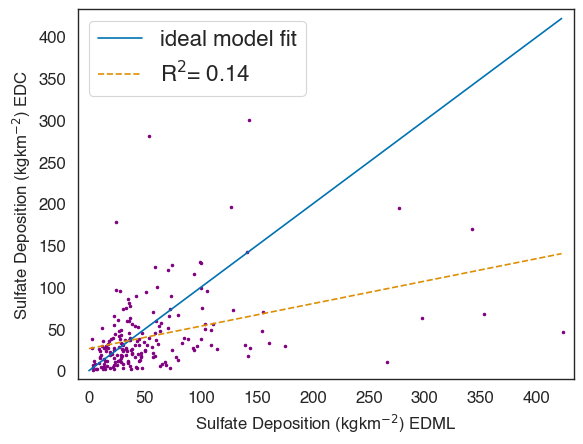

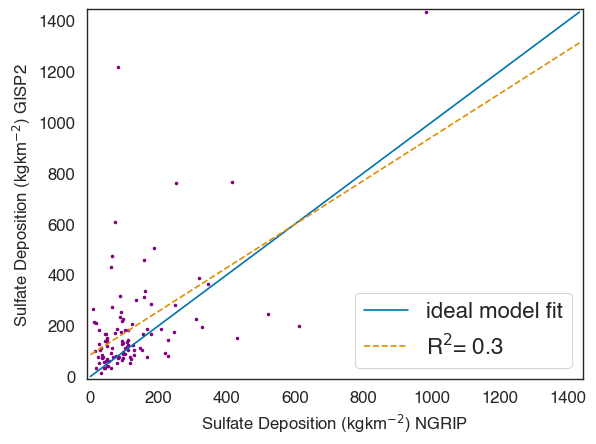

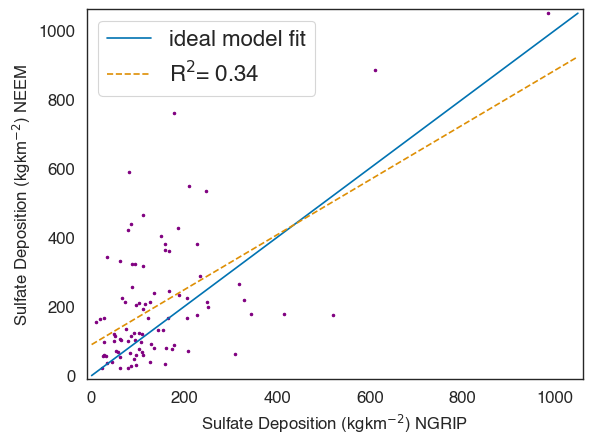

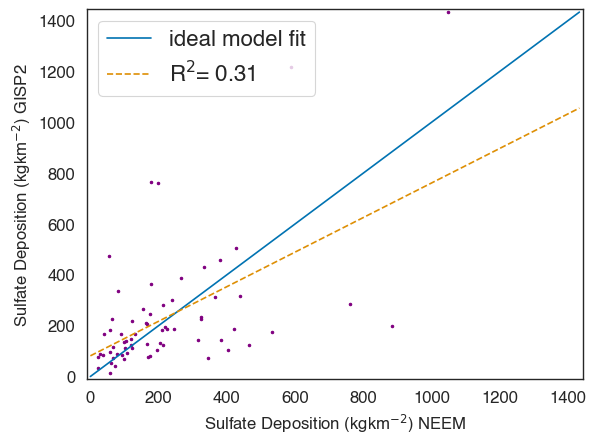

In [621]:
def scatter_peaks(data_1, data_2, name_1, name_2):
    lim = np.where((data_1 != 0) & (data_2 !=0))
    data_1 = data_1[lim]
    data_2 = data_2[lim]
    max = np.nanmax(np.array([np.nanmax(data_1),np.nanmax(data_2)]))
    model = LinearRegression().fit(data_1.reshape((-1,1)), data_2.reshape((-1,1)))
    r_sq = model.score(data_1.reshape((-1,1)),data_2.reshape((-1,1)))
    x1  = np.arange(0,max)
    y1 = x1 * model.coef_ + model.intercept_
    y1 = y1.reshape((len(x1),))
    plt.figure()
    plt.scatter(data_1, data_2, s=3, c='purple')
    plt.plot(x1,x1, label='ideal model fit')
    plt.plot(x1,y1, label = r'R$^2$= ' + str(np.round(r_sq,2)), linestyle='--')
    plt.ylim(-10,max+10)
    plt.xlim(-10,max+10)
    plt.xlabel(r'Sulfate Deposition (kgkm$^{-2}$) ' + str(name_1), fontsize=12)
    plt.ylabel(r'Sulfate Deposition (kgkm$^{-2}$) ' + str(name_2), fontsize=12)
    plt.legend(fontsize=16, loc='best')
    plt.tick_params(labelsize=12)
    plt.show()
    
scatter_peaks(peaks_EDML, peaks_EDC, 'EDML', 'EDC')
scatter_peaks(peaks_NGRIP, peaks_GISP2, 'NGRIP', 'GISP2')
scatter_peaks(peaks_NGRIP, peaks_NEEM, 'NGRIP', 'NEEM')
scatter_peaks(peaks_NEEM, peaks_GISP2, 'NEEM', 'GISP2')

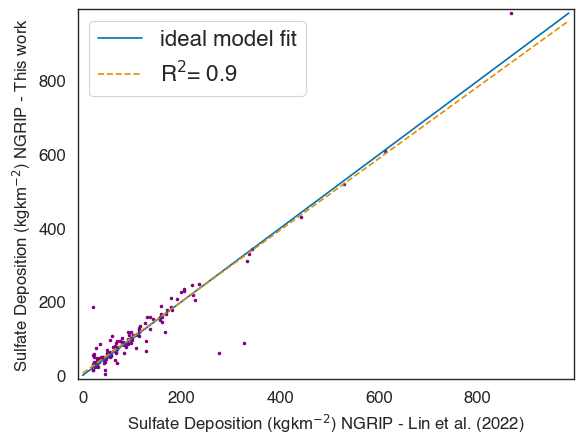

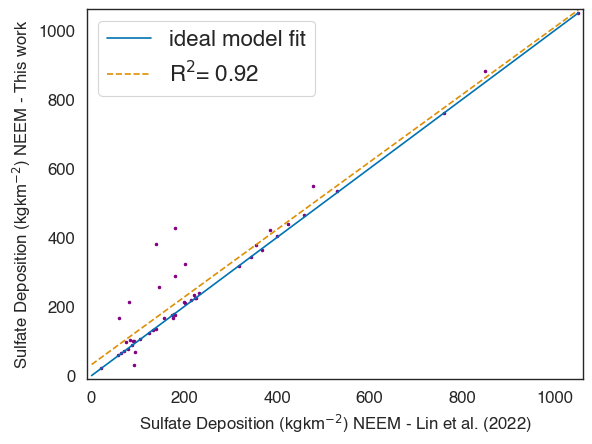

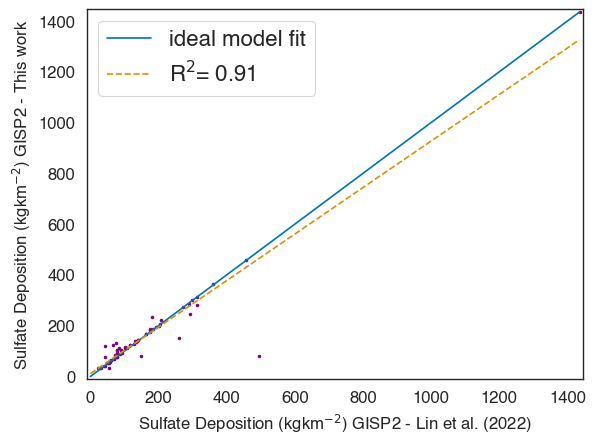

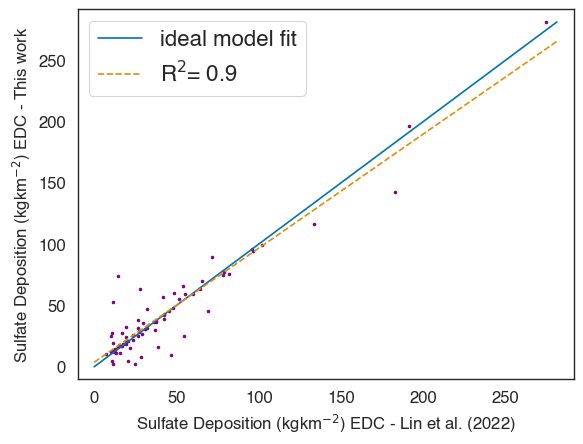

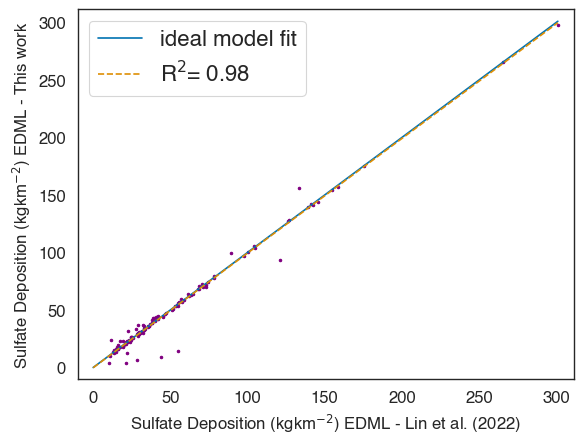

In [622]:
scatter_peaks(NGRIP_JL_s, peaks_NGRIP[age_bp_NGRIP<60*1e3], 'NGRIP - Lin et al. (2022)', 'NGRIP - This work')
scatter_peaks(NEEM_JL_s, peaks_NEEM[age_bp_NGRIP<60*1e3], 'NEEM - Lin et al. (2022)', 'NEEM - This work')
scatter_peaks(GISP2_JL_s, peaks_GISP2[age_bp_NGRIP<60*1e3], 'GISP2 - Lin et al. (2022)', 'GISP2 - This work')
scatter_peaks(EDC_JL_s, peaks_EDC[age_bp_NGRIP<60*1e3], 'EDC - Lin et al. (2022)', 'EDC - This work')
scatter_peaks(EDML_JL_s, peaks_EDML[age_bp_NGRIP<60*1e3], 'EDML - Lin et al. (2022)', 'EDML - This work')

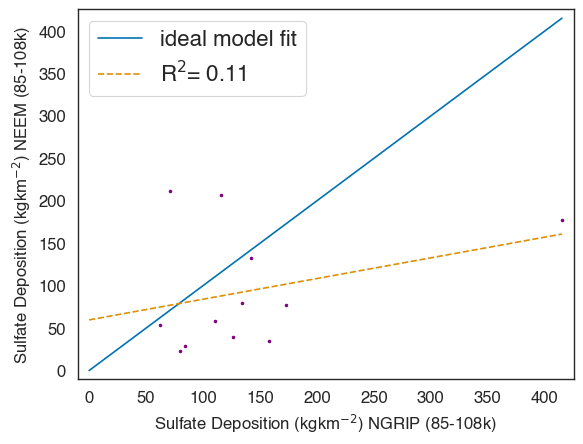

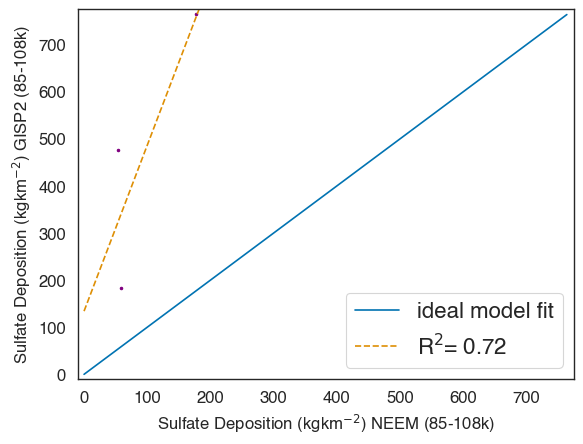

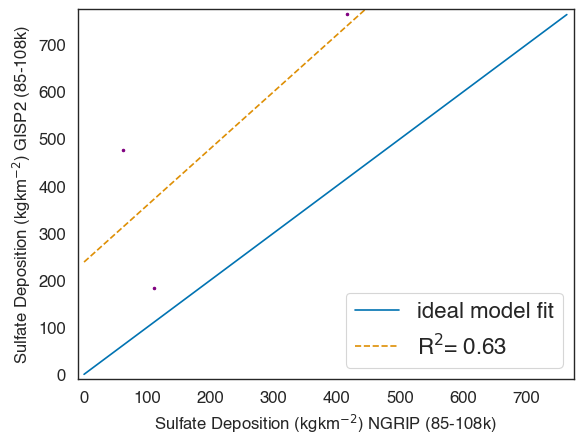

In [623]:
age_end_strain_NEEM = np.interp(NEEM_thinning_depth[-1], NEEM_depth, NEEM_age )

idx_end_NEEM = np.where( (age_bp_NEEM > age_end_strain_NEEM) & (peaks_NEEM != 0) )

x = np.arange(1,821,1)

scatter_peaks(peaks_NGRIP[idx_end_NEEM], peaks_NEEM[idx_end_NEEM], 'NGRIP (85-108k)', 'NEEM (85-108k)')
scatter_peaks(peaks_NEEM[idx_end_NEEM], peaks_GISP2[idx_end_NEEM], 'NEEM (85-108k)', 'GISP2 (85-108k)')
scatter_peaks(peaks_NGRIP[idx_end_NEEM], peaks_GISP2[idx_end_NEEM], 'NGRIP (85-108k)', 'GISP2 (85-108k)')